# PHASE 2 Data Understanding

name = "Leo Davidov"  
student_id = "AE3240"  

In [1]:
import kagglehub
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
main_dataset = True
df = None
if main_dataset:
    path = kagglehub.dataset_download("arnavsharmaas/solar-panel-pv-system-dataset")
    df = pd.read_csv(path + "\\LBNL_file.csv", parse_dates=["installation_date"], na_values=["-9999", -9999])
else:
    system_IDs = pd.read_csv("keys.csv")["system_ID_1"]
    chunksize = 100000 
    #"public_file.csv"
    df = pd.concat(chunk[chunk["system_ID_1"].isin(system_IDs)] for chunk in pd.read_csv("public_file.csv", parse_dates=["installation_date"], na_values = ["-1", -1], chunksize=chunksize))
    df.rename({"PV_system_size_DC" : "system_size_DC"}, inplace=True, axis=1)
    if "Unnamed: 0" in df.columns:
        df.drop(columns=["Unnamed: 0"], inplace=True)
display(df.head(5))

data_provider_1 data_provider_2 system_ID_1 system_ID_2  \
0  Arkansas State Energy Office             NaN         NaN         NaN   
1  Arkansas State Energy Office             NaN         NaN         NaN   
2  Arkansas State Energy Office             NaN         NaN         NaN   
3  Arkansas State Energy Office             NaN         NaN         NaN   
4  Arkansas State Energy Office             NaN         NaN         NaN   

  installation_date  system_size_DC  total_installed_price  rebate_or_grant  \
0        2010-04-29           2.016                14558.0              0.0   
1        2010-04-26           3.360                26096.0              0.0   
2        2010-04-20          13.440                91139.0              0.0   
3        2010-04-21           5.520                40043.0              0.0   
4        2010-04-22           2.530                21497.0              0.0   

  customer_segment  expansion_system  ...  built_in_meter_inverter_1  \
0              RES                 0  ...                        0.0   
1              RES                 0  ...                        0.0   
2              RES                 0  ...                        0.0   
3              RES                 0  ...                        0.0   
4              RES                 0  ...                        0.0   

   built_in_meter_inverter_2  built_in_meter_inverter_3  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   output_capacity_inverter_1 output_capacity_inverter_2  \
0                        0.19                        NaN   
1                        0.19                        NaN   
2                        0.19                        NaN   
3                        0.19                        NaN   
4                        0.19                        NaN   

  output_capacity_inverter_3 DC_optimizer inverter_loading_ratio  \
0                        NaN          0.0               1.178947   
1                        NaN          0.0               1.178947   
2                        NaN          0.0               1.178947   
3                        NaN          0.0               1.210526   
4                        NaN          0.0               1.210526   

   battery_rated_capacity_kW battery_rated_capacity_kWh  
0                        NaN                        NaN  
1                        NaN                        NaN  
2                        NaN                        NaN  
3                        NaN                        NaN  
4                        NaN                        NaN  

[5 rows x 78 columns]

## General information about dtypes, valid count, and colum names

In [2]:
#for col, dtype in df.dtypes.items():
    #print (col + ":" + str(dtype))

# info
display(df.info())

print("\nUnique dtypes: \n")
# unique dtypes
for dtype in df.dtypes.unique():
    print(dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   data_provider_1                  1000000 non-null  object        
 1   data_provider_2                  221982 non-null   object        
 2   system_ID_1                      999895 non-null   object        
 3   system_ID_2                      222098 non-null   object        
 4   installation_date                1000000 non-null  datetime64[ns]
 5   system_size_DC                   988692 non-null   float64       
 6   total_installed_price            814364 non-null   float64       
 7   rebate_or_grant                  954632 non-null   float64       
 8   customer_segment                 1000000 non-null  object        
 9   expansion_system                 1000000 non-null  int64         
 10  multiple_phase_system          

None


Unique dtypes: 

object
datetime64[ns]
float64
int64


# Diplicated rows

In [3]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


# Percent of valid values per column and unique values

data_provider_1: 100.0000%
installation_date: 100.0000%
utility_service_territory: 100.0000%
state: 100.0000%
customer_segment: 100.0000%
expansion_system: 100.0000%
multiple_phase_system: 100.0000%
city: 99.9999%
zip_code: 99.9998%
system_ID_1: 99.9895%
additional_modules: 99.8971%
additional_inverters: 99.8971%
module_quantity_1: 99.6328%
DC_optimizer: 99.5020%
inverter_quantity_1: 99.4951%
micro_inverter_1: 99.4201%
system_size_DC: 98.8692%
self_installed: 95.5557%
rebate_or_grant: 95.4632%
bifacial_module_1: 94.7354%
technology_module_1: 94.3796%
BIPV_module_1: 94.0045%
installer_name: 93.1942%
third_party_owned: 91.7377%
nameplate_capacity_module_1: 90.6207%
efficiency_module_1: 90.5703%
module_manufacturer_1: 90.1152%
module_model_1: 90.1115%
built_in_meter_inverter_1: 90.0303%
tracking: 89.9440%
inverter_manufacturer_1: 88.8617%
output_capacity_inverter_1: 82.9490%
solar_storage_hybrid_inverter_1: 81.7208%
total_installed_price: 81.4364%
ground_mounted: 75.9462%
inverter_loading

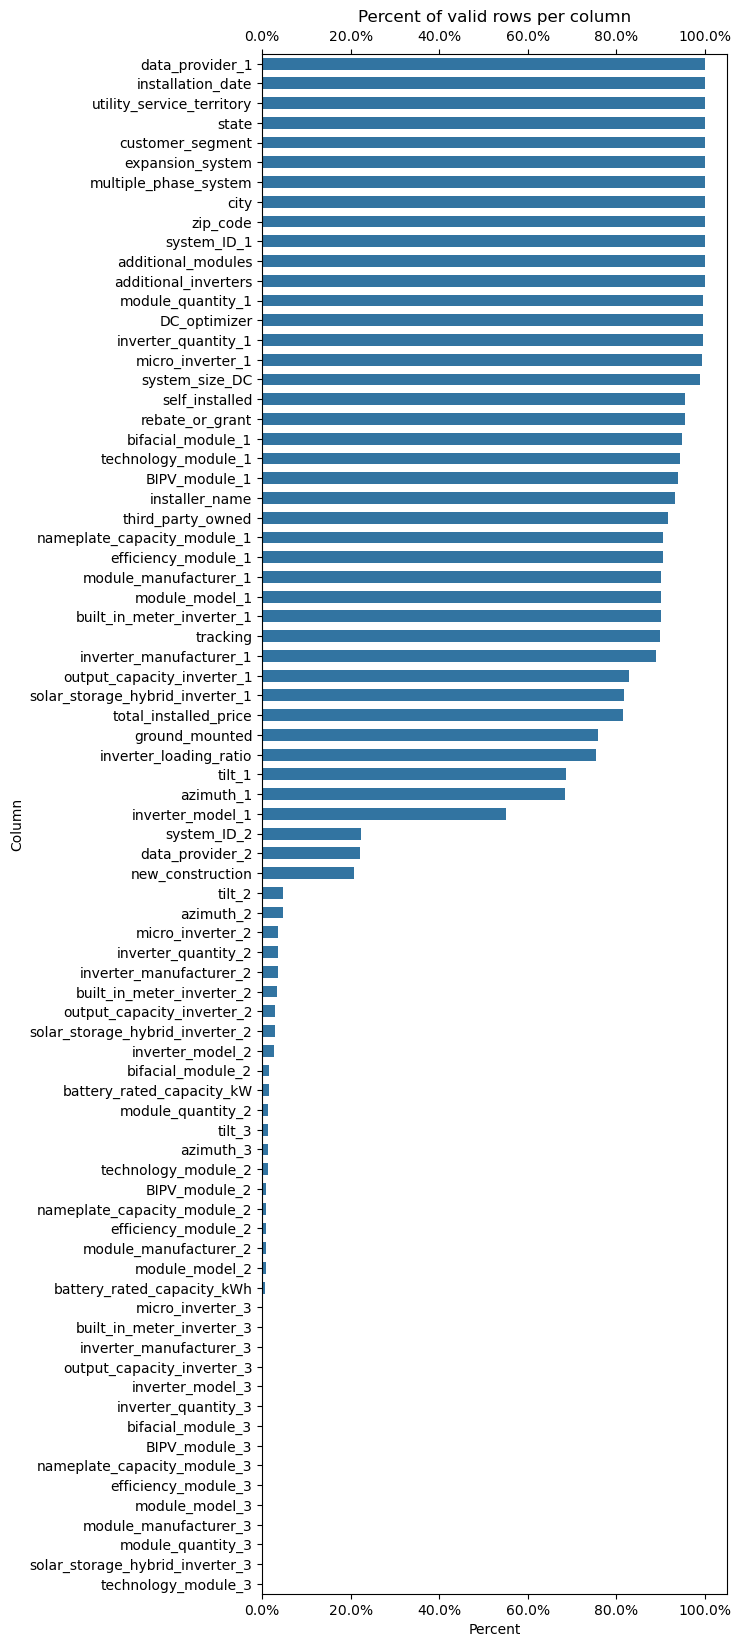

In [4]:
# Percent of valid
def plot_valids(visual = True):
    valids = {}
    for col, missing_count in df.isna().sum().items():
        percent = (1 - missing_count / len(df)) * 100
        valids[col] = percent
    valids = pd.Series(valids).sort_values(ascending=False)
    for col, value in valids.items():
        print(f"{col}: {value:.4f}%")
    valids.to_markdown("valids.md")
    if visual == True:
        plt.figure(figsize=(6, 20))
        ax = plt.axes()
        sns.barplot(x=valids.values, y=valids.index, ax=ax, width=0.6, orient="h")
        #plt.xticks(rotation = 90)
        ax.set_xticklabels([f"{tick}%"for tick in ax.get_xticks()])
        plt.ylabel("Column")
        plt.xlabel("Percent")
        ax.tick_params(top = True, labeltop = True)
        plt.title("Percent of valid rows per column")
        plt.show()
    return valids 
valids = plot_valids()

### Number of uniques per column

data_provider_1: 3
data_provider_2: 2
system_ID_1: 999895
system_ID_2: 218662
installation_date: 6516
system_size_DC: 36030
total_installed_price: 172972
rebate_or_grant: 25926
customer_segment: 6
expansion_system: 2
multiple_phase_system: 2
new_construction: 2
tracking: 2
ground_mounted: 2
zip_code: 3587
city: 2672
state: 3
utility_service_territory: 32
third_party_owned: 2
installer_name: 4741
self_installed: 2
azimuth_1: 827
azimuth_2: 356
azimuth_3: 342
tilt_1: 326
tilt_2: 64
tilt_3: 53
module_manufacturer_1: 338
module_model_1: 5674
module_quantity_1: 1821
module_manufacturer_2: 158
module_model_2: 1499
module_quantity_2: 389
module_manufacturer_3: 72
module_model_3: 434
module_quantity_3: 104
additional_modules: 2
technology_module_1: 8
technology_module_2: 8
technology_module_3: 0
BIPV_module_1: 2
BIPV_module_2: 2
BIPV_module_3: 2
bifacial_module_1: 2
bifacial_module_2: 2
bifacial_module_3: 1
nameplate_capacity_module_1: 171
nameplate_capacity_module_2: 118
nameplate_capacity_mo

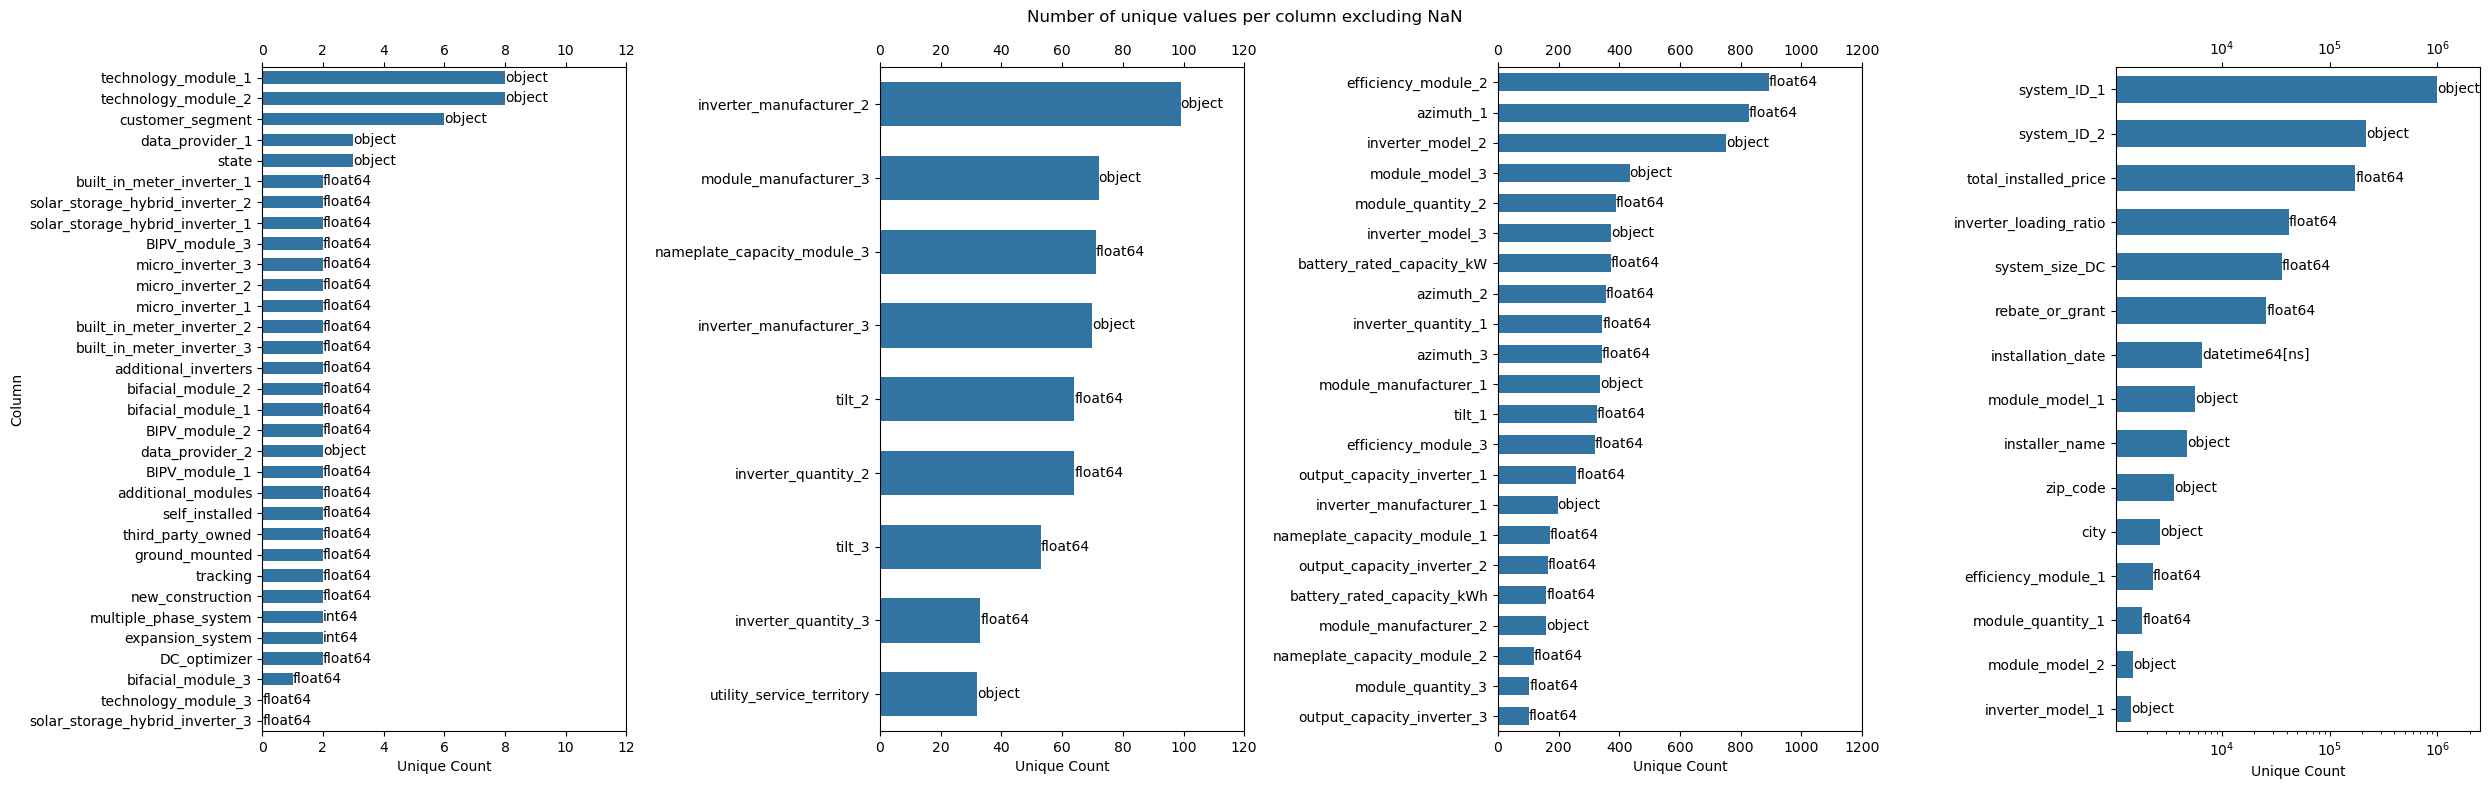

In [5]:
def plot_uniques_numbers():
    uniques = df.nunique(axis=0, dropna=True) #excluding NA 
    for col, value in uniques.items():
        print(f"{col}: {value}")
    def show_uniques(uniques, ax, max_count):
        #plt.figure(figsize=(20, 6))
        if len(uniques):
            if max_count < 10**6:
                ax.set_xlim((0, 1.2 * max_count))
            sns.barplot(uniques.sort_values(ascending=False), ax = ax, width=0.6, orient="h")
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
            ax.set_xlabel("Unique Count")
            ax.tick_params(top=True, labeltop=True)
            barContainer = ax.containers
            ax.bar_label(barContainer[0], labels=df[uniques.sort_values(ascending=False).keys()].dtypes.values, label_type="edge")
    min_count = 0
    axis_conter = 0
    fig, axes = plt.subplots(1, 4, figsize = (25,8))
    for max_count in [10**power for power in [1, 2, 3, 6]]:
        show_uniques(uniques[(uniques <= max_count) & (uniques >= min_count)], axes[axis_conter], max_count)
        min_count = max_count
        #axes[axis_conter].set_xlim((0, max_count + min_count))
        axis_conter += 1
    axes[0].set_ylabel("Column")
    axes[-1].set_xscale("log")
    axes[-1].set_xlim((0.0, min_count*2.5))
    plt.suptitle("Number of unique values per column excluding NaN")
    plt.tight_layout()
    plt.show()
    return uniques
uniques = plot_uniques_numbers()

#### Here it is possible to play with nlargest and counts of nlargest in `for val, count in value_counts.items():` and view unique contents of columns, including/excluding NaN, and binary data
#### Use function `view_top_unique_counts(nlargest = 3, dropna = True, min_count_to_view = 1, lag_size = 10, exclude_binary = True)`

Group               Column                   Value   Count   Dtype
0  MAX 10 UNIQUES      data_provider_1                 CA_CPUC  998971  object
1  MAX 10 UNIQUES      data_provider_1  Arizona Public Service     924  object
2  MAX 10 UNIQUES     customer_segment                     RES  974311  object
3  MAX 10 UNIQUES     customer_segment                     COM   19693  object
4  MAX 10 UNIQUES                state                      CA  998971  object
5  MAX 10 UNIQUES                state                      AZ     924  object
6  MAX 10 UNIQUES  technology_module_1                    Mono  551857  object
7  MAX 10 UNIQUES  technology_module_1              Multi-c-Si  368715  object
8  MAX 10 UNIQUES  technology_module_2                    Mono    4410  object
9  MAX 10 UNIQUES  technology_module_2              Multi-c-Si    4393  object

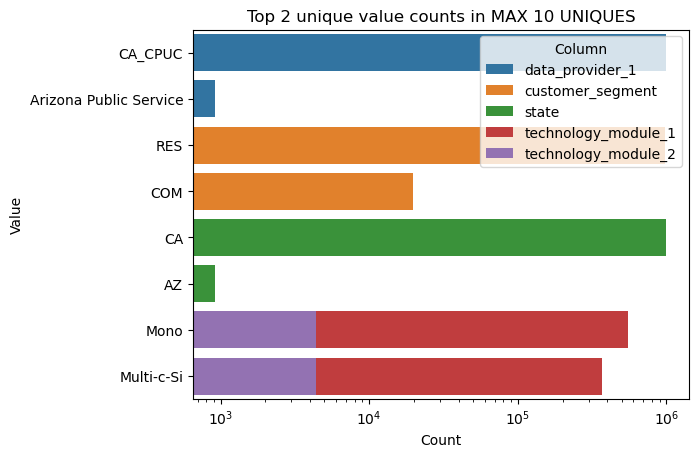

--------------------------------------------------------


Group                       Column                       Value  \
0   MAX 100 UNIQUES    utility_service_territory    Pacific Gas and Electric   
1   MAX 100 UNIQUES    utility_service_territory  Southern California Edison   
2   MAX 100 UNIQUES                       tilt_2                        18.0   
3   MAX 100 UNIQUES                       tilt_2                        23.0   
4   MAX 100 UNIQUES                       tilt_3                        18.0   
5   MAX 100 UNIQUES                       tilt_3                        23.0   
6   MAX 100 UNIQUES        module_manufacturer_3        Jinko Solar Co., Ltd   
7   MAX 100 UNIQUES        module_manufacturer_3         Canadian Solar Inc.   
8   MAX 100 UNIQUES  nameplate_capacity_module_3                       250.0   
9   MAX 100 UNIQUES  nameplate_capacity_module_3                       260.0   
10  MAX 100 UNIQUES      inverter_manufacturer_2                         ABB   
11  MAX 100 UNIQUES      inverter_manufacturer_2                 SMA America   
12  MAX 100 UNIQUES          inverter_quantity_2                         1.0   
13  MAX 100 UNIQUES          inverter_quantity_2                         2.0   
14  MAX 100 UNIQUES      inverter_manufacturer_3                 SMA America   
15  MAX 100 UNIQUES      inverter_manufacturer_3                  Schuco USA   
16  MAX 100 UNIQUES          inverter_quantity_3                         1.0   
17  MAX 100 UNIQUES          inverter_quantity_3                         2.0   

     Count    Dtype  
0   480944   object  
1   339129   object  
2     7305  float64  
3     4705  float64  
4     1820  float64  
5     1178  float64  
6      184   object  
7      141   object  
8      155  float64  
9      145  float64  
10    5534   object  
11    4983   object  
12   31067  float64  
13    1588  float64  
14     368   object  
15     366   object  
16    1242  float64  
17     169  float64

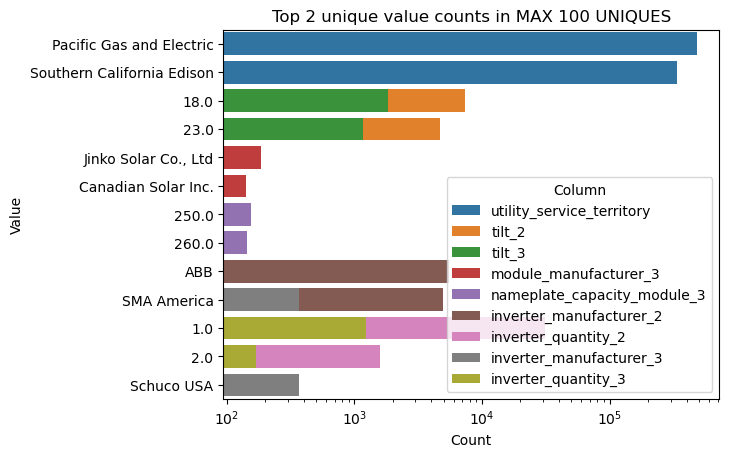

--------------------------------------------------------


Group                 Column                Value   Count  \
0   MAX 1000 UNIQUES              azimuth_1                180.0  173456   
1   MAX 1000 UNIQUES              azimuth_1                270.0   52372   
2   MAX 1000 UNIQUES              azimuth_2                180.0    7063   
3   MAX 1000 UNIQUES              azimuth_2                270.0    4579   
4   MAX 1000 UNIQUES              azimuth_3                180.0    1888   
5   MAX 1000 UNIQUES              azimuth_3                270.0    1130   
6   MAX 1000 UNIQUES                 tilt_1                 18.0  159462   
7   MAX 1000 UNIQUES                 tilt_1                 23.0   74253   
8   MAX 1000 UNIQUES  module_manufacturer_1             SunPower  139891   
9   MAX 1000 UNIQUES  module_manufacturer_1  LG Electronics Inc.   83107   
10  MAX 1000 UNIQUES  module_manufacturer_2             SunPower     949   
11  MAX 1000 UNIQUES  module_manufacturer_2  Canadian Solar Inc.     884   
12  MAX 1000 UNIQUES      module_quantity_2                  1.0    5355   
13  MAX 1000 UNIQUES      module_quantity_2                  2.0    1038   
14  MAX 1000 UNIQUES         module_model_3             REC260PE      55   
15  MAX 1000 UNIQUES         module_model_3           YL250P-29b      50   
16  MAX 1000 UNIQUES      module_quantity_3                  1.0      33   
17  MAX 1000 UNIQUES      module_quantity_3                  2.0      33   

      Dtype  
0   float64  
1   float64  
2   float64  
3   float64  
4   float64  
5   float64  
6   float64  
7   float64  
8    object  
9    object  
10   object  
11   object  
12  float64  
13  float64  
14   object  
15   object  
16  float64  
17  float64

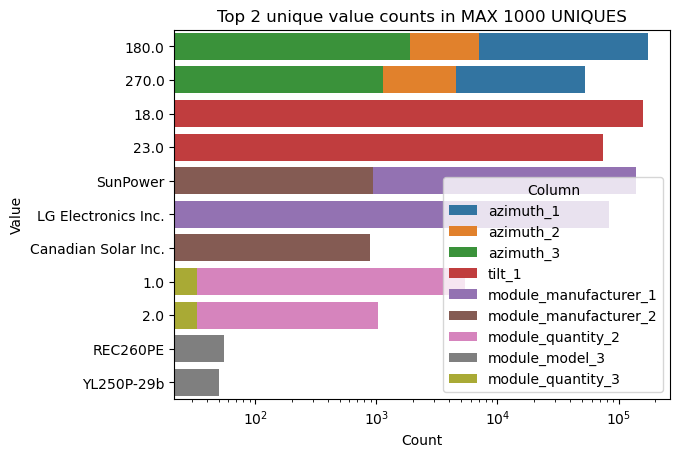

--------------------------------------------------------


Group                       Column  \
18  MAX 1000 UNIQUES  nameplate_capacity_module_1   
19  MAX 1000 UNIQUES  nameplate_capacity_module_1   
20  MAX 1000 UNIQUES  nameplate_capacity_module_2   
21  MAX 1000 UNIQUES  nameplate_capacity_module_2   
22  MAX 1000 UNIQUES          efficiency_module_2   
23  MAX 1000 UNIQUES          efficiency_module_2   
24  MAX 1000 UNIQUES          efficiency_module_3   
25  MAX 1000 UNIQUES          efficiency_module_3   
26  MAX 1000 UNIQUES      inverter_manufacturer_1   
27  MAX 1000 UNIQUES      inverter_manufacturer_1   
28  MAX 1000 UNIQUES          inverter_quantity_1   
29  MAX 1000 UNIQUES          inverter_quantity_1   
30  MAX 1000 UNIQUES             inverter_model_2   
31  MAX 1000 UNIQUES             inverter_model_2   
32  MAX 1000 UNIQUES             inverter_model_3   
33  MAX 1000 UNIQUES             inverter_model_3   
34  MAX 1000 UNIQUES   output_capacity_inverter_1   
35  MAX 1000 UNIQUES   output_capacity_inverter_1   

                           Value   Count    Dtype  
18                         260.0   88214  float64  
19                         250.0   64885  float64  
20                         250.0     975  float64  
21                         255.0     597  float64  
22                      0.161417     339  float64  
23                      0.200526     203  float64  
24                      0.163847      64  float64  
25                      0.153046      50  float64  
26        SolarEdge Technologies  104205   object  
27                           ABB   94760   object  
28                           1.0  617663  float64  
29                           2.0   49147  float64  
30         SB5000TL-US-22 (240V)     916   object  
31  PVI-3.0-OUTD-S-US-Z-A (240V)     812   object  
32     M215-60-2LL-S2x-IG (240V)      87   object  
33        M215-60-2LL-S2x (240V)      68   object  
34                         0.215  112507  float64  
35                          0.24   86234  float64

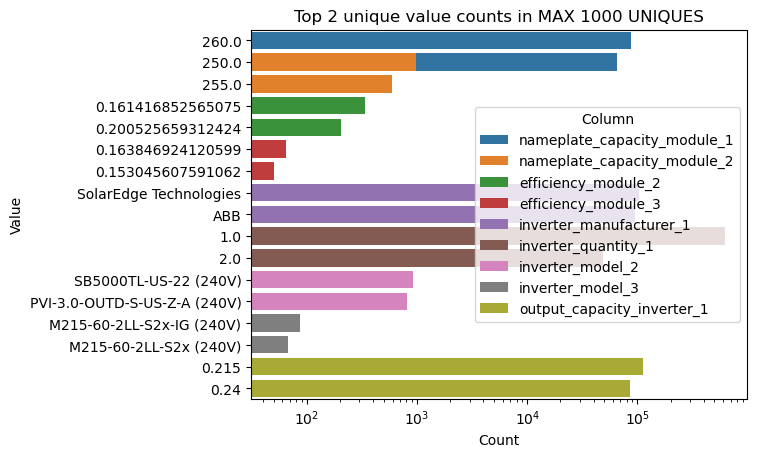

--------------------------------------------------------


Group                      Column  Value  Count    Dtype
36  MAX 1000 UNIQUES  output_capacity_inverter_2    3.0   4534  float64
37  MAX 1000 UNIQUES  output_capacity_inverter_2    5.0   3992  float64
38  MAX 1000 UNIQUES  output_capacity_inverter_3  0.215    239  float64
39  MAX 1000 UNIQUES  output_capacity_inverter_3    3.0    216  float64
40  MAX 1000 UNIQUES   battery_rated_capacity_kW    5.0   5864  float64
41  MAX 1000 UNIQUES   battery_rated_capacity_kW  4.938   3927  float64
42  MAX 1000 UNIQUES  battery_rated_capacity_kWh  8.394   3936  float64
43  MAX 1000 UNIQUES  battery_rated_capacity_kWh   13.2   1581  float64

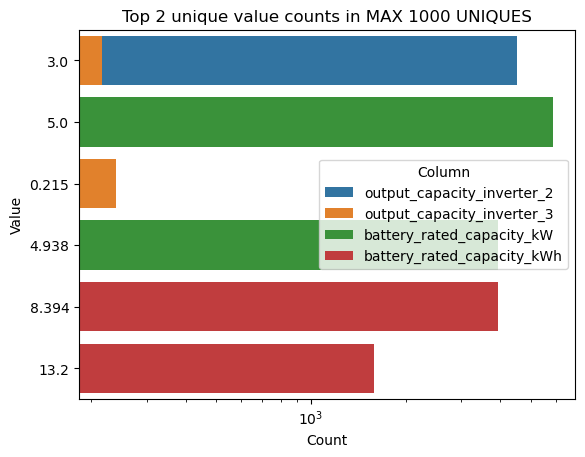

--------------------------------------------------------


Group               Column                      Value   Count  \
2   MAX 10000 UNIQUES             zip_code                    93312.0    6013   
3   MAX 10000 UNIQUES             zip_code                    95648.0    5954   
4   MAX 10000 UNIQUES                 city                  SAN DIEGO   44933   
5   MAX 10000 UNIQUES                 city                BAKERSFIELD   28740   
6   MAX 10000 UNIQUES       installer_name               Tesla Energy  170110   
7   MAX 10000 UNIQUES       installer_name     Vivint Solar Developer   68490   
8   MAX 10000 UNIQUES       module_model_1                   REC260PE   26168   
9   MAX 10000 UNIQUES       module_model_1            SPR-327NE-WHT-D   20361   
10  MAX 10000 UNIQUES    module_quantity_1                       12.0   56478   
11  MAX 10000 UNIQUES    module_quantity_1                       16.0   52988   
12  MAX 10000 UNIQUES       module_model_2                  CS6P-250P     205   
13  MAX 10000 UNIQUES       module_model_2                 YL255P-29b     172   
14  MAX 10000 UNIQUES  efficiency_module_1                   0.163847   43767   
15  MAX 10000 UNIQUES  efficiency_module_1                   0.200526   41362   
16  MAX 10000 UNIQUES     inverter_model_1          SE7600A-US (240V)   24332   
17  MAX 10000 UNIQUES     inverter_model_1  M215-60-2LL-S2x-IG (240V)   22777   

      Dtype  
2    object  
3    object  
4    object  
5    object  
6    object  
7    object  
8    object  
9    object  
10  float64  
11  float64  
12   object  
13   object  
14  float64  
15  float64  
16   object  
17   object

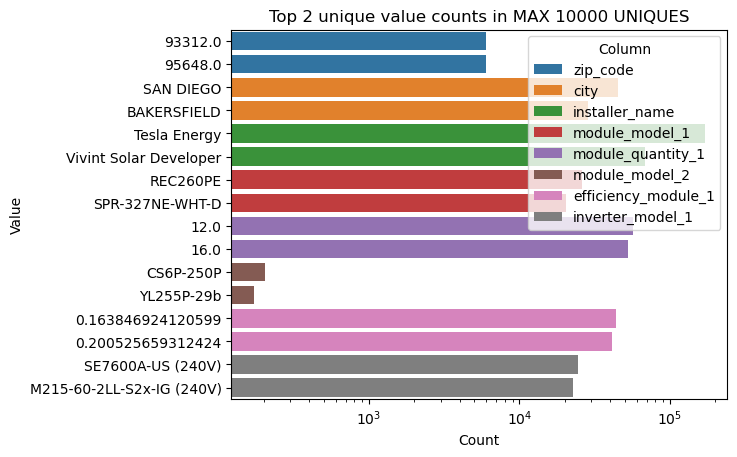

--------------------------------------------------------


Group                  Column       Value   Count    Dtype
0  MAX 100000 UNIQUES          system_size_DC    6.000000    6506  float64
1  MAX 100000 UNIQUES          system_size_DC    5.040000    6431  float64
2  MAX 100000 UNIQUES         rebate_or_grant    0.000000  739037  float64
3  MAX 100000 UNIQUES         rebate_or_grant  684.000000     812  float64
4  MAX 100000 UNIQUES  inverter_loading_ratio    1.162791   18968  float64
5  MAX 100000 UNIQUES  inverter_loading_ratio    1.166667   16887  float64

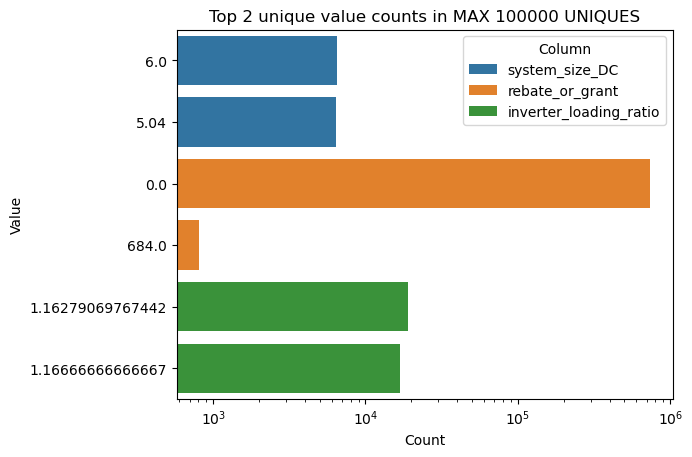

--------------------------------------------------------


Group                 Column               Value  Count  \
0  MAX 1000000 UNIQUES            system_ID_1  SCE-INT-NST-121948      1   
1  MAX 1000000 UNIQUES            system_ID_1   PGE-INT-113401105      1   
2  MAX 1000000 UNIQUES            system_ID_2  PGE-SGIP-2006-1409     23   
3  MAX 1000000 UNIQUES            system_ID_2            NS000DV3     12   
4  MAX 1000000 UNIQUES  total_installed_price                 1.0   7675   
5  MAX 1000000 UNIQUES  total_installed_price             20000.0   5335   

     Dtype  
0   object  
1   object  
2   object  
3   object  
4  float64  
5  float64

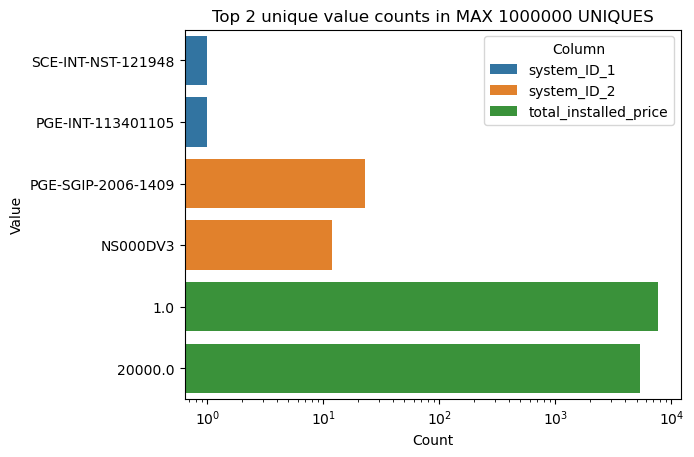

--------------------------------------------------------


In [6]:
def view_top_unique_counts(nlargest = 3, dropna = True, min_count_to_view = 1, lag_size = 10, exclude_binary = True):

    min_count = 0
    if exclude_binary == True:
        min_count = 2 + (not dropna)
    groups = {}
    uniques_ = df.nunique(axis=0, dropna=dropna) #
    for max_count in [10**power for power in [1, 2, 3, 4 ,5 , 6]]:  
        group = uniques_[(uniques_ <= max_count) & (uniques_ > min_count)]
        min_count = max_count
        groups[max_count] = group.keys().to_list()

    top_counts = []
    for max_count, cols in groups.items():
        frame = []
        #types = df[cols].dtypes.values
        for col in cols:
            value_counts = df[col].value_counts(dropna=dropna).nlargest(nlargest)
            dtype = df[col].dtype
            for val, count in value_counts.items():
                if count >= min_count_to_view: #HERE IS POSSIBLE TO ADJUST Deeper
                    frame.append((f"MAX {max_count} UNIQUES", col, val, count, dtype))
        top_counts.append(frame)


    for frame in top_counts: #it is possible to remove this loop if you don't want to use groups, change the line above to "extend" top_counts instead of "append"
        frame = pd.DataFrame(frame, columns=["Group", "Column", "Value", "Count", "Dtype"])#.sort_values(["Count"], ascending=False)
        frame = frame.drop(index = frame[frame["Column"] == "installation_date"].index, axis = 0, errors = "coerce")
        #frame = frame.set_index(["Group", "Column", "Dtype"]) # Multiindex is not correctly displayed in gitlab.
        for lag in range(len(frame)//lag_size + 1):
            subframe = frame.iloc[lag*lag_size:(lag + 1)*lag_size]
            if len(subframe) > 0:
                display(subframe)
                #plt.figure(figsize=(8, 5))
                sns.barplot(subframe, y = subframe["Value"].astype(str), x = "Count", hue = "Column", dodge=False, alpha = 1, orient= "h")
                plt.xscale("log")
                plt.title(f"Top {nlargest} unique value counts in {subframe.iloc[-1]["Group"]}")
                #plt.title(subframe.index[0][0]) # Uncomment when using multiindex
                plt.show()
                print("--------------------------------------------------------")

#I don't suggest using lag_sizes more than 20. it will mess up visualization
view_top_unique_counts(nlargest=2, dropna=True, min_count_to_view=0, lag_size = 18, exclude_binary = True)

## Missing values per year for variables of interest

For customer segment, system size, price
(customer segment don't have missing values)

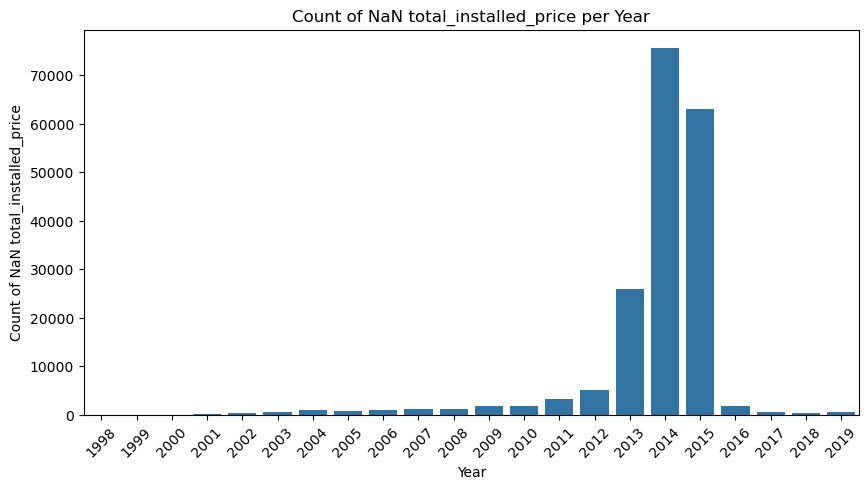

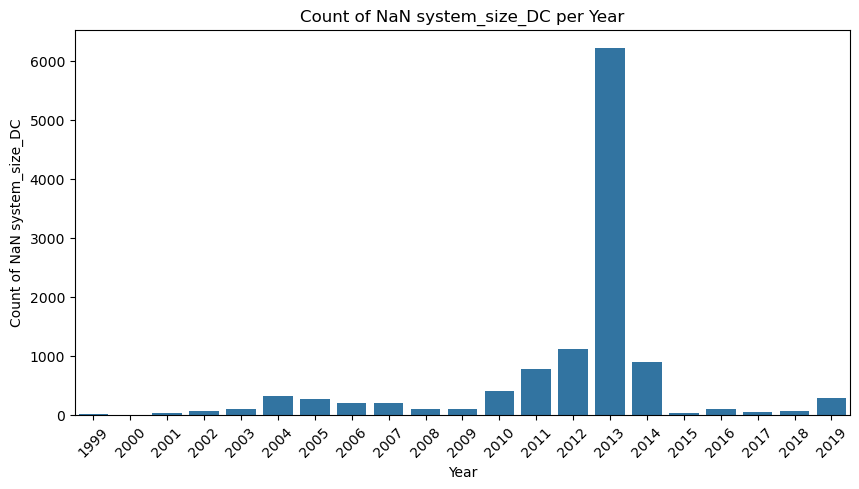

In [7]:
#df["installation_date"][df["total_installed_price"] == np.nan]
cols_of_interest = ["total_installed_price", "system_size_DC"]
def missing_values_variables_of_interest(cols_of_interest):
    for col in cols_of_interest:
        nan_counts = df[["installation_date", col]].copy()
        nan_counts["year"] = nan_counts["installation_date"].dt.year
        nan_counts = nan_counts[nan_counts[col].isna()]
        plt.figure(figsize=(10, 5))
        sns.barplot(nan_counts.groupby("year")[col].size())
        plt.xticks(rotation=45) 
        plt.xlabel("Year")
        plt.ylabel(f"Count of NaN {col}")
        plt.title(f"Count of NaN {col} per Year")
        plt.show()
missing_values_variables_of_interest(cols_of_interest)

## General correlations and distribution of continous/discrete variables + outliers
At this stage we can omit columns which contain mostly NaNs and object types columns (for correlations). I am not going to drop, or modify NaNs in valid columns at this point yet from the dataset (i will drop them only locally).  
Columns which contain less than two uniques (those which contain two uniques can be considered as catergory, 1 uinque can be even omitted) additionally we can omit coordinate columns like tilt, azimuth, data providers, system IDs.  

In addition NaN correlation matrix is constructed for "valid_df", a dataframe with pruned columns, if amount of valid cells less than specified threshold.

Useless cols: ['data_provider_1', 'data_provider_2', 'system_ID_2', 'zip_code', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1', 'tilt_2', 'tilt_3']


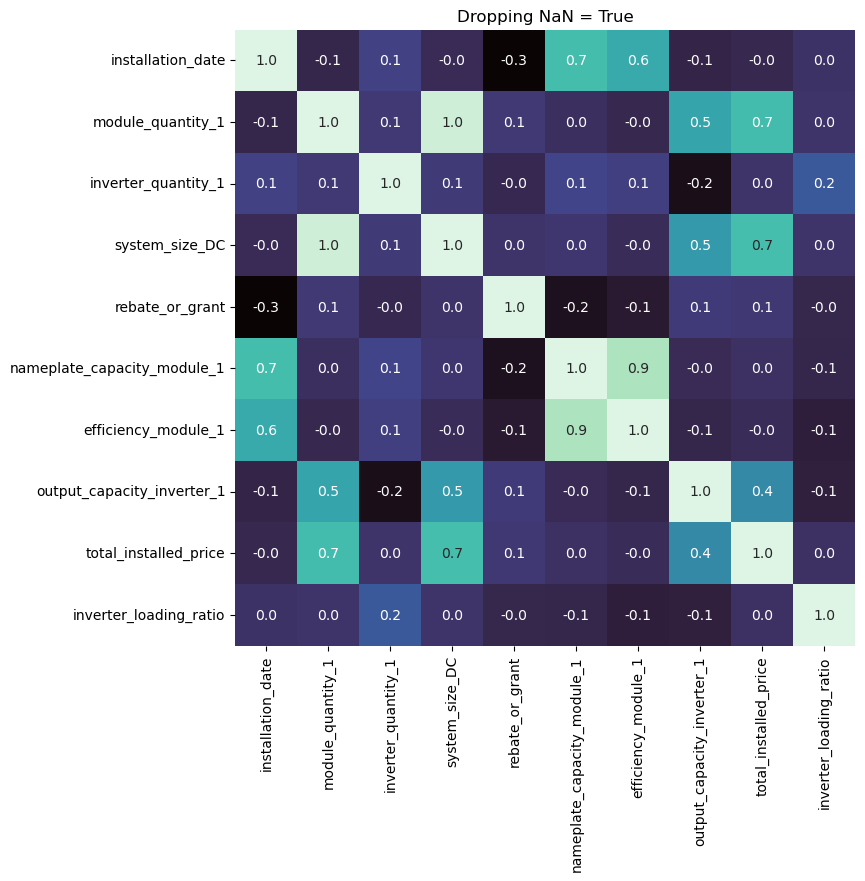

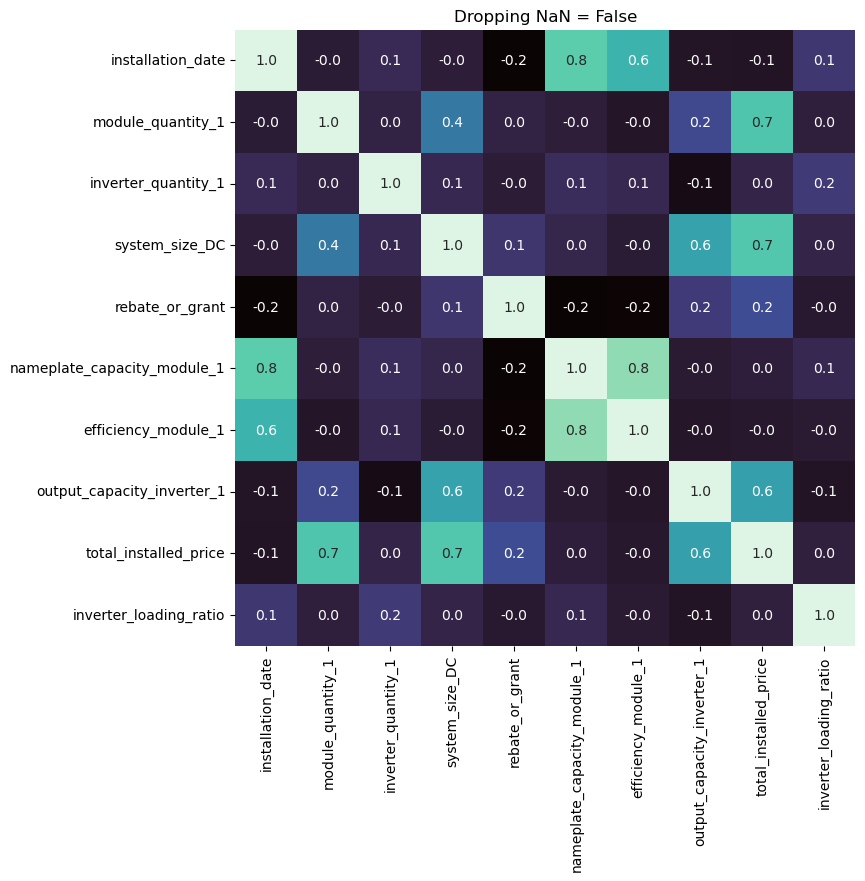

installation_date utility_service_territory state customer_segment  \
0        2010-04-29                    SWEPCO    AR              RES   
1        2010-04-26          Carroll Electric    AR              RES   
2        2010-04-20        Hope Water & Light    AR              RES   
3        2010-04-21            First Electric    AR              RES   
4        2010-04-22                   Entergy    AR              RES   

  expansion_system multiple_phase_system                 city system_ID_1  \
0                0                     0                 Mena         NaN   
1                0                     0               Jasper         NaN   
2                0                     0                 Hope         NaN   
3                0                     0  Hot Springs Village         NaN   
4                0                     0  Hot Springs Village         NaN   

  additional_modules additional_inverters  ...  module_manufacturer_1  \
0                NaN                  NaN  ...                  Sharp   
1                NaN                  NaN  ...                  Sharp   
2                NaN                  NaN  ...                  Sharp   
3                NaN                  NaN  ...                  Sharp   
4                NaN                  NaN  ...                  Sharp   

  module_model_1  built_in_meter_inverter_1 tracking  inverter_manufacturer_1  \
0      ND-224UC1                        0.0      0.0      ENPHASE ENERGY INC.   
1      ND-224UC1                        0.0      0.0      ENPHASE ENERGY INC.   
2      ND-224UC1                        0.0      0.0      ENPHASE ENERGY INC.   
3      NU-U230F3                        0.0      0.0      ENPHASE ENERGY INC.   
4      NU-U230F3                        0.0      0.0      ENPHASE ENERGY INC.   

  output_capacity_inverter_1  solar_storage_hybrid_inverter_1  \
0                       0.19                              NaN   
1                       0.19                              NaN   
2                       0.19                              NaN   
3                       0.19                              NaN   
4                       0.19                              NaN   

  total_installed_price ground_mounted inverter_loading_ratio  
0               14558.0            0.0               1.178947  
1               26096.0            0.0               1.178947  
2               91139.0            0.0               1.178947  
3               40043.0            0.0               1.210526  
4               21497.0            0.0               1.210526  

[5 rows x 34 columns]

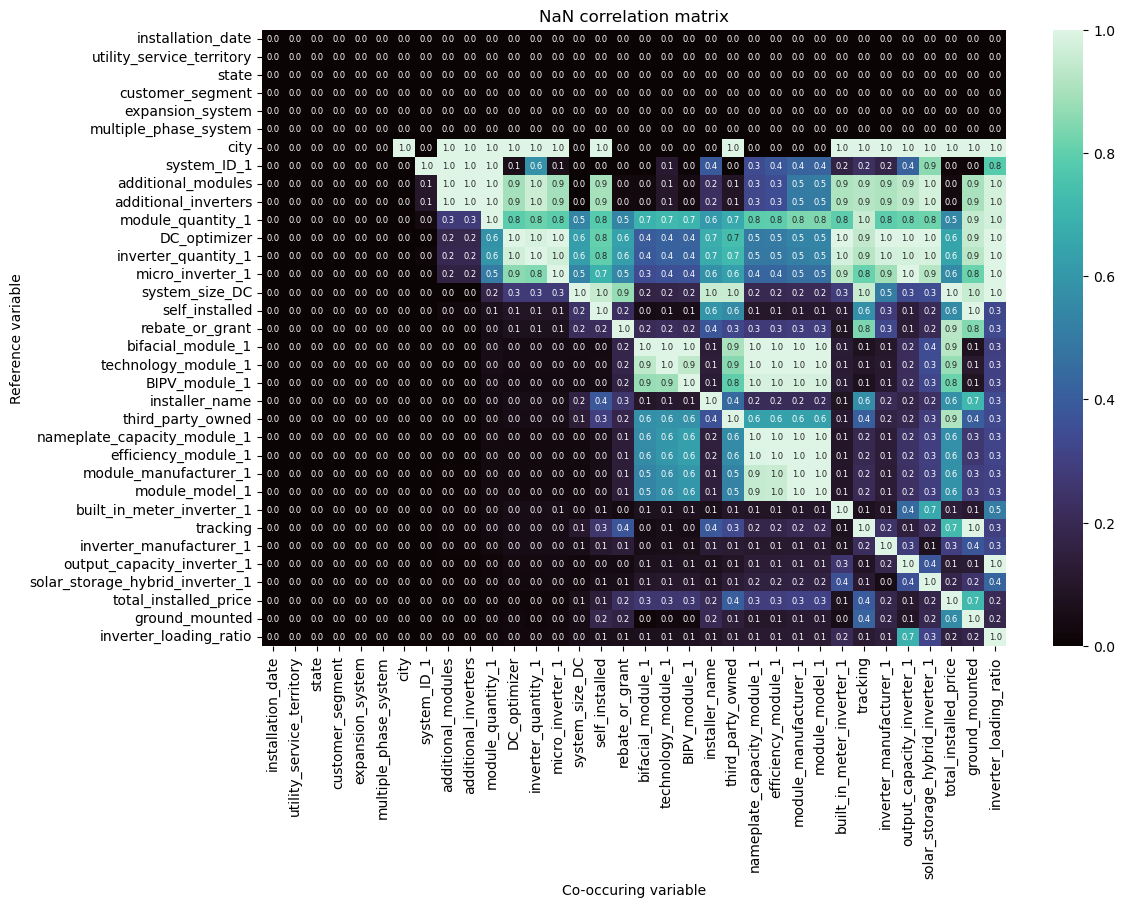

In [8]:
useless_cols = []
for column in df.columns:
    to_exclude = ["azimuth", "tilt", "provider", "ID_2", "zip"]
    for col in to_exclude:
        if col in column:
            useless_cols.append(column)
print("Useless cols:", useless_cols)
valids.drop(useless_cols, inplace = True, axis = 0)
df.drop(useless_cols, inplace = True, axis = 1)

def print_corr(valid_percent = 0, dropna = False):
    #no needed for now
    '''
    print(f"Valid columns, i.e. columns which have more than {valid_percent}% non-null:\n")
    print(valids[valids > valid_percent])'
    '''
    valids[valids > valid_percent].to_markdown(f"valids{valid_percent}.md")
    valid_cols = valids[valids > valid_percent].keys()
    valid_df = df[valid_cols].copy()
    if dropna == True:
        valid_df.dropna(axis=0, inplace=True)
    valid_uniques = uniques[valid_cols].copy()
    #correlations excluding "object typed" columns, and all categorical, considering only those columns which have more than valid_percent % of valid values
    #picking only continous variables
    for col, value in valid_uniques.items():
        if value <= 2:
            valid_df[col] = valid_df[col].astype("category")
    corr = valid_df[valid_uniques[valid_df.columns[(valid_df.dtypes != object) & (valid_df.dtypes != "category")]].keys()].corr()
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, annot=True, fmt=".1f", cbar=False, cmap="mako")
    plt.title(f"Dropping NaN = {dropna}")
    plt.show()
    return valid_uniques, valid_df

valid_uniques, valid_df = print_corr(valid_percent=70, dropna=True)
valid_uniques, valid_df = print_corr(valid_percent=70)
display(valid_df.head(5))
def plot_nan_corr():
    plt.figure(figsize=(12, 8))
    nan_corr = np.matmul(valid_df.isna().transpose().astype(int), valid_df.isna().astype(int))
    local_max = np.max(nan_corr.to_numpy(), axis=1, keepdims=True)
    local_max = np.where(local_max == 0, 1, local_max)
    nan_corr = nan_corr / local_max
    sns.heatmap(nan_corr, annot=True, fmt=".1f", annot_kws={"size": 6}, cmap="mako")
    plt.ylabel("Reference variable")
    plt.title("NaN correlation matrix")
    plt.xlabel("Co-occuring variable")
    plt.show()
    return pd.DataFrame(nan_corr)
nan_corr = plot_nan_corr()

### Outliers whiskers 5 - 95

Index(['installation_date', 'module_quantity_1', 'inverter_quantity_1',
       'system_size_DC', 'rebate_or_grant', 'nameplate_capacity_module_1',
       'efficiency_module_1', 'output_capacity_inverter_1',
       'total_installed_price', 'inverter_loading_ratio'],
      dtype='object')

Index(['utility_service_territory', 'state', 'customer_segment',
       'expansion_system', 'multiple_phase_system', 'city', 'system_ID_1',
       'additional_modules', 'additional_inverters', 'DC_optimizer',
       'micro_inverter_1', 'self_installed', 'bifacial_module_1',
       'technology_module_1', 'BIPV_module_1', 'installer_name',
       'third_party_owned', 'module_manufacturer_1', 'module_model_1',
       'built_in_meter_inverter_1', 'tracking', 'inverter_manufacturer_1',
       'solar_storage_hybrid_inverter_1', 'ground_mounted'],
      dtype='object')

module_quantity_1  inverter_quantity_1  system_size_DC  \
0.05                       1.0                  1.0           2.268   
0.95                      46.0                 30.0          13.000   
Total count            48643.0              45888.0       98269.000   

             rebate_or_grant  nameplate_capacity_module_1  \
0.05                    0.00                        210.0   
0.95                 6731.09                        345.0   
Total count         47732.00                      85346.0   

             efficiency_module_1  output_capacity_inverter_1  \
0.05                    0.141975                       0.215   
0.95                    0.211564                       7.616   
Total count         75252.000000                   45525.000   

             total_installed_price  inverter_loading_ratio  
0.05                        7138.0                0.881579  
0.95                       59913.0                1.325000  
Total count                81422.0            72688.000000

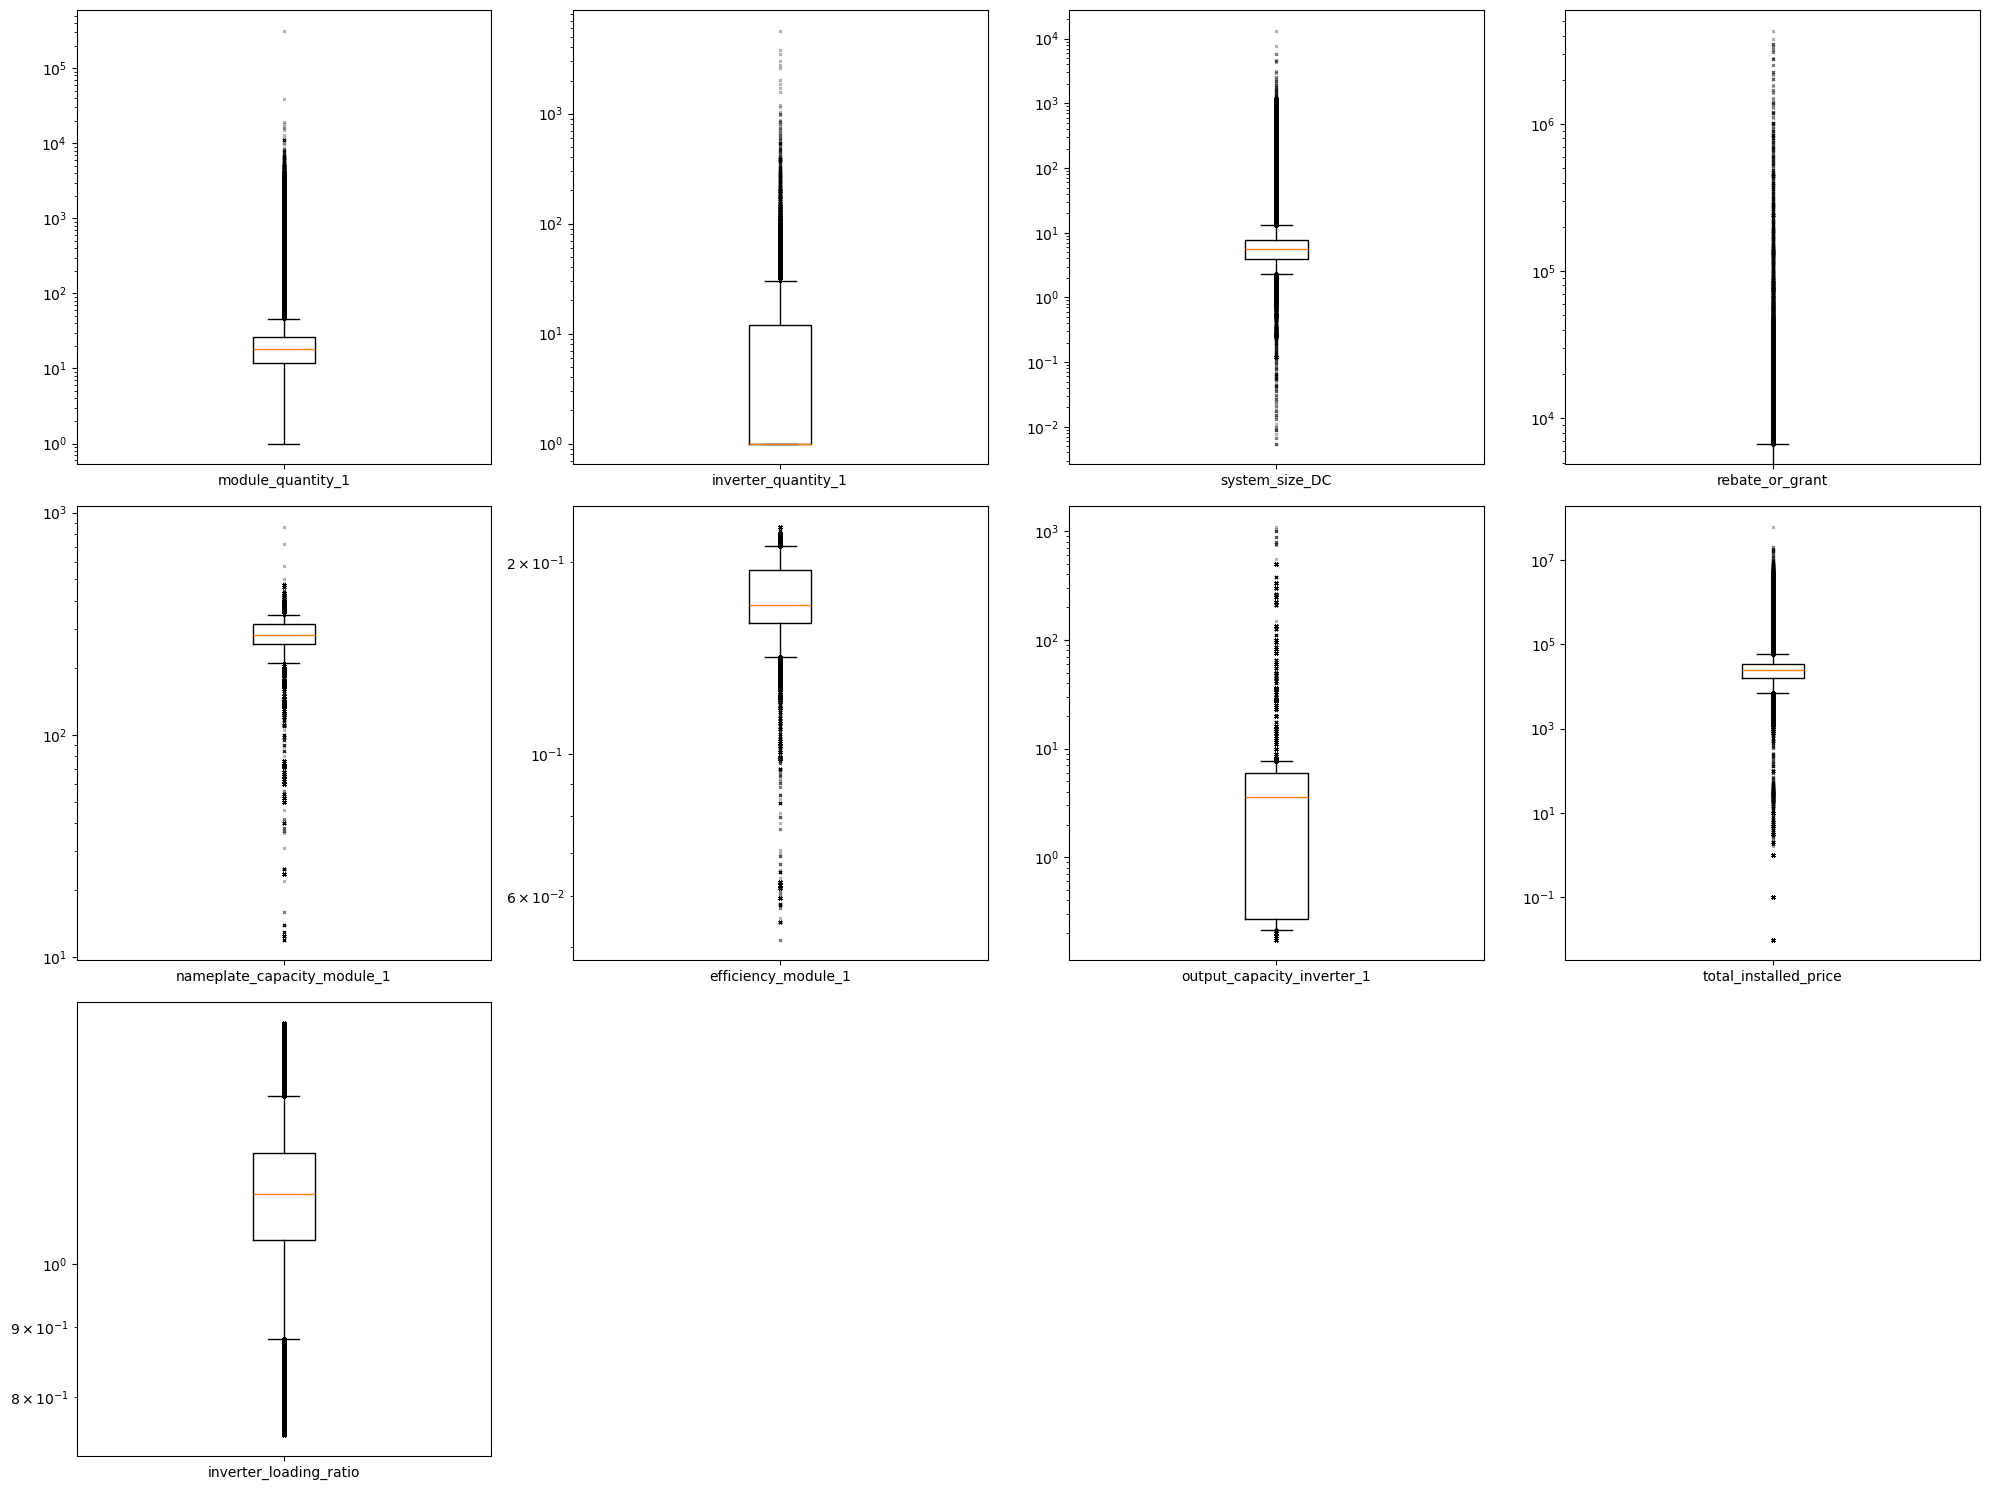

In [9]:
numeric_columns = valid_df.columns[(valid_df.dtypes != object) & (valid_df.dtypes != "category")]
categorical_columns = valid_df.columns[~valid_df.columns.isin(numeric_columns)]
display(numeric_columns)
display(categorical_columns)
num_plots = len(numeric_columns)
rows = int(np.sqrt(num_plots))  
cols = int(np.ceil(num_plots / rows)) 
fig = plt.figure(figsize=(20, 15))
outliers = valid_df[numeric_columns[1:]].quantile([0.05, 0.95])
outliers.loc["Total count"] = (valid_df[numeric_columns[1:]] < outliers.iloc[0]).sum()
outliers.loc["Total count"] += (valid_df[numeric_columns[1:]] > outliers.iloc[1]).sum()
display(outliers)

for i, col in enumerate(numeric_columns[1:], 1):  
    ax = plt.subplot(rows, cols, i)  
    plt.boxplot(valid_df[col].dropna(), whis=(5, 95), label=col, flierprops={'marker': 'x', 'markersize': 2, "alpha": 0.3})
    ax.set_xticklabels([col])
    plt.yscale("log")
plt.tight_layout() 
plt.show()

### Distributions

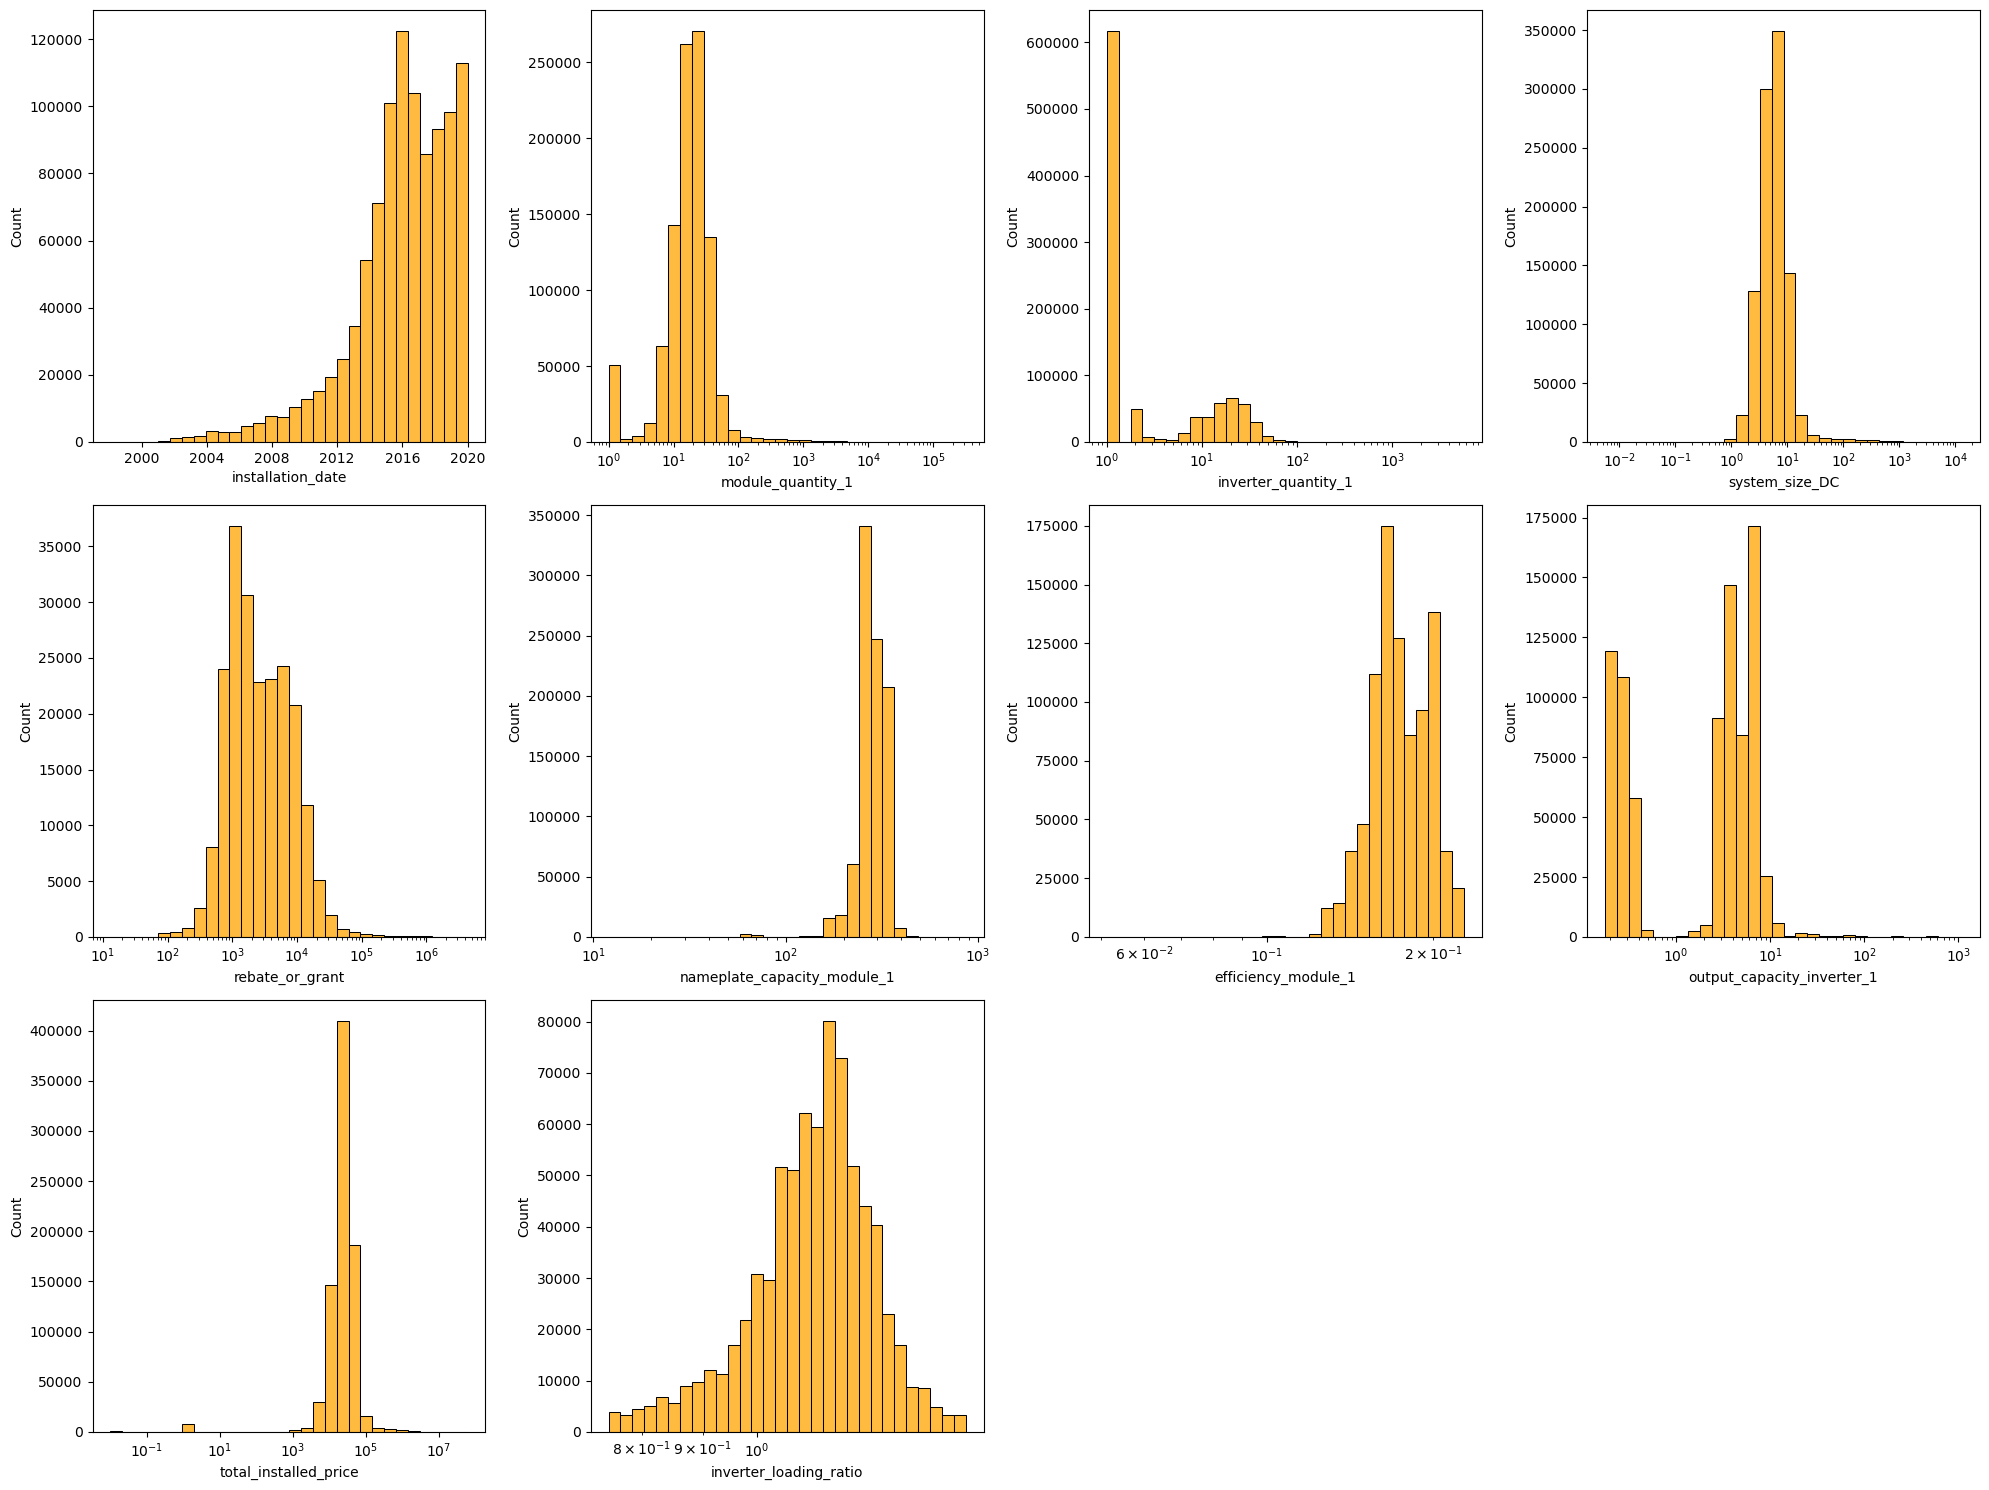

In [10]:

fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):  
    ax = plt.subplot(rows, cols, i)  
    sns.histplot(valid_df[col].dropna(), bins=30, kde=False, log_scale=True, color = "orange", ax=ax)
plt.tight_layout() 
plt.show()

## General time series visualisation using rolling window and ewm

First we can look for mean, max, min within different periods, then we can smoothen values using exponentially w or just rolling.  
Use function `def view_series(period = "W", window = 4, grouping_function = "mean", ewm = False)`

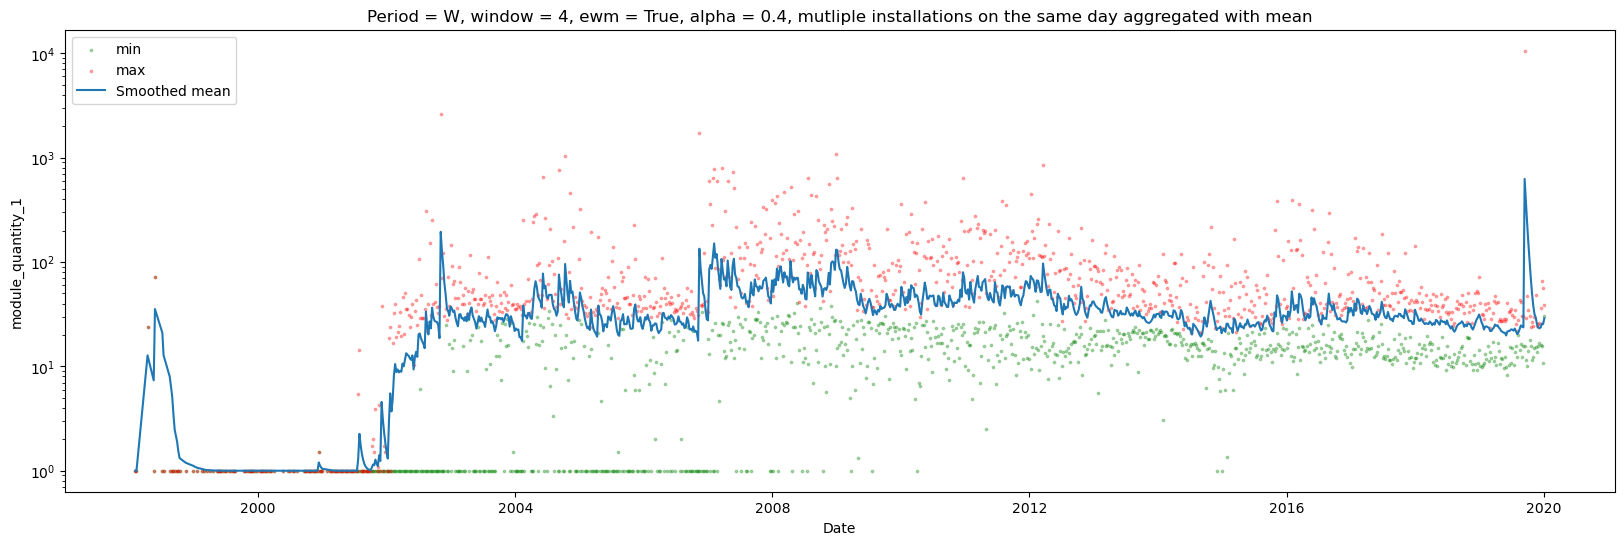

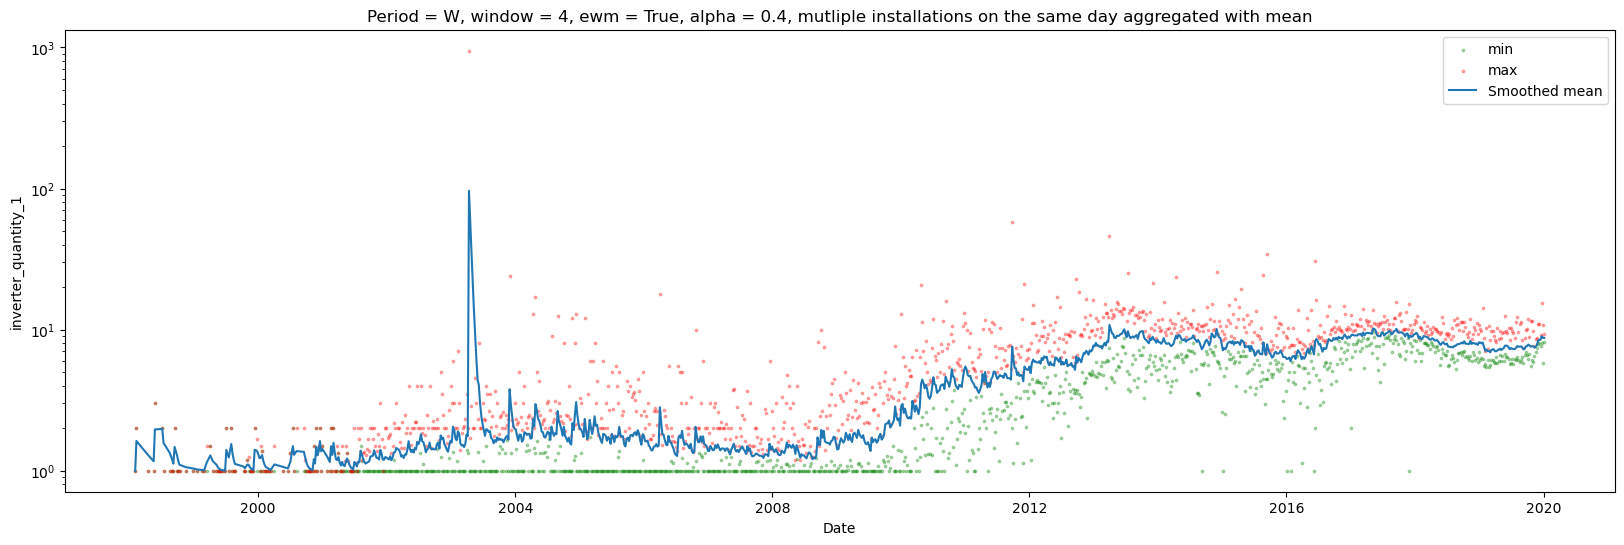

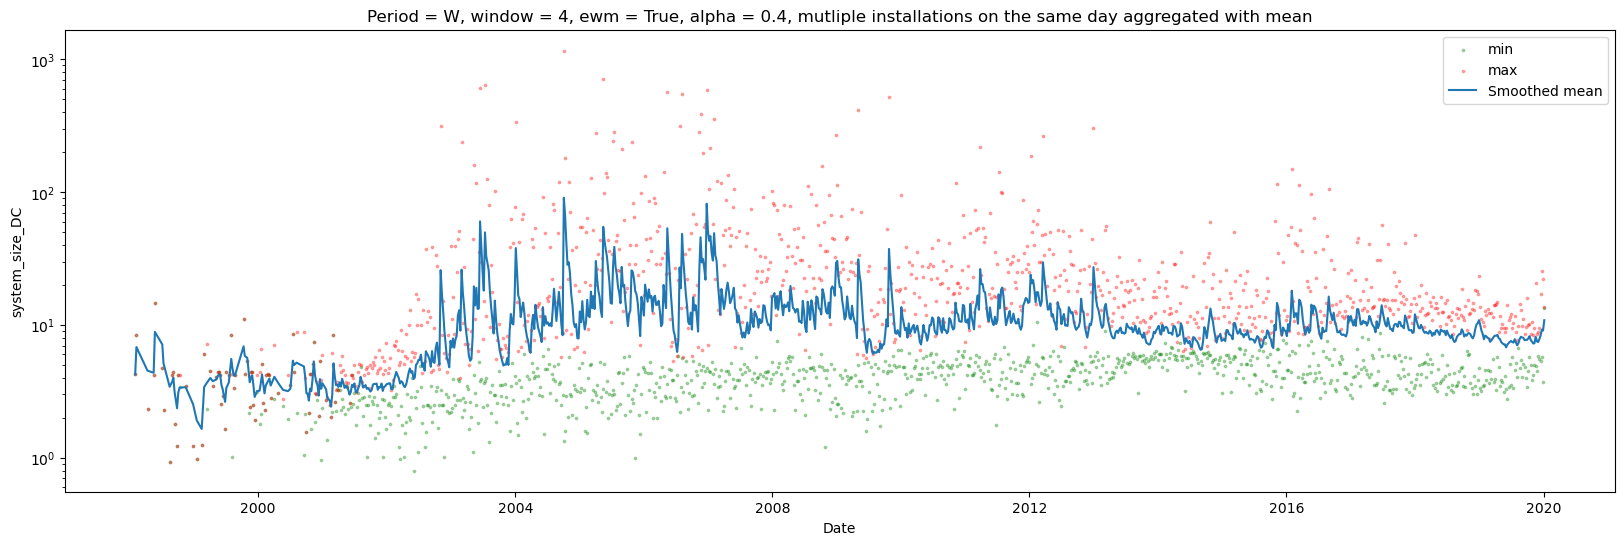

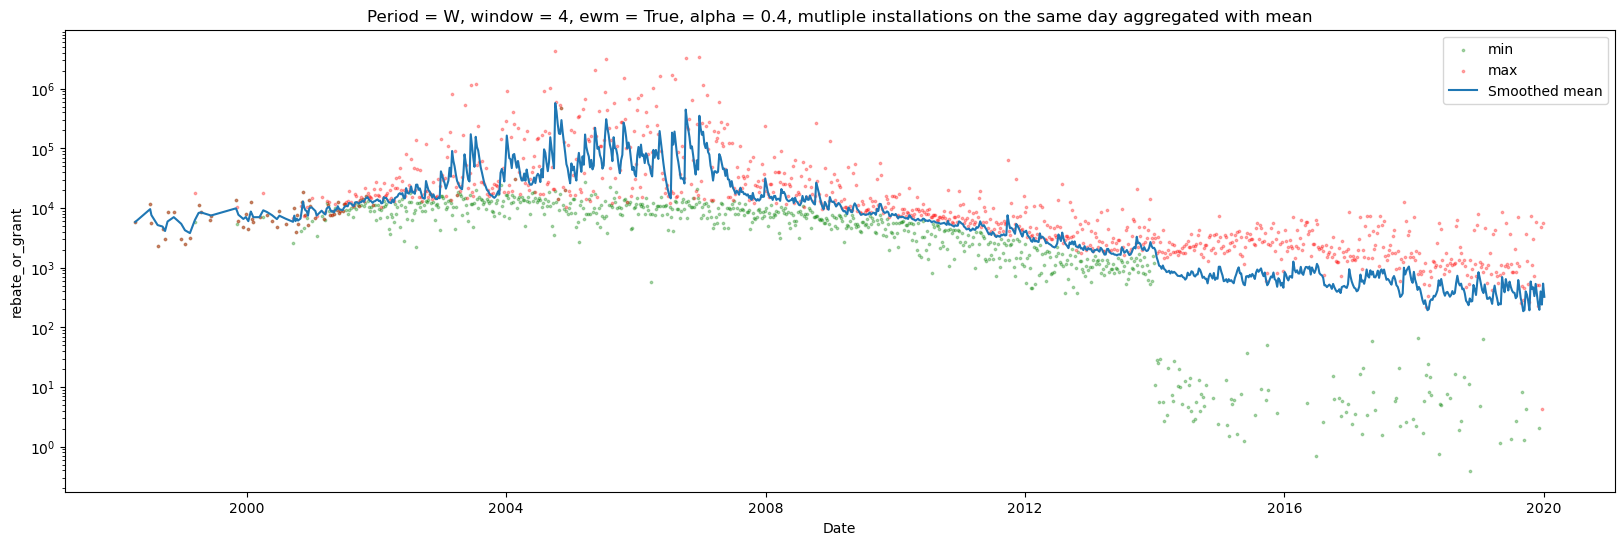

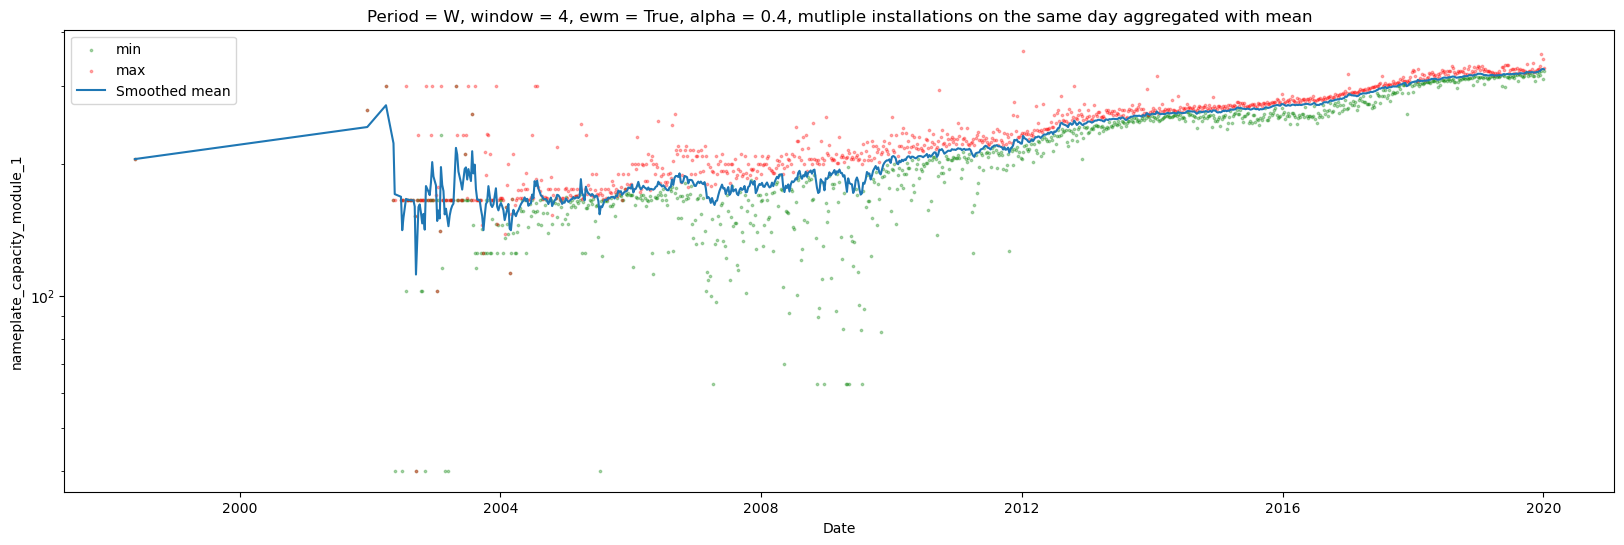

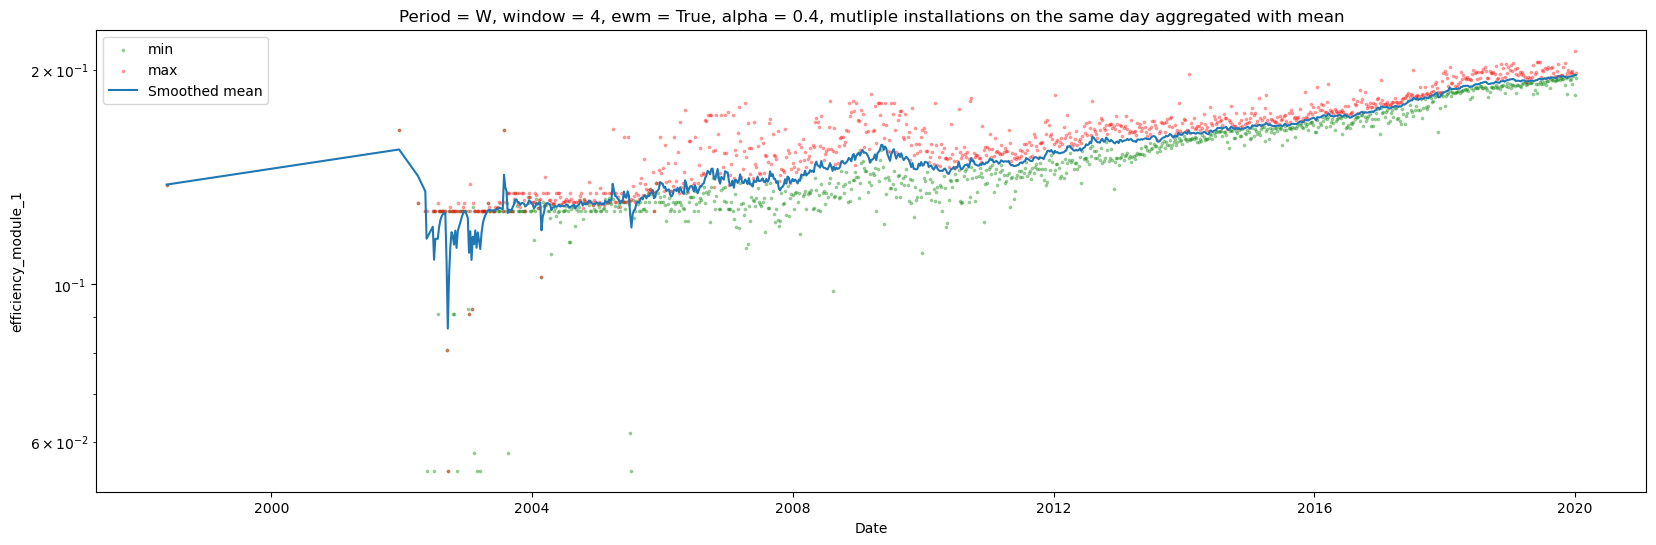

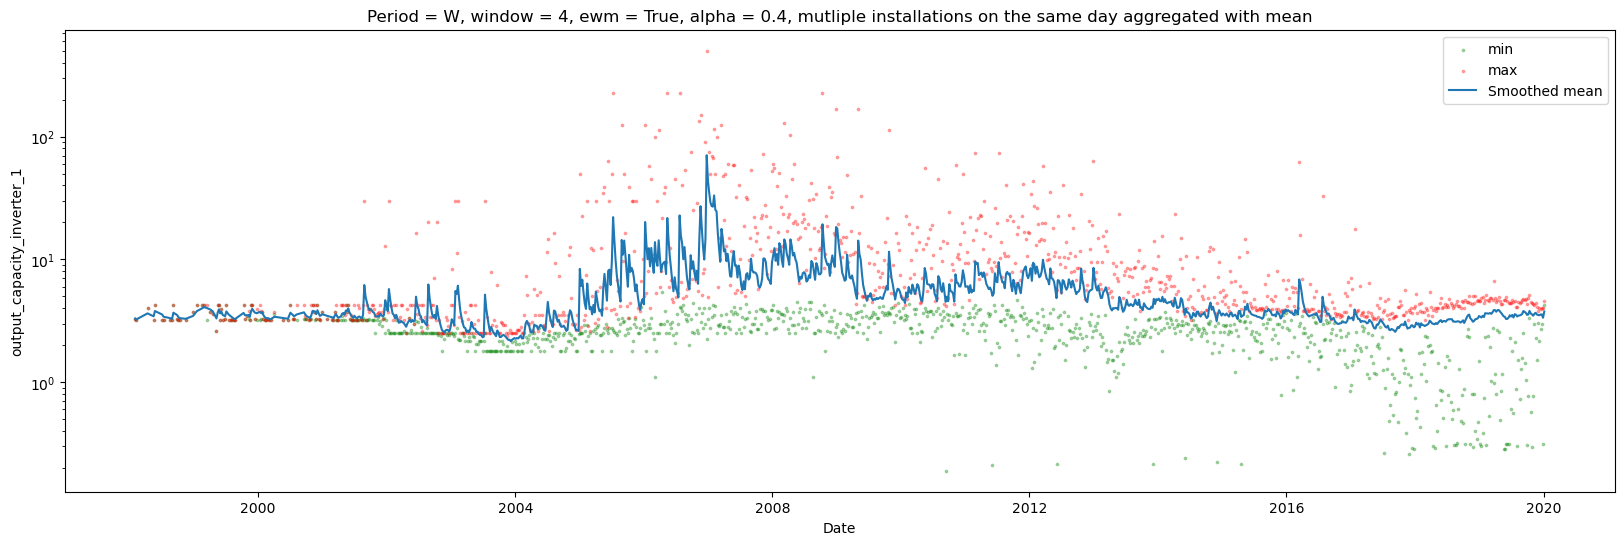

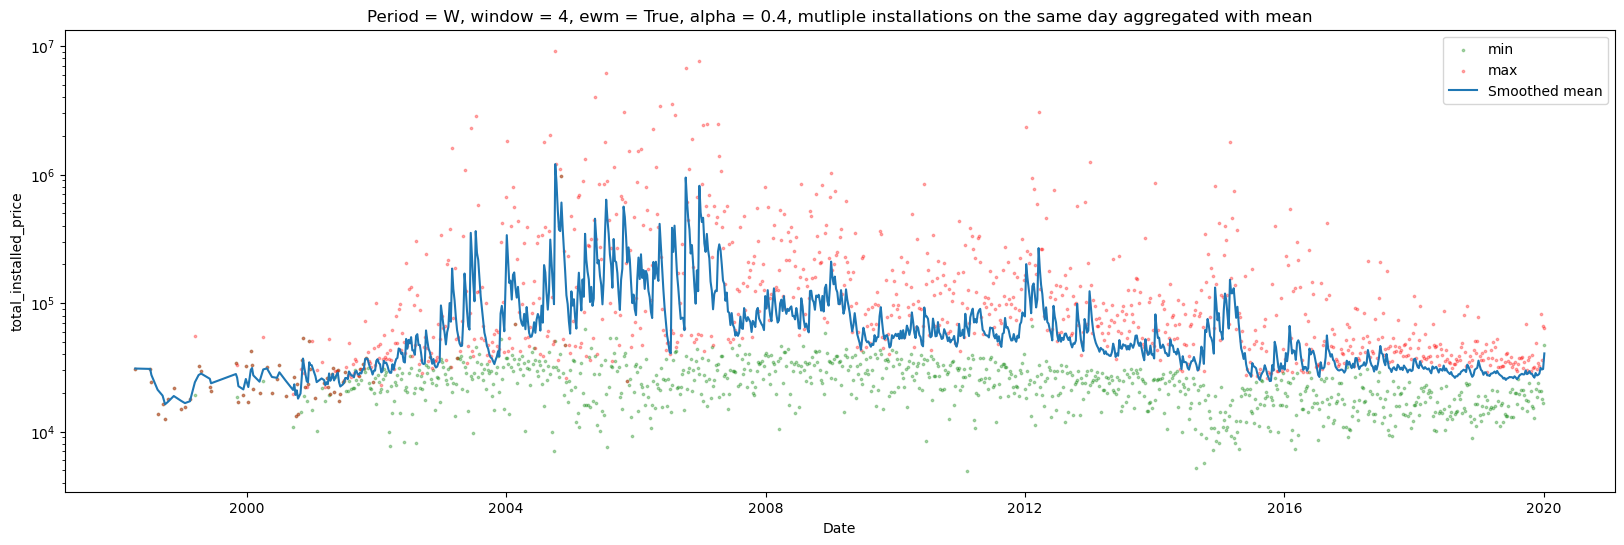

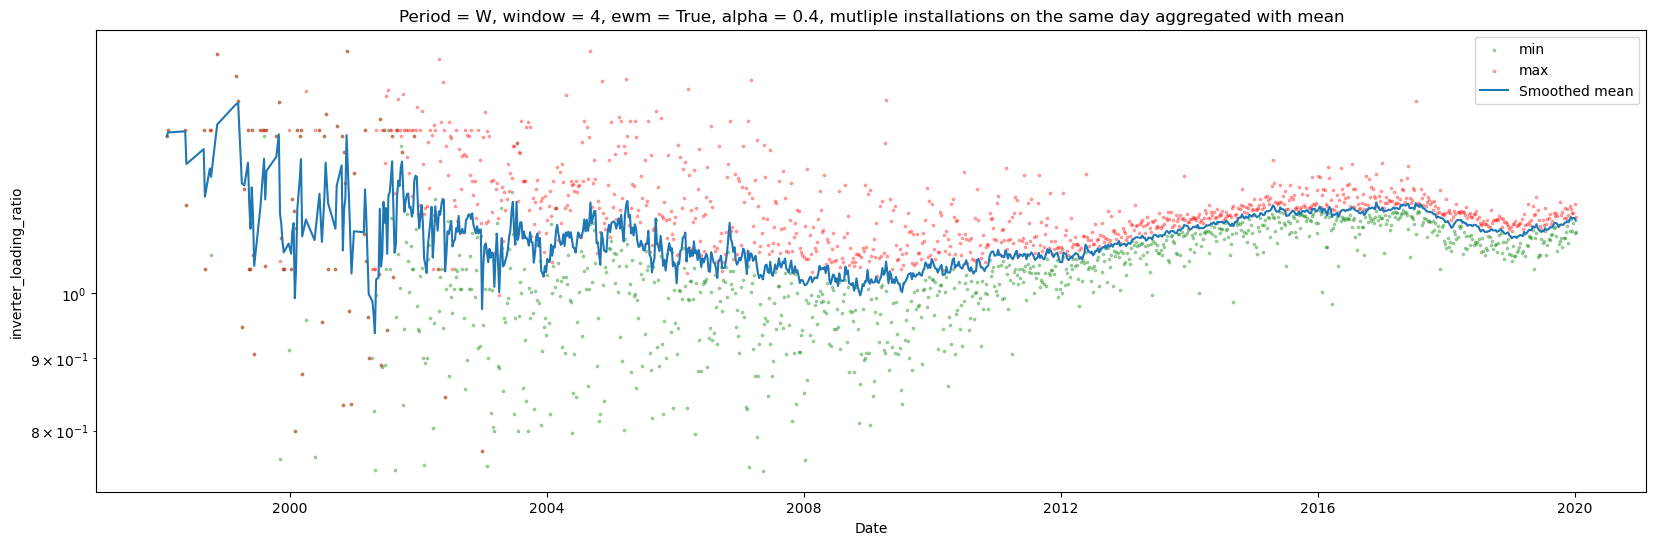

In [11]:
#specify period
period = "W"
#window size will consider period above, for example if period is set to month and window is set to 5, then total window size is 5 months
window = 4
def view_series(period = "W", window = 4, aggregation_function = "mean", ewm = False):
    for column in numeric_columns[1:]:
        alpha = 0
        date_grouping = valid_df.groupby("installation_date")[column].agg(aggregation_function).resample(period)
        min = date_grouping.min().dropna()
        max = date_grouping.max().dropna()
        mean = date_grouping.mean().dropna()
        plt.figure(figsize=(20, 6))
        plt.scatter(x = min.index, y = min.values, label = "min", alpha = 0.3, color = "green", s = 3)
        plt.scatter(x = max.index, y = max.values, label = "max", alpha = 0.3, color = "red", s = 3)
        if ewm == True:
            alpha = 2 / (window + 1)
            plt.plot(mean.ewm(span=window).mean(), label = "Smoothed mean")
        else:
            plt.plot(mean.rolling(window).mean(), label = "Smoothed mean")
        plt.ylabel(column)
        plt.xlabel("Date")
        plt.yscale("log")
        plt.title(f"Period = {period}, window = {window}, ewm = {ewm}, alpha = {alpha}, mutliple installations on the same day aggregated with {aggregation_function}")
        plt.legend()
        plt.show()
view_series(ewm=True, aggregation_function="mean")

### Regression plots

We can optimize plotting by grouping data in certain time period, also i added smoothing of values

[nameplate_capacity_module_1    0.755598
efficiency_module_1            0.648574
Name: installation_date, dtype: float64, system_size_DC                0.408701
output_capacity_inverter_1    0.226643
total_installed_price         0.725707
Name: module_quantity_1, dtype: float64, Series([], Name: inverter_quantity_1, dtype: float64), output_capacity_inverter_1    0.581416
total_installed_price         0.735356
Name: system_size_DC, dtype: float64, total_installed_price    0.244279
Name: rebate_or_grant, dtype: float64, efficiency_module_1    0.841439
Name: nameplate_capacity_module_1, dtype: float64, Series([], Name: efficiency_module_1, dtype: float64), total_installed_price    0.565122
Name: output_capacity_inverter_1, dtype: float64, Series([], Name: total_installed_price, dtype: float64), Series([], Name: inverter_loading_ratio, dtype: float64)]


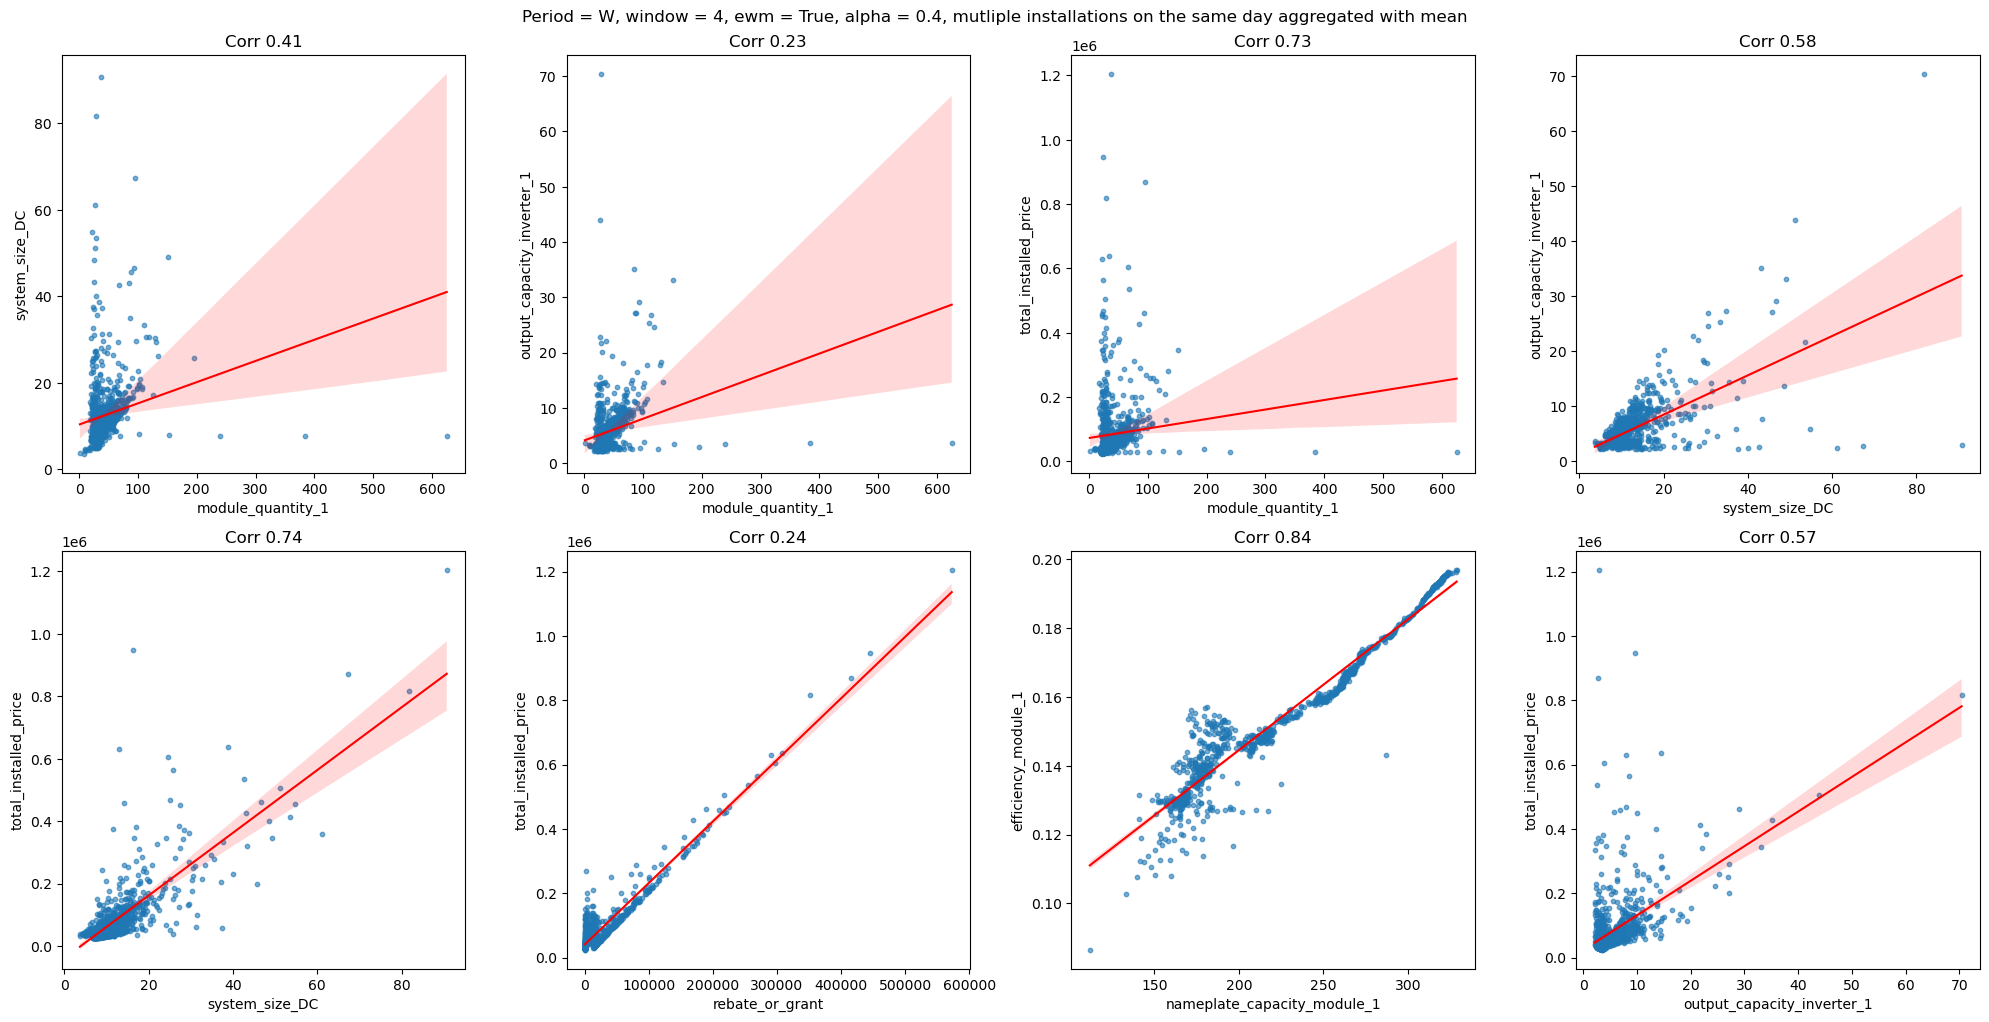

In [12]:
def regplot_series(period = "W", window = 4, grouping_function = "mean", ewm = False, min_corr = 0.8):
    corr = valid_df[numeric_columns].corr().abs()
    to_view = []
    total_plots = 0
    cols = []
    for col in corr.columns:
        cols.append(col)
        series = corr[col][(corr[col] > min_corr) & (corr[col] < 1)]
        #removing duplicated combinataions
        for col in cols:
            if col in series.keys():
                series = series.drop(col)
                pass
        to_view.append(series)
        total_plots += len(series)
    print(to_view)
    rows = int(np.sqrt(total_plots))  
    cols = int(np.ceil(total_plots / rows)) 
    alpha = 0
    date_grouping = valid_df.groupby("installation_date")[numeric_columns[1:]].agg(grouping_function).resample(period)
    data = date_grouping.mean().dropna()

    #ewm or rolling smoothing can be removed if needed
    if ewm == True:
        alpha = 2 / (window + 1)
        data = data.ewm(span=window).mean()
    else:
        data = data.rolling(window).mean()
    
    counter = 1
    plt.figure(figsize=(20,15))
    for series in to_view[1:]:
        for col in series.keys():
            if col != "installation_date":
                ax = plt.subplot(rows, cols, counter)  
                sns.regplot(x = data[series.name], y = data[col], line_kws = {'color': 'red', 'linewidth': 1.5}, scatter_kws = {'alpha': 0.6, 's': 10}, ax = ax)
                plt.ylabel(col)
                plt.xlabel(series.name)
                plt.title(f"Corr {round(series[col], 2)}")
                counter += 1
    plt.suptitle(f"Period = {period}, window = {window}, ewm = {ewm}, alpha = {alpha}, mutliple installations on the same day aggregated with {grouping_function}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
regplot_series(ewm=True, grouping_function="mean", min_corr=0.2)

# Grouping

### Seasonality of installations

Autumn    261200
Spring    239164
Summer    254524
Winter    245112
Name: installation_date, dtype: int64


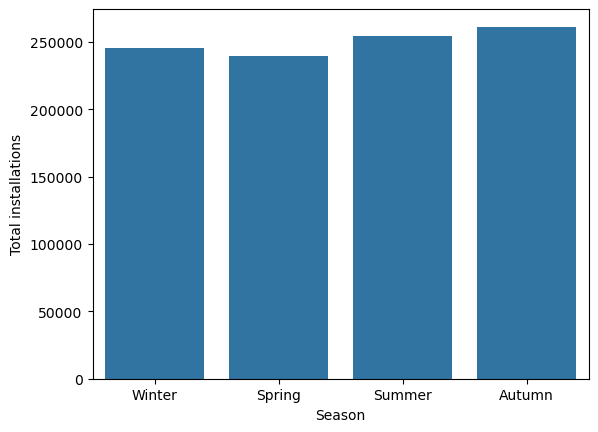

In [13]:
seasons =  valid_df["installation_date"].dt.month.copy()
seasons = seasons.apply(lambda x: "Winter" if x in [12, 1, 2] else "Spring" if 3 <= x <= 5 else "Summer" if 6 <= x <= 8 else "Autumn")
seasons = seasons.groupby(by = seasons.values).count()
print(seasons)
sns.barplot(x = seasons.index, y = seasons.values, order= ["Winter", "Spring", "Summer", "Autumn"])
plt.ylabel("Total installations")
plt.xlabel("Season")
plt.show()

### Statistics by customer segment and binary parameters

value     count       mean         std  \
variable                                                                     
expansion_system                        0  806245.0   38217.15   191605.40   
expansion_system                        1    8119.0   41218.49   223368.86   
multiple_phase_system                   0  811161.0   37852.34   189071.96   
multiple_phase_system                   1    3203.0  138212.80   551754.86   
additional_modules                    0.0  813285.0   38171.23   191325.25   
additional_modules                    1.0      81.0  400971.62  1159231.00   
additional_inverters                  0.0  813144.0   37951.77   189642.86   
additional_inverters                  1.0     222.0  974369.63  1426776.61   
DC_optimizer                          0.0  576239.0   42547.48   226230.85   
DC_optimizer                          1.0  236369.0   27545.98    34977.18   
micro_inverter_1                      0.0  556899.0   44472.92   230208.61   
micro_inverter_1                      1.0  254903.0   24258.36    26266.49   
self_installed                        0.0  772985.0   38117.05   191789.58   
self_installed                        1.0   21604.0   23605.18    90810.94   
bifacial_module_1                     0.0  809823.0   38272.51   192018.97   
bifacial_module_1                     1.0     516.0   36654.17   108508.44   
BIPV_module_1                         0.0  800697.0   38182.68   190878.68   
BIPV_module_1                         1.0    2646.0   42585.37   241466.88   
third_party_owned                     0.0  496486.0   40247.76   197160.84   
third_party_owned                     1.0  310511.0   34349.39   178876.69   
built_in_meter_inverter_1             0.0  344373.0   33721.37   190583.97   
built_in_meter_inverter_1             1.0  384291.0   43611.82   206754.47   
tracking                              0.0  781716.0   36539.97   171323.20   
tracking                              1.0    4863.0  255690.51  1077430.30   
solar_storage_hybrid_inverter_1       0.0  661083.0   37926.62   189730.54   
solar_storage_hybrid_inverter_1       1.0    3278.0   35596.62    32817.72   
ground_mounted                        0.0  687844.0   30583.08   110631.86   
ground_mounted                        1.0   19579.0  182497.23   817778.03   
customer                         Business   19678.0  491105.07  1135061.78   
customer                         Consumer  794686.0   27033.41    25525.60   
grants_rebates                          0  597474.0   39967.61   216306.78   
grants_rebates                          1  216890.0   33507.47    97051.24   

                                    min       25%        50%         75%  \
variable                                                                   
expansion_system                   0.01  16357.00   24129.44    34297.16   
expansion_system                   0.01  12499.94   18000.00    27294.80   
multiple_phase_system              0.01  16282.00   24026.60    34200.00   
multiple_phase_system              0.10  16000.00   30375.00    65414.69   
additional_modules                 0.01  16281.60   24030.00    34230.00   
additional_modules                 1.00  14790.00   24315.00    72000.00   
additional_inverters               0.01  16281.60   24024.00    34224.00   
additional_inverters               0.10  97695.50  516556.80  1083280.25   
DC_optimizer                       0.01  15974.00   24192.00    34946.15   
DC_optimizer                       0.01  17099.60   23908.00    32749.58   
micro_inverter_1                   0.01  17568.00   25200.00    35780.00   
micro_inverter_1                   0.01  13567.51   21498.75    30682.62   
self_installed                     0.01  16384.00   24166.40    34250.00   
self_installed                     0.01  12500.46   16344.79    22003.50   
bifacial_module_1                  0.01  16300.00   24087.00    34272.00   
bifacial_module_1                  1.00  16787.50   24107.50    33171.00   
BIPV_module_1  

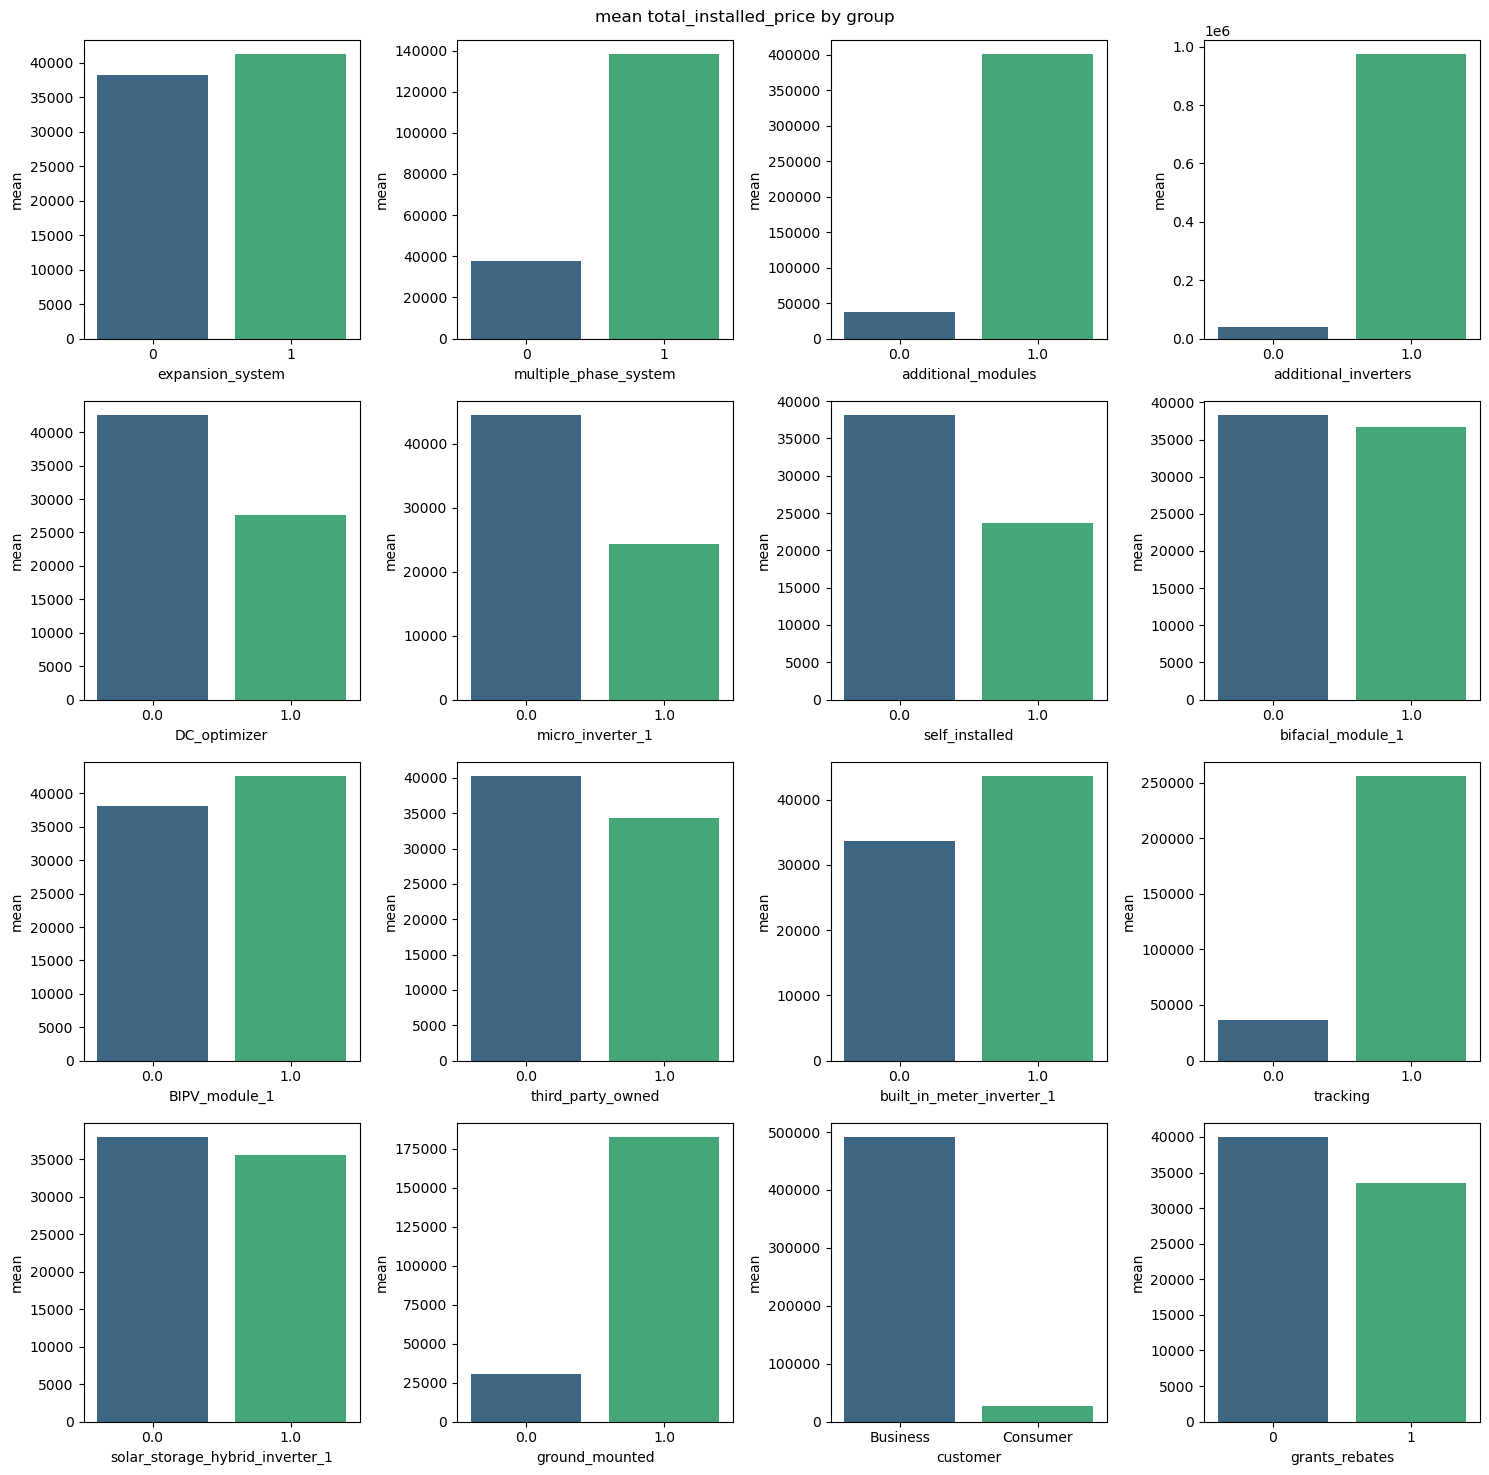

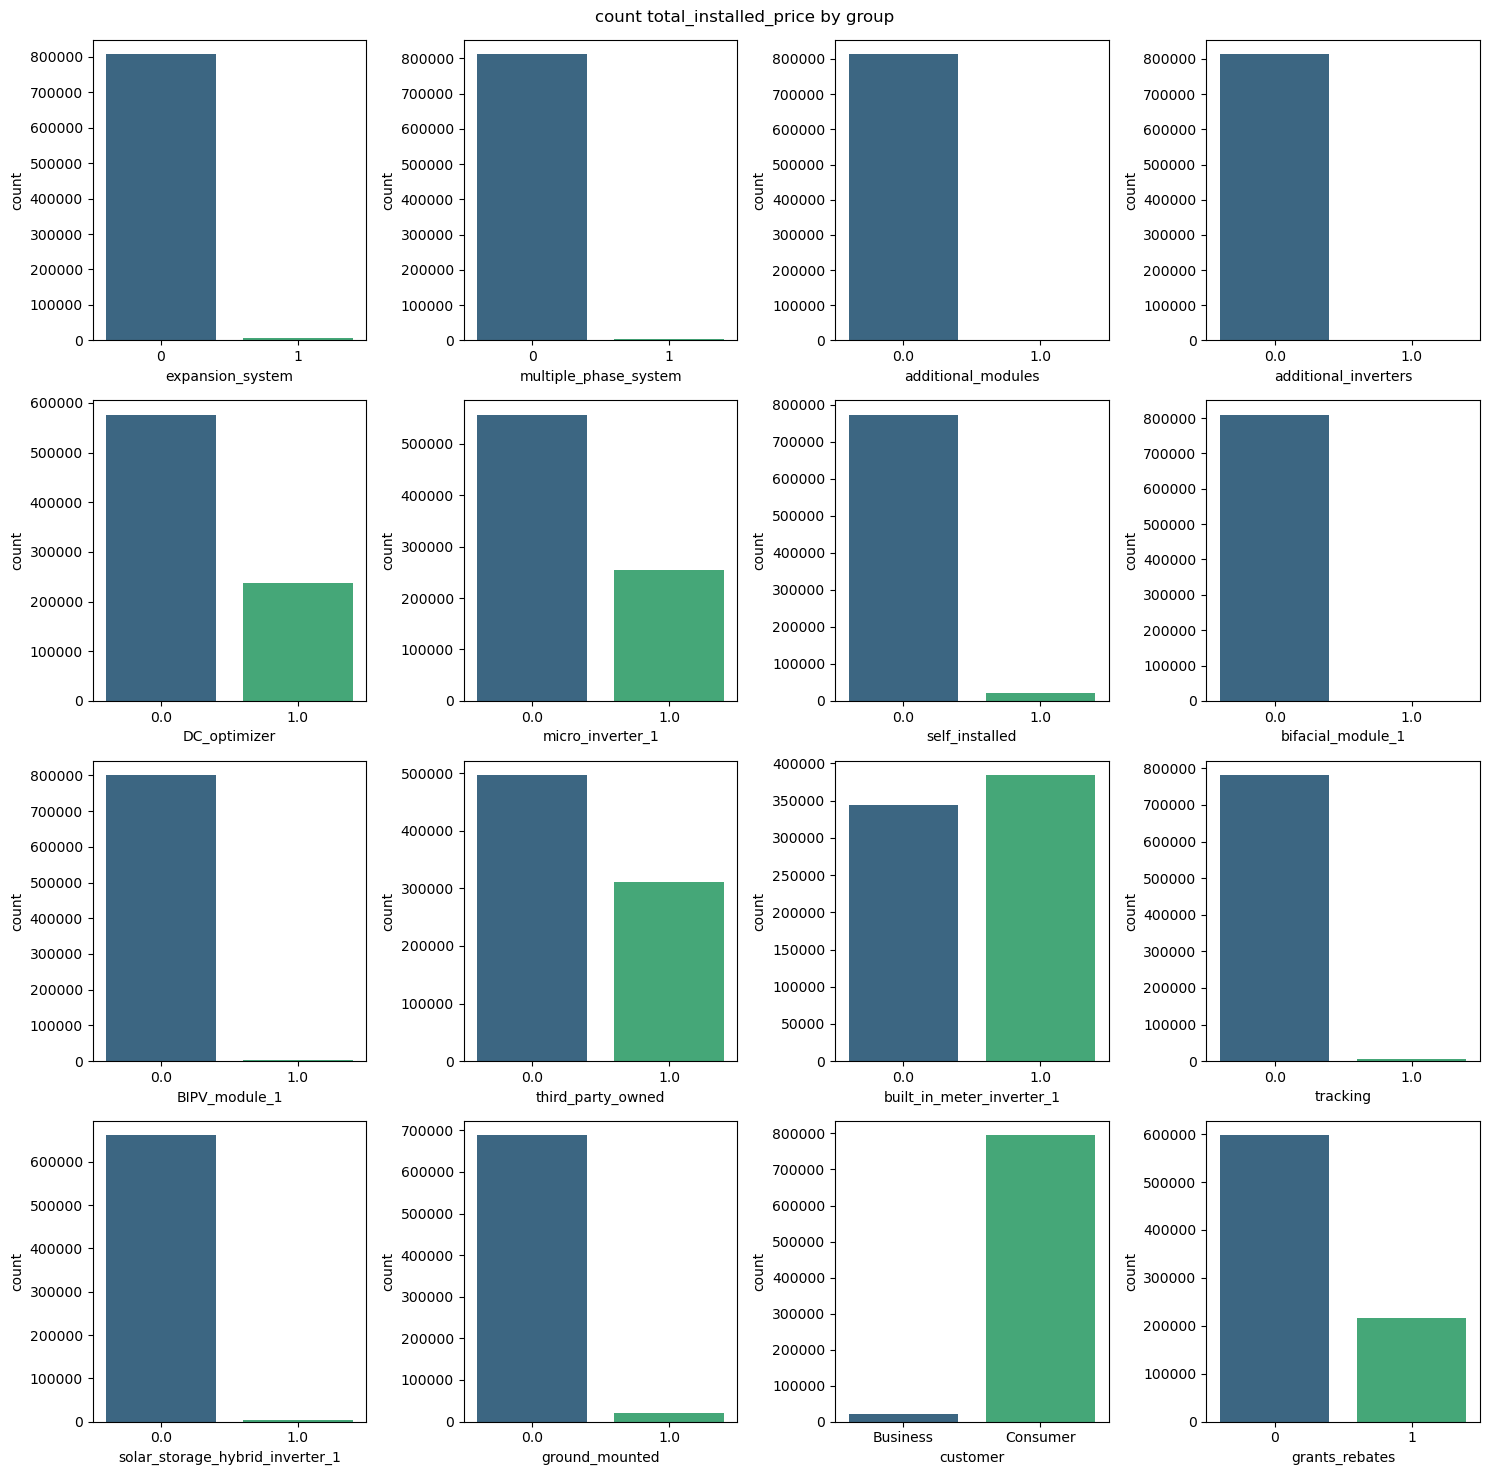

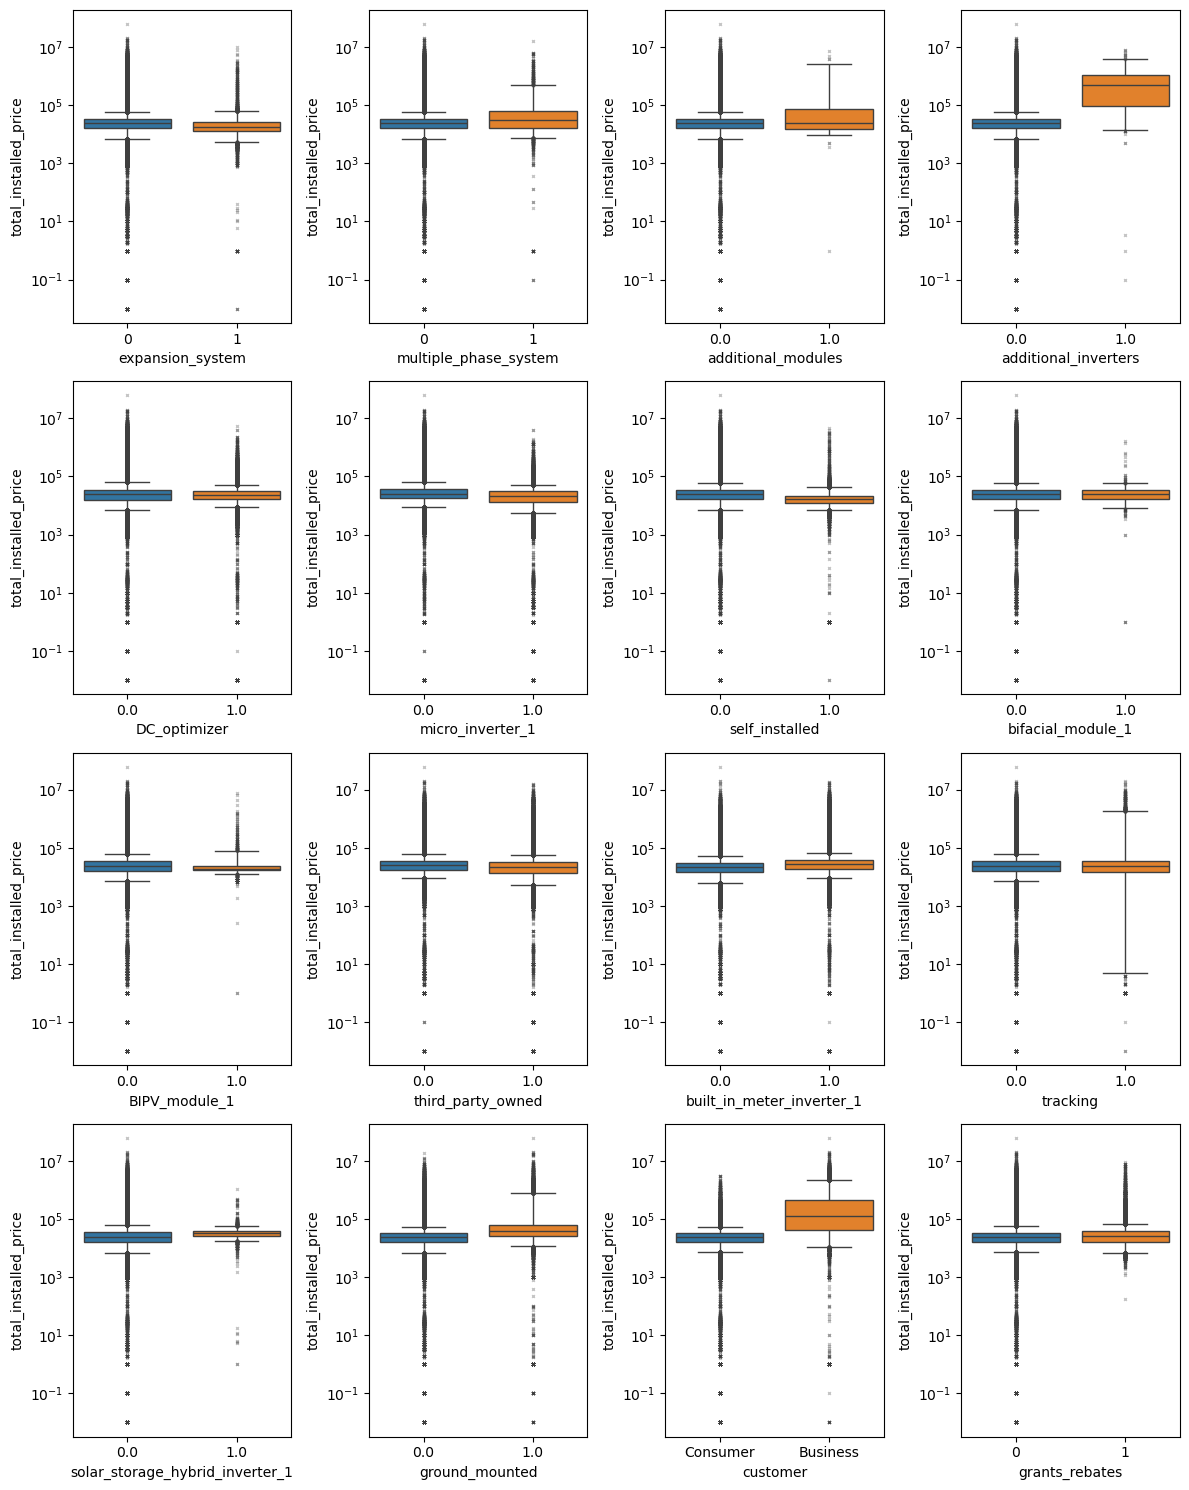

In [14]:
valid_df["customer"] = valid_df["customer_segment"].apply(lambda x: "Consumer" if x == "RES" else "Business")
valid_df["grants_rebates"] = valid_df["rebate_or_grant"].apply(lambda x: 0 if x == 0 else 1)

def stats_by_group(additional_plots = None, display_table = True, target_col = "total_installed_price"):
    to_plot = valid_df.nunique(dropna=True)
    to_plot = to_plot[to_plot == 2].index.to_list()
    num_plots = len(to_plot)
    rows = int(np.sqrt(num_plots))  
    cols = int(np.ceil(num_plots / rows)) 
    all_stats = [] 
    for col in to_plot:  
        stats = valid_df.groupby(col)[target_col].describe()
        quantiles = valid_df.groupby(col)[target_col].quantile([0.05, 0.95]).unstack()
        quantiles.columns = ["5th percentile", "95th percentile"]
        combined_stats = stats.join(quantiles)
        combined_stats.insert(0, "variable", col)
        all_stats.append(combined_stats)
    all_stats = pd.concat(all_stats)
    all_stats.insert(0, "value", all_stats.index)
    all_stats.set_index("variable", inplace=True)
    all_stats[all_stats.columns[1:]] = all_stats[all_stats.columns[1:]].round(2)
    if display_table:
        display(all_stats)

    if additional_plots:
        for plot in additional_plots:
            plt.figure(figsize=(15, 15))
            for i, col in enumerate(to_plot, 1):  
                ax = plt.subplot(rows, cols, i)
                sns.barplot(x=all_stats.loc[col, "value"], y=all_stats.loc[col, plot], palette="viridis",  ax=ax)
                plt.xlabel(f"{col}")
            plt.tight_layout()
            plt.suptitle(f"{plot} {target_col} by group")
            plt.subplots_adjust(top = 0.96)
            plt.show()

    plt.figure(figsize=(12, 15))
    for i, col in enumerate(to_plot, 1):  
        ax = plt.subplot(rows, cols, i)  
        sns.boxplot(valid_df, x = col, y = target_col, whis=(5, 95), hue = col,  flierprops={'marker': 'x', 'markersize': 2, "alpha": 0.3}, ax =ax, legend=False)
        plt.yscale("log")
    plt.tight_layout() 
    plt.show()
stats_by_group(additional_plots=["mean", "count"])

### Pricing and system size by groups of interest

['Consumer' 'Business']


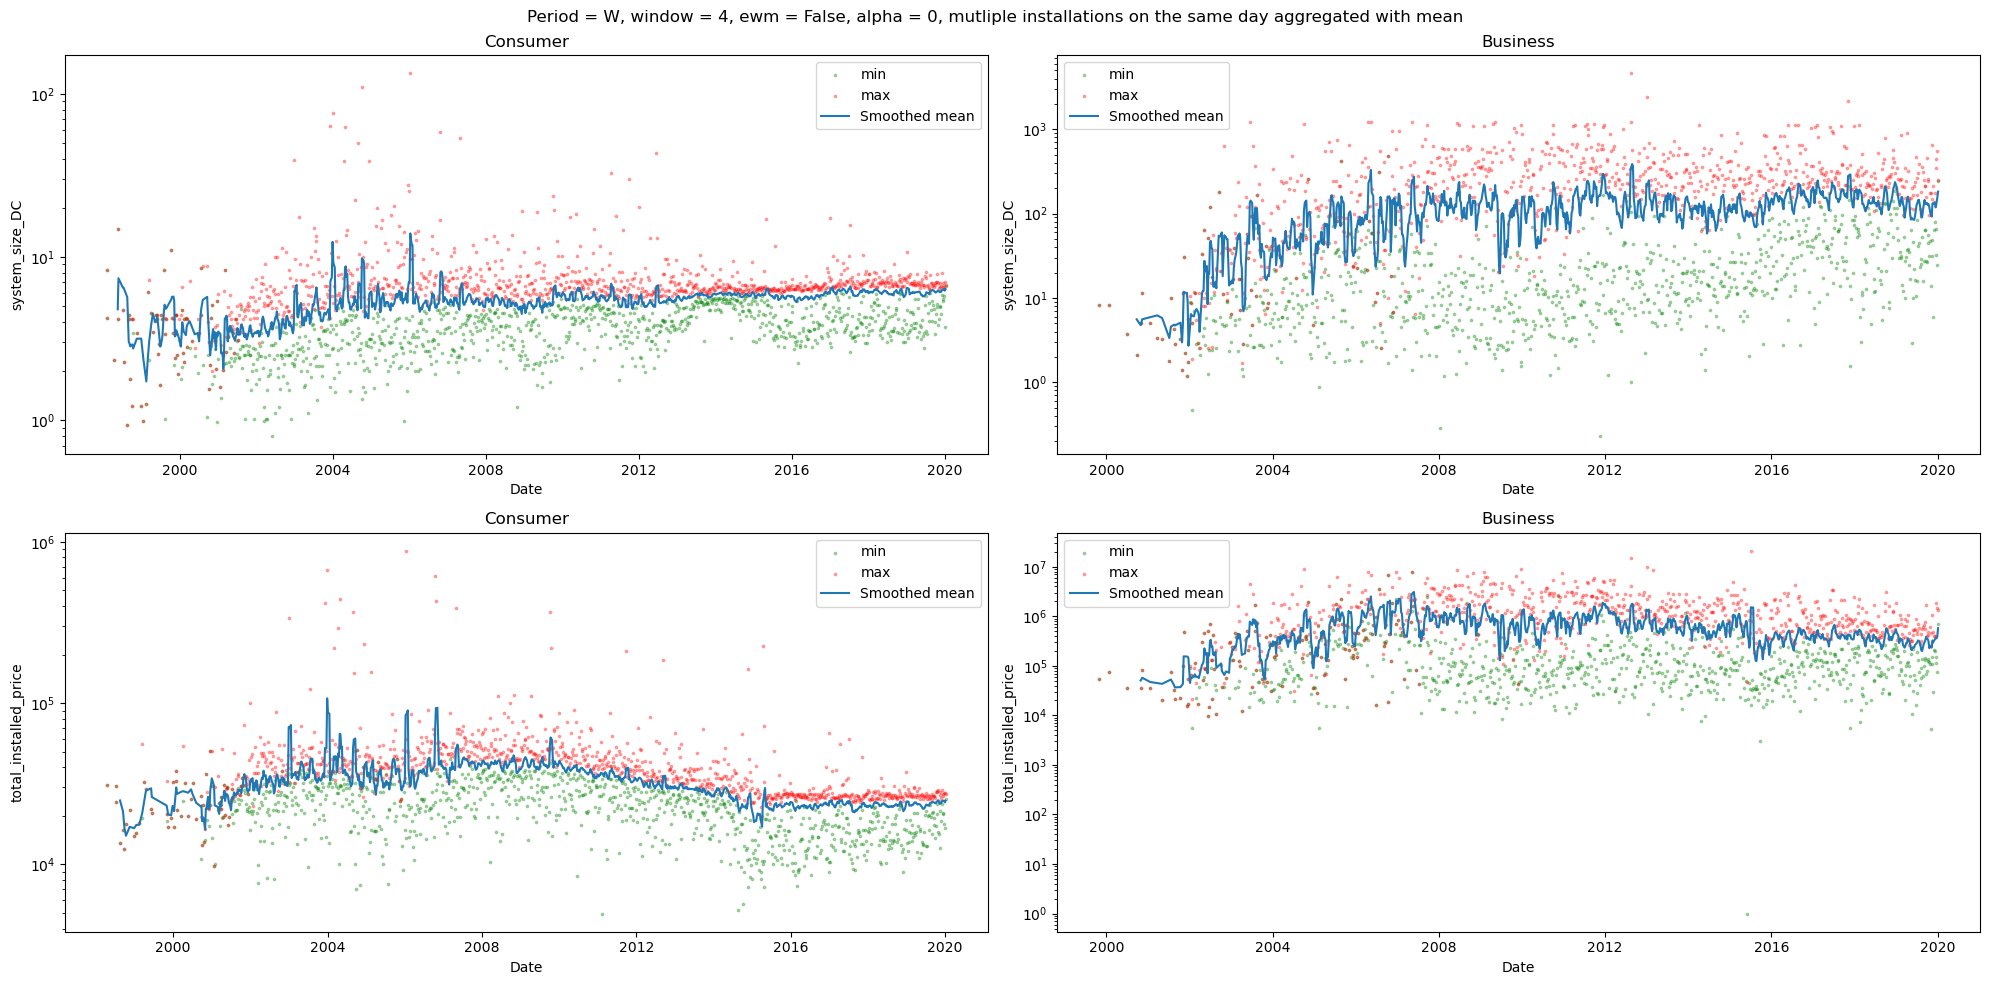

In [15]:

def view_series_by_group(period = "W", window = 4, aggregation_function = "mean", ewm = False, grouping_col = "customer", colums_of_interest = ["system_size_DC", "total_installed_price"]):
    group_keys = valid_df[grouping_col].unique()
    rows = len(colums_of_interest)
    cols = len(group_keys)
    fig, axes =plt.subplots(rows, cols, figsize = (20,10))
    print(group_keys)
    for col, key in enumerate(group_keys):
        data = valid_df.loc[valid_df[grouping_col] == key, :].copy()
        for row, column in enumerate(colums_of_interest):
            ax = axes[row, col]
            alpha = 0
            date_grouping = data.groupby("installation_date")[column].agg(aggregation_function).resample(period)
            min = date_grouping.min().dropna()
            max = date_grouping.max().dropna()
            mean = date_grouping.mean().dropna()
            ax.scatter(x = min.index, y = min.values, label = "min", alpha = 0.3, color = "green", s = 3)
            ax.scatter(x = max.index, y = max.values, label = "max", alpha = 0.3, color = "red", s = 3)
            if ewm == True:
                alpha = 2 / (window + 1)
                ax.plot(mean.ewm(span=window).mean(), label = "Smoothed mean")
            else:
                ax.plot(mean.rolling(window).mean(), label = "Smoothed mean")
            ax.set_ylabel(column)
            ax.set_xlabel("Date")
            ax.set_yscale("log")
            ax.set_title(key)
            ax.legend()
    plt.suptitle(f"Period = {period}, window = {window}, ewm = {ewm}, alpha = {alpha}, mutliple installations on the same day aggregated with {aggregation_function}")
    plt.subplots_adjust(top = 0.95)
    plt.tight_layout()
    plt.show()

view_series_by_group()

# Data report

Dataset was acquired from https://www.kaggle.com/datasets/arnavsharmaas/solar-panel-pv-system-dataset/data.  
Dataset contains huge number of missing values and following variables have more or less adequate amount of valid values:  
| Variable                        | Valid percent|
|:--------------------------------|---------:|
| installation_date               | 100      |
| utility_service_territory       | 100      |
| state                           | 100      |
| customer_segment                | 100      |
| expansion_system                | 100      |
| multiple_phase_system           | 100      |
| city                            |  99.9999 |
| system_ID_1                     |  99.9895 |
| additional_modules              |  99.8971 |
| additional_inverters            |  99.8971 |
| module_quantity_1               |  99.6328 |
| DC_optimizer                    |  99.502  |
| inverter_quantity_1             |  99.4951 |
| micro_inverter_1                |  99.4201 |
| system_size_DC                  |  98.8692 |
| self_installed                  |  95.5557 |
| rebate_or_grant                 |  95.4632 |
| bifacial_module_1               |  94.7354 |
| technology_module_1             |  94.3796 |
| BIPV_module_1                   |  94.0045 |
| installer_name                  |  93.1942 |
| third_party_owned               |  91.7377 |
| nameplate_capacity_module_1     |  90.6207 |
| efficiency_module_1             |  90.5703 |
| module_manufacturer_1           |  90.1152 |
| module_model_1                  |  90.1115 |
| built_in_meter_inverter_1       |  90.0303 |
| tracking                        |  89.944  |
| inverter_manufacturer_1         |  88.8617 |
| output_capacity_inverter_1      |  82.949  |
| solar_storage_hybrid_inverter_1 |  81.7208 |
| total_installed_price           |  81.4364 |
| ground_mounted                  |  75.9462 |
| inverter_loading_ratio          |  75.3185 |

During the initial Data Analysis it was discovered that the system_ID_1 is the unique identifier for the installation, which can be used to join or fuse any other available datasets. Valid data also contains significant amount of outliers, so dropping them would shrink the dataset completely, also clipping might significantly damage already not perfect data quality, so it is decided to leave them. According to the analysis there is around 160000 missing "total_installed_price" values in years 2013-2015. Also from NaN correlation matrix it is seen that missing values especially from columns "city", "system_ID_1", "additional_modules", "additional_inverters", "DC_optimizer", "inverter_qantity_1", "micro_inverter_1" correlate with missing values in other columns. It was also identified that columns containing word "model" or "manufacturer" have quite big amount of unique values, describing the installation in more detail. There are also columns containing only two unique values 0 or 1, which correspond for a ceratin feature of PV module, like is it ground mounted, is it tracking the sun or is there additional modules or not etc. There are also numerical variables such as system_size_DC, output_capacity_inverter_1, nameplate_capacity_module, and module_quantity describing generative power of the PV installation. Also noticable column is rebate_or_grant it shows an amount of long term "discount" provided to the customer by certain authority. In gerenal data quality is quite bad. Many categorical columns (model, manufacturer, etc.) have high cardinality, which can affect modeling.
  
**About general correlations and trends**  
It is seen that the price had it's peak in years 2004-2008, but noticable that there is slightly negative correlation between date and price, also from plotting it is seen that the current trend shows that the prices are declining from the peak values in 2004, and being more or less stable with small decline in recent years (important to notice log scale). Low negative correlation value of -0.1-0.2 might be caused by outliers and skewness of distribution of installations, it is seen that amount of installations have increased almost exponentially starting from 1998 till now. Also it is noticable that efficiency of the systems is rising through the years, but the size of the systems is varying significantly but have a slight negative trend, quantity of installed modules seem to be more or less stable but starting from 2006 with a slight negative trend. It is also noticable that the price have quite high positive correlation > 0.7 with module_quanity_1 and system_size_DC. There are also some noticable correlations between the parameters of installation for instance system_size_DC and output_capacity_inverter_1 having correlation of 0.58, in the regression plotting was used weekly grouping for optimization + ewm smoothing with window 4, so plotted values might not be very accurate but it gives a general picture anyway. While rebate_or_grant doesn't show hight correlation with price it definitely affects the price (higer the grant more the installed price), low correlation is caused by the disbalance in the installations where  long term discount was applied, most of the installations don't have any discount. It is also seen that price is highly varying within the most of binary variables of installations, it is noticable in difference between mean values and "drift" of Q1 and Q3 between categories in those variables, additionally box plots are used with logarithmic scale, so tiny difference there, is quite big difference in numbers. The problem is that count of installations within groups inside of those binary varibales is insanely disbalanced, more than 90% of values correspond to the group 0. Also it is seen that the prices for the business customers are much more higher than for the consumers (as consumer i consider "RES" category and the rest is considered as business). Also business customers have much more bigger system sizes, also noticable that there is a disbalance between business and consumer group counts. In general it is seen that installation prices for the consumers are declining from 2008, being more or less stable in recent years with small negative trend, system sizes are rising throughout the time with a slight positive trend. For business customers prices have negative trend starting from 2008, while rising from 2000, being more or less stable in recent years. System size for business customer was significanlty growing from 2000 to 2004, after being more or less stable with high fluctiations, and noticably much higher than for consumers. Also checked seasonality of installations, from barplot it is seen that installations are done a bit more often in the second half of the year, during summer and autumn, but difference is not very significant.

One thing to notice, that i haven't yet computed system_size_DC/module_quanity or total_installed_price/module_quantity. Inspection of such values and their change througout the time series should be more informative, as we could see change in price per piece or change of power per piece. It should be more informative but it was noticed that module_quanity over the time is more or less stable starting from 2002, but it definitely affects the price.


# PHASE-3 Data preparation

Before dropping any rows I wll check the second dataset available, we will save system_ID_1 column data from current dataset and use it's values as keys to load data from the second dataset, then it is possible to run the whole notebook for the the second dataset and check how the situation is there. Dataset: `TTS_LBNL_public_file_21-Aug-2024_all` (it is mentioned in documentation for the current dataset). Values in system_ID_1 are all unique, and are an identifiers for the installations, they have only a few NaN rows, so we can drop some NaN values based on that column already now.

In [16]:
if main_dataset == False:
    raise "STOP"
valid_df.dropna(subset=["system_ID_1"], inplace=True)
keys = valid_df["system_ID_1"].copy()
keys.to_csv("keys.csv")
print("Number of uniques in system_ID_1:", keys.nunique(), "Length of system_ID_1:", len(keys))

Number of uniques in system_ID_1: 999895 Length of system_ID_1: 999895


# In some moments second dataset is better, in some not, i will fuse our dataset using the second one

Plus in the second dataset there is a `technology_type` column, which is quite interesting, so i will pick it from there. I will also store data from "solar_storage_hybrid_inverter_1" in separete variable since this column is missing from second dataset.

In [17]:
df_2 = None
valid_df.set_index("system_ID_1", inplace=True)
data_to_store = valid_df["solar_storage_hybrid_inverter_1"].copy()
valid_df.rename({"system_size_DC" : "PV_system_size_DC"}, inplace=True, axis=1)
valid_df.drop(["solar_storage_hybrid_inverter_1", "customer", "grants_rebates"], inplace=True, axis = 1)
print(keys.values)

['SCE-INT-NST-121948' 'SDGE-INT-231639' 'PGE-INT-117987883' ... 'D1575'
 'R1286' 'R1194']


In [18]:
if main_dataset == True:
    to_load = ["system_ID_1"] + valid_df.columns.to_list() + ["technology_type"]
    chunksize = 100000
    df_2 = pd.concat(chunk[chunk["system_ID_1"].isin(keys.values)] for chunk in pd.read_csv("public_file.csv", parse_dates=["installation_date"], na_values = ["-1", -1], chunksize=chunksize, usecols=to_load)) #usecols=valid_df.columns.to_list() + ["technology_type"]))
    print("Number of uniques in system_ID_1:", df_2["system_ID_1"].nunique(), "Length of system_ID_1:", len(df_2["system_ID_1"]))
    display(df_2[df_2["system_ID_1"].duplicated()])
    df_2.drop_duplicates(subset="system_ID_1", keep=False, inplace = True)
    df_2.set_index("system_ID_1", inplace=True)
display(df_2.info())

Number of uniques in system_ID_1: 988375 Length of system_ID_1: 988376


system_ID_1 installation_date  PV_system_size_DC  \
3059369  SCE-INT-NST-11128        2017-11-06              5.865   

         total_installed_price  rebate_or_grant customer_segment  \
3059369                24948.0              0.0              RES   

         expansion_system  multiple_phase_system  tracking  ground_mounted  \
3059369               NaN                    NaN       0.0             0.0   

         ... efficiency_module_1 inverter_manufacturer_1 inverter_quantity_1  \
3059369  ...            0.211527                SunPower                17.0   

         additional_inverters micro_inverter_1  built_in_meter_inverter_1  \
3059369                   0.0                Y                          N   

        output_capacity_inverter_1 DC_optimizer  inverter_loading_ratio  \
3059369                       0.32          0.0                1.078125   

         technology_type  
3059369          pv-only  

[1 rows x 34 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 988374 entries, PGE-INT-113469054 to PGE-INT-113469052
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   installation_date            988374 non-null  datetime64[ns]
 1   PV_system_size_DC            987967 non-null  float64       
 2   total_installed_price        806113 non-null  float64       
 3   rebate_or_grant              944215 non-null  float64       
 4   customer_segment             988374 non-null  object        
 5   expansion_system             884438 non-null  float64       
 6   multiple_phase_system        886693 non-null  float64       
 7   tracking                     887907 non-null  float64       
 8   ground_mounted               750105 non-null  float64       
 9   city                         988374 non-null  object        
 10  state                        988374 non-null  object        
 11  util

None

### Handling dtypes

In [19]:
unique_counts = df_2.nunique()
print(unique_counts[unique_counts == 2])
for key in valid_df.dtypes[valid_df.dtypes == "category"].keys():
    valid_df[key] = valid_df[key].astype(object)
for key in unique_counts[unique_counts == 2].keys():
    df_2[key] = df_2[key].replace({"Y": 1, "N":0}).astype(object)
data_to_store_2 = df_2["technology_type"].copy()
df_2 = df_2[valid_df.columns]
display(valid_df[valid_df.dtypes[valid_df.dtypes == object].keys()].head(2))
display(df_2[df_2.dtypes[df_2.dtypes == object].keys()].head(2))
df_2 = df_2.reindex(valid_df.index)
if valid_df.columns.to_list() == df_2.columns.to_list():
    valid_df.fillna(df_2, inplace=True)

expansion_system             2
multiple_phase_system        2
tracking                     2
ground_mounted               2
third_party_owned            2
self_installed               2
additional_modules           2
BIPV_module_1                2
bifacial_module_1            2
additional_inverters         2
micro_inverter_1             2
built_in_meter_inverter_1    2
DC_optimizer                 2
dtype: int64


utility_service_territory state customer_segment  \
system_ID_1                                                             
SCE-INT-NST-121948  Southern California Edison    CA              RES   
SDGE-INT-231639     San Diego Gas and Electric    CA              RES   

                   expansion_system multiple_phase_system              city  \
system_ID_1                                                                   
SCE-INT-NST-121948                0                     0  NEWBERRY SPRINGS   
SDGE-INT-231639                   0                     0         ESCONDIDO   

                   additional_modules additional_inverters DC_optimizer  \
system_ID_1                                                               
SCE-INT-NST-121948                0.0                  0.0          0.0   
SDGE-INT-231639                   0.0                  0.0          0.0   

                   micro_inverter_1  ... technology_module_1 BIPV_module_1  \
system_ID_1                          ...                                     
SCE-INT-NST-121948              1.0  ...                Mono           0.0   
SDGE-INT-231639                 1.0  ...                Mono           0.0   

                    installer_name third_party_owned module_manufacturer_1  \
system_ID_1                                                                  
SCE-INT-NST-121948   Palomar Solar               0.0   LG Electronics Inc.   
SDGE-INT-231639     Sunline Energy               0.0   LG Electronics Inc.   

                   module_model_1 built_in_meter_inverter_1 tracking  \
system_ID_1                                                            
SCE-INT-NST-121948    LG320N1K-A5                       0.0      0.0   
SDGE-INT-231639       LG360Q1C-A5                       0.0      0.0   

                   inverter_manufacturer_1 ground_mounted  
system_ID_1                                                
SCE-INT-NST-121948                     NaN            0.0  
SDGE-INT-231639        Enphase Energy Inc.            0.0  

[2 rows x 22 columns]

utility_service_territory state customer_segment  \
system_ID_1                                                          
PGE-INT-113469054  Pacific Gas and Electric    CA              RES   
PGE-INT-113469057  Pacific Gas and Electric    CA              RES   

                  expansion_system multiple_phase_system         city  \
system_ID_1                                                             
PGE-INT-113469054              0.0                   0.0     STOCKTON   
PGE-INT-113469057              0.0                   0.0  BAKERSFIELD   

                  additional_modules additional_inverters DC_optimizer  \
system_ID_1                                                              
PGE-INT-113469054                0.0                  0.0          1.0   
PGE-INT-113469057                0.0                  0.0          1.0   

                  micro_inverter_1  ... technology_module_1 BIPV_module_1  \
system_ID_1                         ...                                     
PGE-INT-113469054              0.0  ...          Multi-c-Si           0.0   
PGE-INT-113469057              0.0  ...          Multi-c-Si           0.0   

                  installer_name third_party_owned module_manufacturer_1  \
system_ID_1                                                                
PGE-INT-113469054   Tesla Energy               1.0             REC Solar   
PGE-INT-113469057   Tesla Energy               0.0         Kyocera Solar   

                  module_model_1 built_in_meter_inverter_1 tracking  \
system_ID_1                                                           
PGE-INT-113469054       REC260PE                       1.0      0.0   
PGE-INT-113469057     KU265-6ZPA                       1.0      0.0   

                       inverter_manufacturer_1 ground_mounted  
system_ID_1                                                    
PGE-INT-113469054  SolarEdge Technologies Ltd.            0.0  
PGE-INT-113469057  SolarEdge Technologies Ltd.            0.0  

[2 rows x 22 columns]

### Joining some stored columns back

In [20]:
valid_df = valid_df.join(data_to_store, how="left")
valid_df = valid_df.join(data_to_store_2, how = "left")
categorical_columns = valid_df.columns[(valid_df.columns.isin(categorical_columns)) | (valid_df.dtypes == object)]
valid_df[categorical_columns] = valid_df[categorical_columns].astype("category")
valid_df.rename({"PV_system_size_DC" : "system_size_DC"}, inplace=True, axis=1)
display(valid_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999895 entries, SCE-INT-NST-121948 to R1194
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                999895 non-null  datetime64[ns]
 1   utility_service_territory        999895 non-null  category      
 2   state                            999895 non-null  category      
 3   customer_segment                 999895 non-null  category      
 4   expansion_system                 999895 non-null  category      
 5   multiple_phase_system            999895 non-null  category      
 6   city                             999894 non-null  category      
 7   additional_modules               998971 non-null  category      
 8   additional_inverters             998971 non-null  category      
 9   module_quantity_1                996393 non-null  float64       
 10  DC_optimizer                     

None

### At this point we can start dropping more columns and rows

First I will prune numeric columns which have no impact on price at all, i will assume as not significant each variable which has corrlation coefficient less than 0.2. Manually keeping installation date.

installation_date: 100.0000%
state: 100.0000%
customer_segment: 100.0000%
expansion_system: 100.0000%
multiple_phase_system: 100.0000%
utility_service_territory: 100.0000%
city: 99.9999%
system_size_DC: 99.9557%
additional_inverters: 99.9076%
additional_modules: 99.9076%
DC_optimizer: 99.8922%
self_installed: 99.8555%
module_quantity_1: 99.6498%
micro_inverter_1: 99.5233%
installer_name: 99.4281%
built_in_meter_inverter_1: 99.3496%
inverter_manufacturer_1: 99.3259%
technology_type: 98.8478%
output_capacity_inverter_1: 98.5336%
rebate_or_grant: 95.7646%
module_manufacturer_1: 95.0466%
bifacial_module_1: 94.8066%
technology_module_1: 94.6879%
BIPV_module_1: 94.6853%
module_model_1: 94.0044%
third_party_owned: 91.7861%
tracking: 90.0095%
total_installed_price: 81.7781%
solar_storage_hybrid_inverter_1: 81.7279%
ground_mounted: 75.9460%


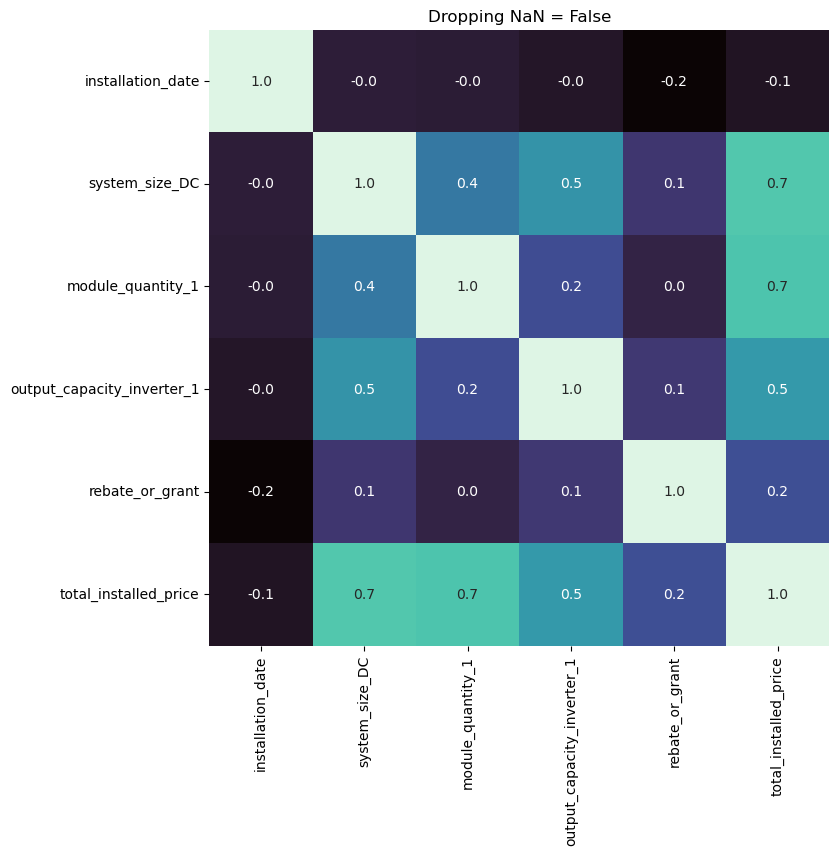

In [21]:
price_corr = valid_df[numeric_columns].corr().abs()["total_installed_price"]
to_prune = price_corr[price_corr < 0.2]
to_prune = to_prune.drop("installation_date")
numeric_columns = numeric_columns.drop(to_prune.keys())
valid_df = valid_df.drop(to_prune.keys(), axis=1)
df = valid_df
valids = plot_valids(visual=False)
uniques = valid_df.nunique(dropna=True)
valid_uniques, valid_df = print_corr()

#### We can temporarily drop all NaN values and check how price is decribed by different categories and how categories describe each over

In [22]:
from sklearn.feature_selection import chi2, f_regression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
wiped = valid_df.dropna()
wiped.head(2)
ss = StandardScaler().fit(wiped[numeric_columns[1:]])
wiped[numeric_columns[1:]] = ss.transform(wiped[numeric_columns[1:]])
encoders = {}
for col in categorical_columns:
    le = LabelEncoder().fit(wiped[col])
    encoders[col] = le
    wiped[col] = le.transform(wiped[col])
display(wiped.head(3))    

installation_date  state  customer_segment  \
system_ID_1                                                     
SCE-INT-NST-121948        2019-12-06      0                 3   
PGE-INT-118248213         2019-12-12      0                 3   
SDGE-INT-243396           2019-12-23      0                 3   

                    expansion_system  multiple_phase_system  \
system_ID_1                                                   
SCE-INT-NST-121948                 0                      0   
PGE-INT-118248213                  0                      0   
SDGE-INT-243396                    0                      0   

                    utility_service_territory  city  system_size_DC  \
system_ID_1                                                           
SCE-INT-NST-121948                          2  1121        0.026027   
PGE-INT-118248213                           0  1526       -0.094261   
SDGE-INT-243396                             1  1176       -0.135009   

                    additional_inverters  additional_modules  ...  \
system_ID_1                                                   ...   
SCE-INT-NST-121948                     0                   0  ...   
PGE-INT-118248213                      0                   0  ...   
SDGE-INT-243396                        0                   0  ...   

                    module_manufacturer_1  bifacial_module_1  \
system_ID_1                                                    
SCE-INT-NST-121948                    133                  0   
PGE-INT-118248213                     133                  0   
SDGE-INT-243396                       125                  0   

                    technology_module_1  BIPV_module_1  module_model_1  \
system_ID_1                                                              
SCE-INT-NST-121948                    2              0            2069   
PGE-INT-118248213                     2              0            2183   
SDGE-INT-243396                       2              0            1651   

                    third_party_owned  tracking  total_installed_price  \
system_ID_1                                                              
SCE-INT-NST-121948                  0         0              -0.020630   
PGE-INT-118248213                   0         0              -0.069218   
SDGE-INT-243396                     1         0              -0.076172   

                    solar_storage_hybrid_inverter_1  ground_mounted  
system_ID_1                                                          
SCE-INT-NST-121948                                0               0  
PGE-INT-118248213                                 0               0  
SDGE-INT-243396                                   0               0  

[3 rows x 30 columns]

In [23]:
f_scores, p_values = f_regression(wiped[categorical_columns].to_numpy(), wiped["total_installed_price"].to_numpy())
f_scores = pd.DataFrame({"F-score" : f_scores, "P-value": p_values}, index= categorical_columns)
display(f_scores.sort_values(by = "F-score", ascending=False).round(3))

F-score  P-value
customer_segment                 43040.702    0.000
ground_mounted                   10780.409    0.000
tracking                          5817.796    0.000
additional_inverters              2873.277    0.000
micro_inverter_1                  1225.847    0.000
multiple_phase_system              489.355    0.000
technology_module_1                303.097    0.000
DC_optimizer                       233.495    0.000
inverter_manufacturer_1            178.467    0.000
installer_name                     167.827    0.000
additional_modules                 142.966    0.000
third_party_owned                  142.425    0.000
technology_type                     91.945    0.000
self_installed                      71.098    0.000
built_in_meter_inverter_1           56.988    0.000
utility_service_territory           26.372    0.000
module_model_1                      19.753    0.000
module_manufacturer_1                7.710    0.005
expansion_system                     0.990    0.320
city                                 0.842    0.359
BIPV_module_1                        0.556    0.456
solar_storage_hybrid_inverter_1      0.250    0.617
bifacial_module_1                    0.018    0.894
state                                0.000    1.000

### We can now additionally prune our `valid_df` based on f-score values considering f-scores less than 10 and p-values more than 0.05 as not significant

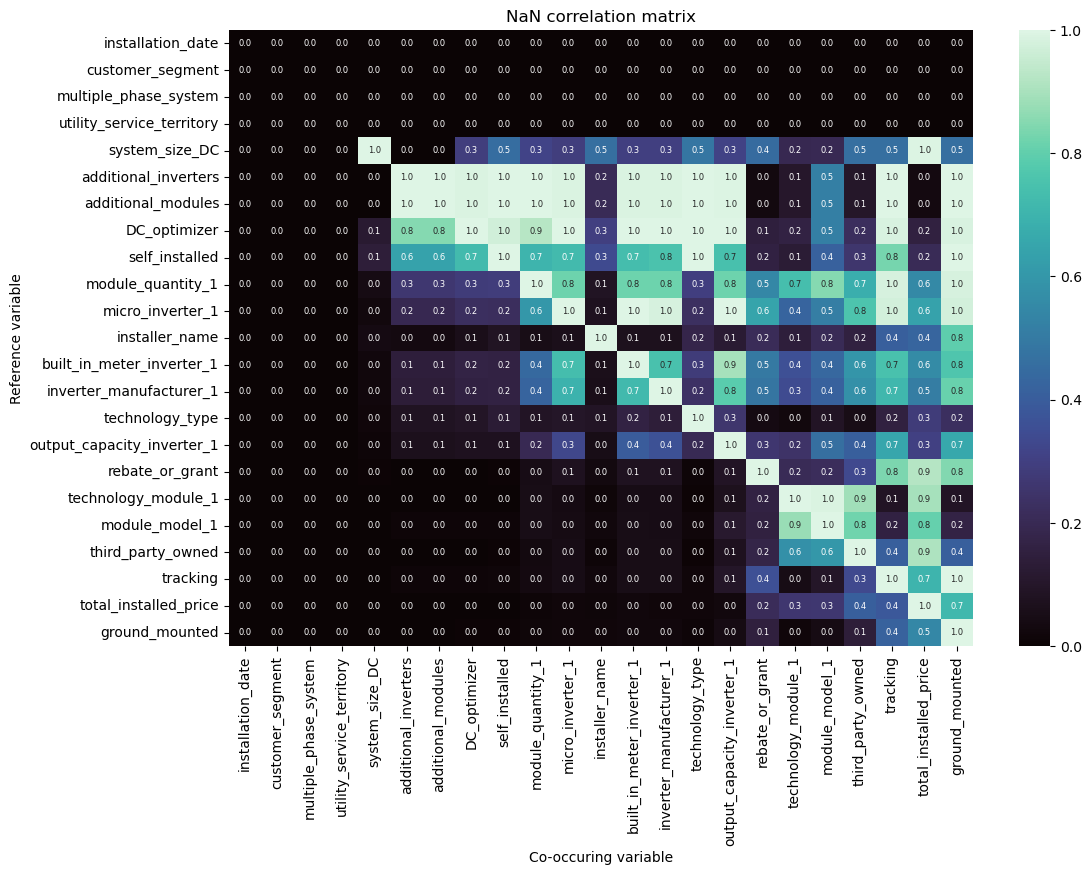

Dataframe length: 999895


In [24]:
to_prune = f_scores[(f_scores["F-score"] < 10) | (f_scores["P-value"] > 0.05)].index
categorical_columns = categorical_columns.drop(to_prune)
valid_df = valid_df.drop(to_prune, axis=1)
wiped = wiped.drop(to_prune, axis=1)
nan_corr_mat = plot_nan_corr()
print("Dataframe length:", len(valid_df))

### We can now calculate chi2 scores to check how catergories describe each over, maybe we can fill some categories based on values in another catergory
I have added masking to the chi2 heat map, based on NaN correlation matrix + there is a mask based on p-values. It is also row scaled by axis 1, since our arrays in axis 1 are features describing axis 0 feature, we want to scale the scores so it is nicely visualiazed and more usable.

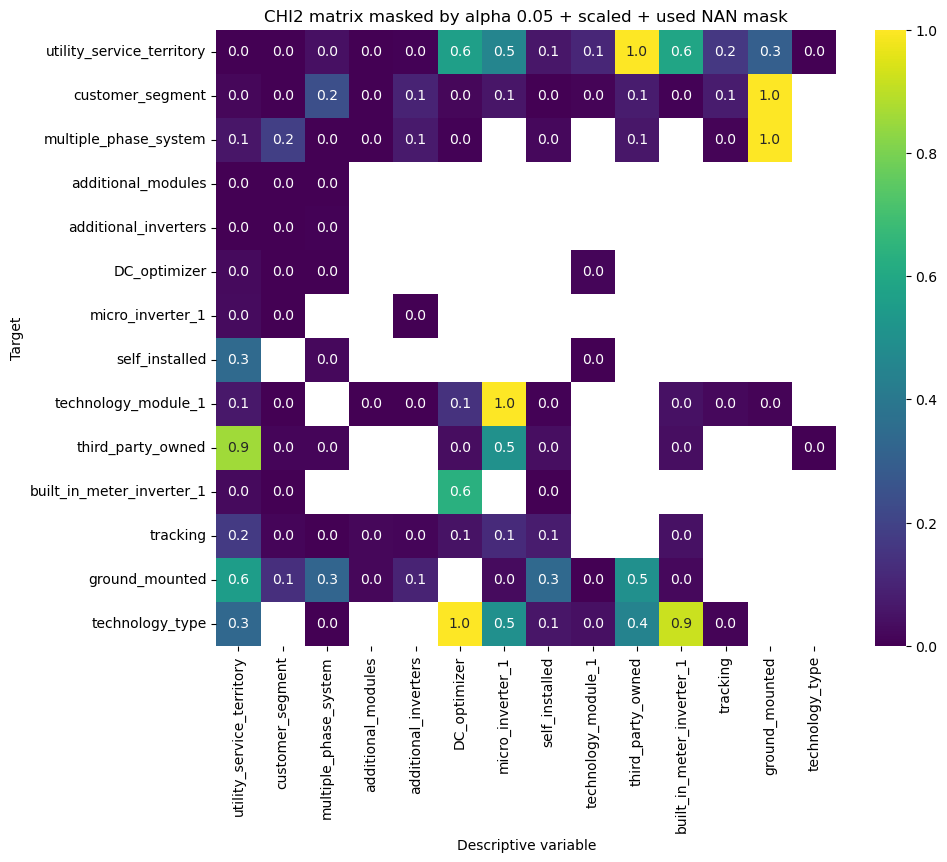

In [25]:
def chi_mat(df, cats, cats_to_exclude = [], additional_mask = []):
    catergories = None
    if len(cats_to_exclude) != 0:
        catergories = cats.drop(cats_to_exclude)
    else: 
        catergories = cats
    chi_matrix = []
    p_matrix = []
    i_counter = 0
    for y in catergories:
        x = catergories.drop(y)
        chi_values, p_values = chi2(df[x].to_numpy(), df[y].to_numpy())
        chi_values = np.insert(chi_values, i_counter, 0)
        p_values = np.insert(p_values, i_counter, 0)
        chi_matrix.append(chi_values)
        p_matrix.append(p_values)
        i_counter += 1
    local_max = np.nanmax(chi_matrix, axis=1, keepdims=True)
    local_max = np.where(local_max == 0, 1, local_max)
    chi_matrix = chi_matrix / local_max
    chi_matrix = pd.DataFrame(chi_matrix, index = catergories, columns=catergories)
    p_matrix = pd.DataFrame(p_matrix, index = catergories, columns=catergories)
    plt.figure(figsize=(10, 8))
    if len(additional_mask):
        chi_matrix = chi_matrix[(p_matrix < 0.05) & additional_mask]
        sns.heatmap(chi_matrix, annot=True, fmt=".1f", mask= ~((p_matrix < 0.05) & additional_mask), cmap="viridis")
        plt.title("CHI2 matrix masked by alpha 0.05 + scaled + used NAN mask")
        plt.ylabel("Target")
        plt.xlabel("Descriptive variable")
    else:
        chi_matrix = chi_matrix[p_matrix < 0.05]
        sns.heatmap(chi_matrix, annot=True, fmt=".1f", mask= ~(p_matrix < 0.05), cmap="viridis")
        plt.title("CHI2 matrix masked by alpha 0.05 + scaled")
        plt.ylabel("Target")
        plt.xlabel("Descriptive variable")
    plt.show()
    return chi_matrix
cats_to_exclude=categorical_columns[wiped[categorical_columns].nunique() > 100] #here is is possible to adjust matrix and exclude very dense features for proper chi2 scores
mask = nan_corr_mat.loc[categorical_columns.drop(cats_to_exclude), categorical_columns.drop(cats_to_exclude)] < 0.2 #here we compute additional mask based on how much of NaNs correlate, less correlating NaNs - better
chi_matrix = chi_mat(wiped, categorical_columns, cats_to_exclude=cats_to_exclude, additional_mask=mask) 

In [26]:
df = valid_df
valids = plot_valids(visual=False)

installation_date: 100.0000%
customer_segment: 100.0000%
multiple_phase_system: 100.0000%
utility_service_territory: 100.0000%
system_size_DC: 99.9557%
additional_inverters: 99.9076%
additional_modules: 99.9076%
DC_optimizer: 99.8922%
self_installed: 99.8555%
module_quantity_1: 99.6498%
micro_inverter_1: 99.5233%
installer_name: 99.4281%
built_in_meter_inverter_1: 99.3496%
inverter_manufacturer_1: 99.3259%
technology_type: 98.8478%
output_capacity_inverter_1: 98.5336%
rebate_or_grant: 95.7646%
technology_module_1: 94.6879%
module_model_1: 94.0044%
third_party_owned: 91.7861%
tracking: 90.0095%
total_installed_price: 81.7781%
ground_mounted: 75.9460%


### Based on information above we can proceed to pruning and filling NaN values in fused dataset, i will additionally save wiped dataset for separate modelling and evaluation.

In [27]:
valid_df.dropna().to_csv("wiped_nan.csv")

#### Generally we can try to fill NaNs in categories based on another categories. We can use most frequent values in sub catergory of dependent category to fill NaNs in it, also we can introduce new category label for NaN values which was not possible to fill out to create less bias during modelling. We will try to fill all values in variables containing less than 99% of valid data, those NaN rows in columns containing more than 99% of valids can be dropped later.

In [28]:
to_fill = valids[valids < 99]
print("Variables to fill: ")
display(to_fill)
cats_to_fill = [cat for cat in to_fill.keys() if cat in chi_matrix.columns]
#display(chi_matrix.loc[cats_to_fill,:])
def fill_na(chi_matrix, df, max_features_to_consider = 3):
    df_to_fill = df.copy()
    for row in chi_matrix.loc[cats_to_fill,:].index:
        chi_scores = chi_matrix.loc[row, :].dropna().sort_values(ascending=False)[:max_features_to_consider]
        descriptive_features = [key for key in chi_scores.keys()]
        descriptive_features = descriptive_features[::-1] #flipping to start splitting from the least important and move towards the most important split
        target = chi_scores.name
        print("Features:", descriptive_features, "Target:", target)
        recursive_split_fill(df_to_fill, df_to_fill, descriptive_features, target)
        print("success")
    return df_to_fill

def recursive_split_fill(main_df, current_df, features, target, level=0):
    if level >= len(features):
        top_freq = current_df[target].mode()
        if len(top_freq):
            main_df.loc[current_df.index, target] = main_df.loc[current_df.index, target].fillna(top_freq[0])
    else:
        feature = features[level]
        unique_values = current_df[feature].unique().dropna()
        for value in unique_values:
            subframe = current_df.loc[current_df[feature] == value, features + [target]]
            recursive_split_fill(main_df, subframe, features, target, level + 1)
filled_df = fill_na(chi_matrix, valid_df)

Variables to fill: 


technology_type               98.847779
output_capacity_inverter_1    98.533646
rebate_or_grant               95.764555
technology_module_1           94.687942
module_model_1                94.004370
third_party_owned             91.786138
tracking                      90.009451
total_installed_price         81.778087
ground_mounted                75.945974
dtype: float64

Features: ['micro_inverter_1', 'built_in_meter_inverter_1', 'DC_optimizer'] Target: technology_type
success
Features: ['utility_service_territory', 'DC_optimizer', 'micro_inverter_1'] Target: technology_module_1
success
Features: ['self_installed', 'micro_inverter_1', 'utility_service_territory'] Target: third_party_owned
success
Features: ['self_installed', 'micro_inverter_1', 'utility_service_territory'] Target: tracking
success
Features: ['self_installed', 'third_party_owned', 'utility_service_territory'] Target: ground_mounted
success


### Now we can try to fill price using same principle + adding ewm or rolling window inside

Also we can consider installation date, system_size_DC, and module_quantity_1 as sorting features, since they have quite high correlation with price (except installation date)

In [29]:
top_scores = f_scores["F-score"].sort_values(ascending=False)[(f_scores["F-score"] > 10) & (f_scores["P-value"] < 0.05)].index.to_list()
# i found out that method below is much more efficient rather than using recursion when my computer crashed
def fill_na_f(df, target, features, max_categories_to_consider = 5, window=5, ewm=True, sorting_features = []):
    df = df.copy()
    features = features[:max_categories_to_consider][::-1] #flipping to start splitting from the least important and move towards the most important split
    df = df.sort_values(sorting_features)
    def fill_f_group(current_group):
        if current_group[target].isna().all():
            return current_group[target]
        if ewm:
            return current_group[target].fillna(current_group[target].ewm(span=window, min_periods = 0).mean())
        else:
            return current_group[target].fillna(current_group[target].rolling(window=window, min_periods=0).mean())
    df[target] = df.groupby(features, group_keys=False).apply(fill_f_group)
    return df
# setting installation date to the last since it has lower impact on price rather than system_size_DC or module quantity
filled_df = fill_na_f(filled_df, "total_installed_price", top_scores, max_categories_to_consider = 5, window = 15, ewm=True, sorting_features = ["system_size_DC", "module_quantity_1", "installation_date"]) 

### Based on the same principle we can try to fill some of rebate_or_grant variable keeping an eye on the features which show some correlation with it

In [30]:
f_scores, p_values = f_regression(wiped[categorical_columns].to_numpy(), wiped["rebate_or_grant"].to_numpy())
f_scores = pd.DataFrame({"F-score" : f_scores, "P-value": p_values}, index= categorical_columns)
top_scores = f_scores["F-score"].sort_values(ascending=False)[(f_scores["F-score"] > 10) & (f_scores["P-value"] < 0.05)].index.to_list()
filled_df = fill_na_f(filled_df, "rebate_or_grant", top_scores, max_categories_to_consider = 5, window = 15, ewm=True, sorting_features = ["total_installed_price", "system_size_DC", "installation_date"]) 

### And finally output_capacity_inverter_1 variable keeping an eye on the features which show some correlation with it

In [31]:
f_scores, p_values = f_regression(wiped[categorical_columns].to_numpy(), wiped["output_capacity_inverter_1"].to_numpy())
f_scores = pd.DataFrame({"F-score" : f_scores, "P-value": p_values}, index= categorical_columns)
top_scores = f_scores["F-score"].sort_values(ascending=False)[(f_scores["F-score"] > 10) & (f_scores["P-value"] < 0.05)].index.to_list()
filled_df = fill_na_f(filled_df, "output_capacity_inverter_1", top_scores, max_categories_to_consider = 5, window = 15, ewm=True, sorting_features = ["total_installed_price", "system_size_DC", "module_quantity_1"]) 

### Now we can drop based on columns, which contain more than 98% of valid data

In [32]:
df = filled_df
valids = plot_valids(visual=False)
df.dropna(subset=valids[valids > 98].keys(), inplace=True)
print()
print("After dropping:")
print()
valids = plot_valids(visual=False)
print()
print("Size of dataframe:", len(df))

installation_date: 100.0000%
multiple_phase_system: 100.0000%
utility_service_territory: 100.0000%
customer_segment: 100.0000%
system_size_DC: 99.9557%
additional_inverters: 99.9076%
additional_modules: 99.9076%
DC_optimizer: 99.8922%
self_installed: 99.8555%
technology_type: 99.8142%
technology_module_1: 99.7968%
module_quantity_1: 99.6498%
third_party_owned: 99.6239%
micro_inverter_1: 99.5233%
tracking: 99.5196%
ground_mounted: 99.5165%
total_installed_price: 99.4762%
installer_name: 99.4281%
built_in_meter_inverter_1: 99.3496%
inverter_manufacturer_1: 99.3259%
rebate_or_grant: 99.3110%
output_capacity_inverter_1: 99.1459%
module_model_1: 94.0044%

After dropping:

installation_date: 100.0000%
customer_segment: 100.0000%
total_installed_price: 100.0000%
tracking: 100.0000%
third_party_owned: 100.0000%
technology_module_1: 100.0000%
rebate_or_grant: 100.0000%
output_capacity_inverter_1: 100.0000%
technology_type: 100.0000%
inverter_manufacturer_1: 100.0000%
built_in_meter_inverter_1: 

### Finally the rest of module_model_1 can be filled with `<unknown>`

In [33]:
df["module_model_1"] = df["module_model_1"].cat.add_categories("<unknown>")
df["module_model_1"] = df["module_model_1"].fillna("<unknown>")
df = df.sort_values("installation_date").reset_index()
display(df.head(5))
df.to_csv("filled.csv", index = False)

system_ID_1 installation_date customer_segment multiple_phase_system  \
0  PGE-INT-113274013        1998-01-30              RES                     0   
1  PGE-INT-113274187        1998-04-10              RES                     0   
2  PGE-INT-113274066        1998-05-19              RES                     0   
3  PGE-INT-113274319        1998-07-09              RES                     0   
4  PGE-INT-113274195        1998-08-14              RES                     0   

  utility_service_territory  system_size_DC additional_inverters  \
0  Pacific Gas and Electric          4.2515                  0.0   
1  Pacific Gas and Electric          2.3316                  0.0   
2  Pacific Gas and Electric         14.7600                  0.0   
3  Pacific Gas and Electric          2.2824                  0.0   
4  Pacific Gas and Electric          0.9300                  0.0   

  additional_modules DC_optimizer self_installed  ...  \
0                0.0          0.0            0.0  ...   
1                0.0          0.0            1.0  ...   
2                0.0          0.0            0.0  ...   
3                0.0          0.0            1.0  ...   
4                0.0          0.0            0.0  ...   

   inverter_manufacturer_1 technology_type output_capacity_inverter_1  \
0       Schneider Electric         pv-only                      3.297   
1              Fronius USA         pv-only                      4.000   
2       Schneider Electric         pv-only                      4.264   
3       Schneider Electric         pv-only                      3.211   
4       Schneider Electric         pv-only                      3.211   

  rebate_or_grant technology_module_1 module_model_1  third_party_owned  \
0     4626.000000          Multi-c-Si      <unknown>                0.0   
1     5829.000000                Mono       ND-200U1                0.0   
2      252.847477          Multi-c-Si     KD205GX-LP                0.0   
3     5706.000000          Multi-c-Si      <unknown>                0.0   
4     2325.000000          Multi-c-Si      <unknown>                0.0   

   tracking total_installed_price ground_mounted  
0       0.0          20555.540000            0.0  
1       0.0          30941.000000            0.0  
2       0.0          56092.472333            0.0  
3       0.0          24500.000000            0.0  
4       0.0          13629.000000            0.0  

[5 rows x 24 columns]

## Reflection
I have fused NaN values in current dataset using the values from bigger dataset which was mentioned in documentation to the data. Imputation based on the steps above is not ideal, but good and logical, it was definitely possible to use ML imputation exactly the same way with less pain (since we are not in modelling phase yet i decided to impute everything "manually"). My matrix operations should be correct. It is also good to hide the columns which have high cardinality from the chi2 calculation, since that will explode the scores. The size of dataset was almost not affected Size of dataframe: 985028, variable module_model_1 which was not possible to predict was filled with "unknown". Basically it is possible to play with the parameters in functions i have implemented and achieve slightly different results, but the current set and order of filling seem to be the best and fills most of the NaN values, i have ran the filled dataset through the notebook and it seems to nicely keep all trends and relationships. In the modelling phase it is possible to adjust the steps above depending on the results. 

## Preliminary feature engineering
 Here i will additionally examine change of total_installed_price/module_quanity_1 and system_size_DC/module_quanity_1 per customer group and binary features over the time series, and if they are more informative (they should be) we can replace total_installed_price, system_size_DC and module quantity. Same can be done to output_capacity_inverter_1 since it is related to the module quantity, total price, and system size. We can also replace customer_segment by customer "Consumer" if x == "RES" else "Business", because all groups except RES are very very small, and basically can be considered as "Business" customer

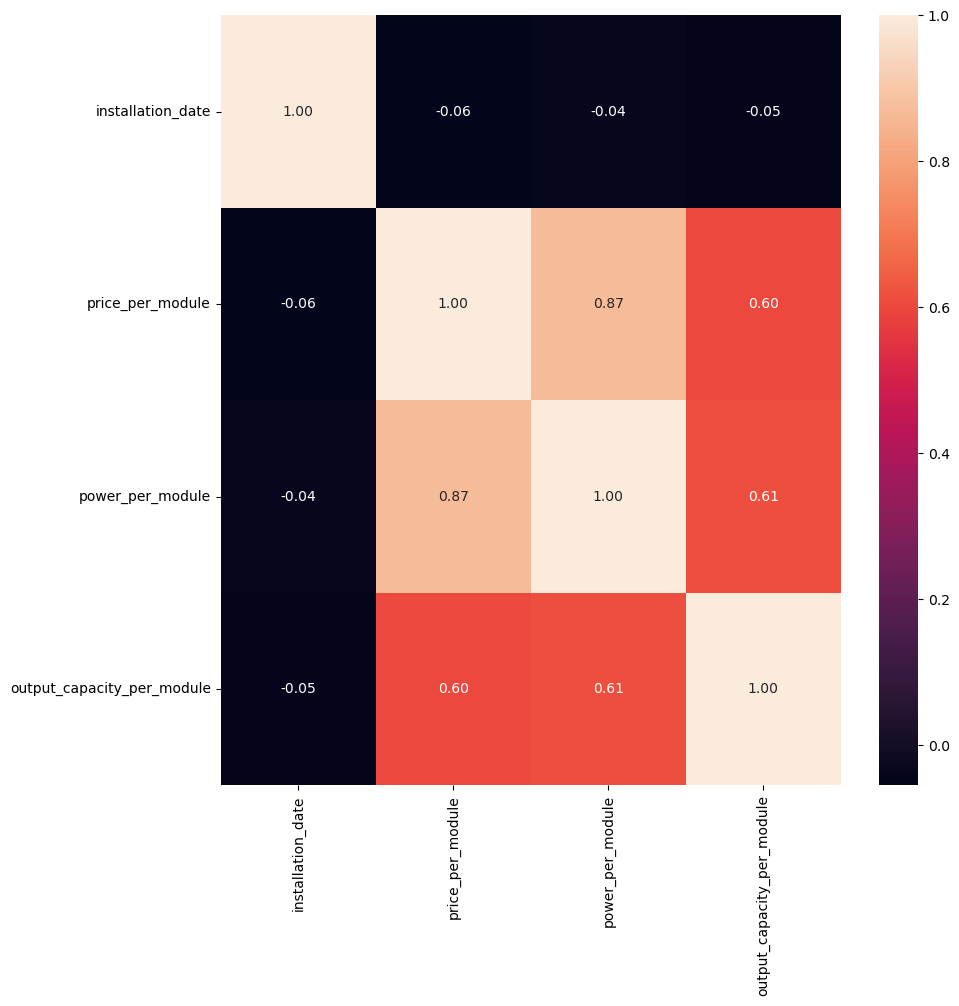

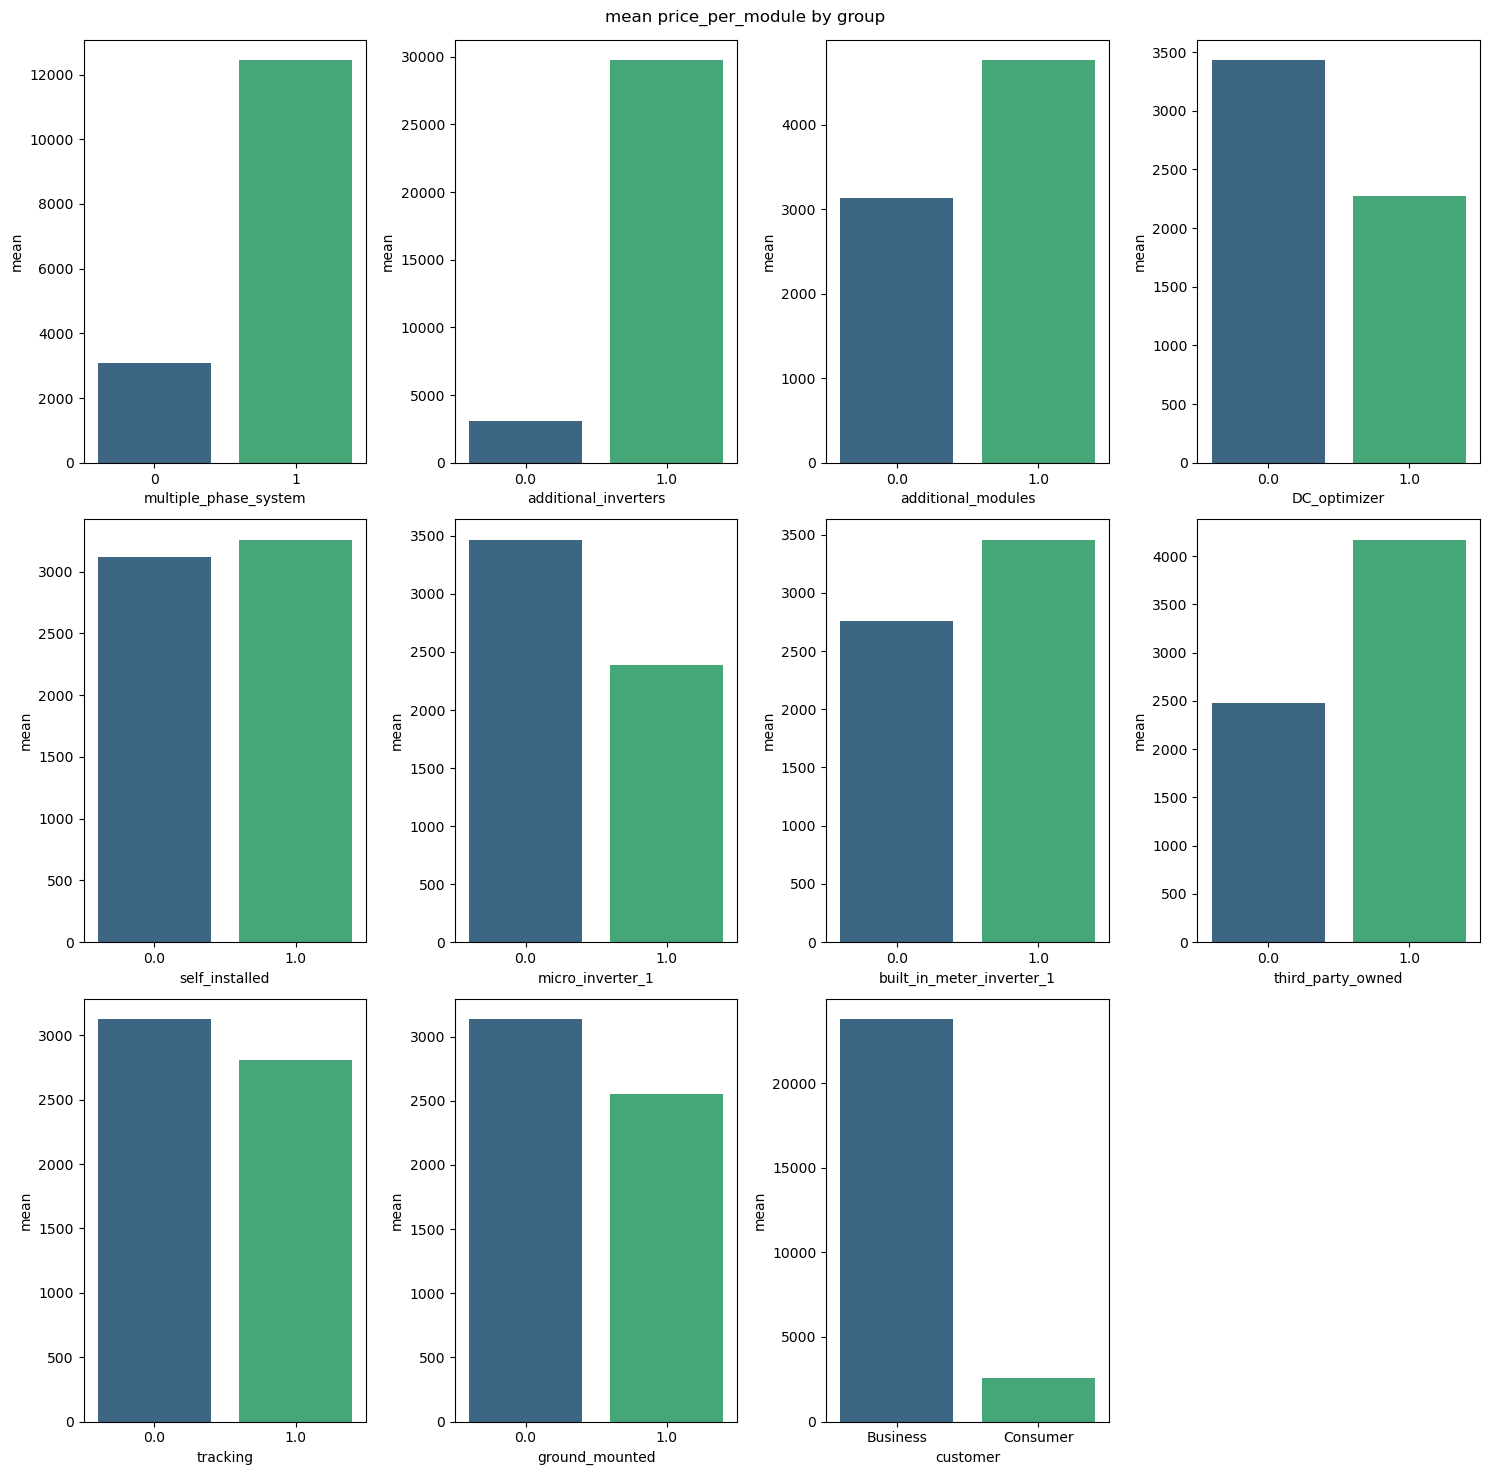

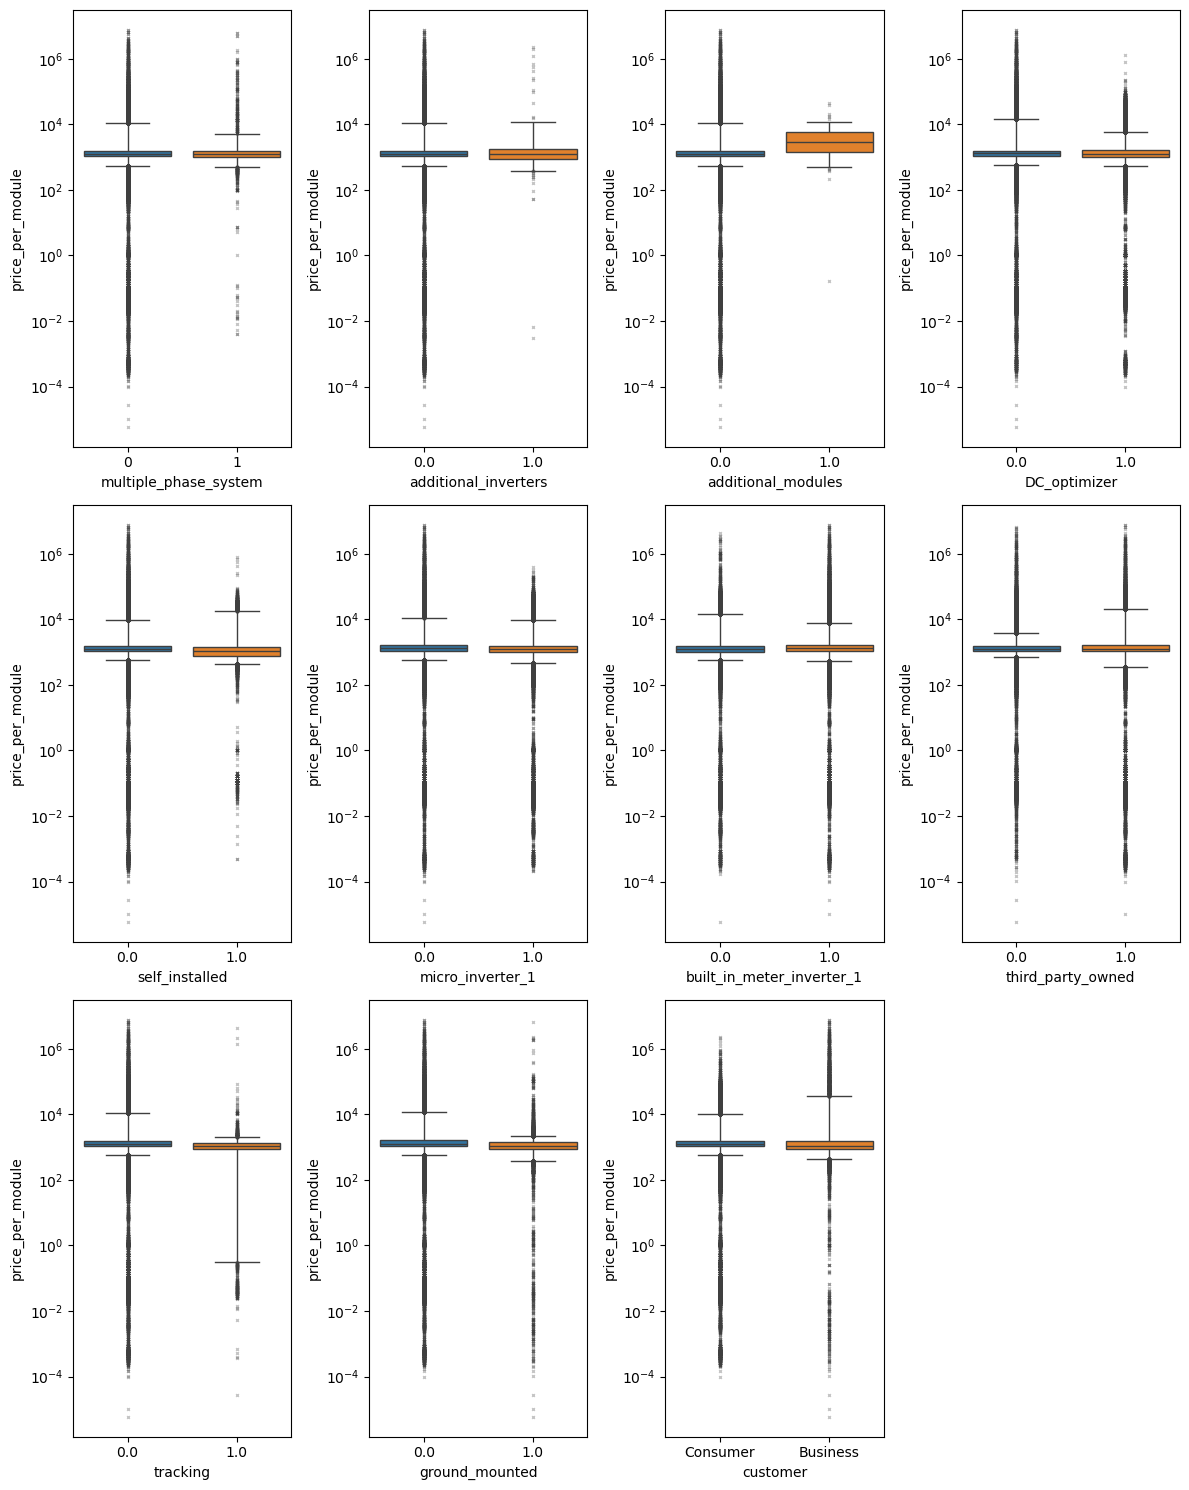

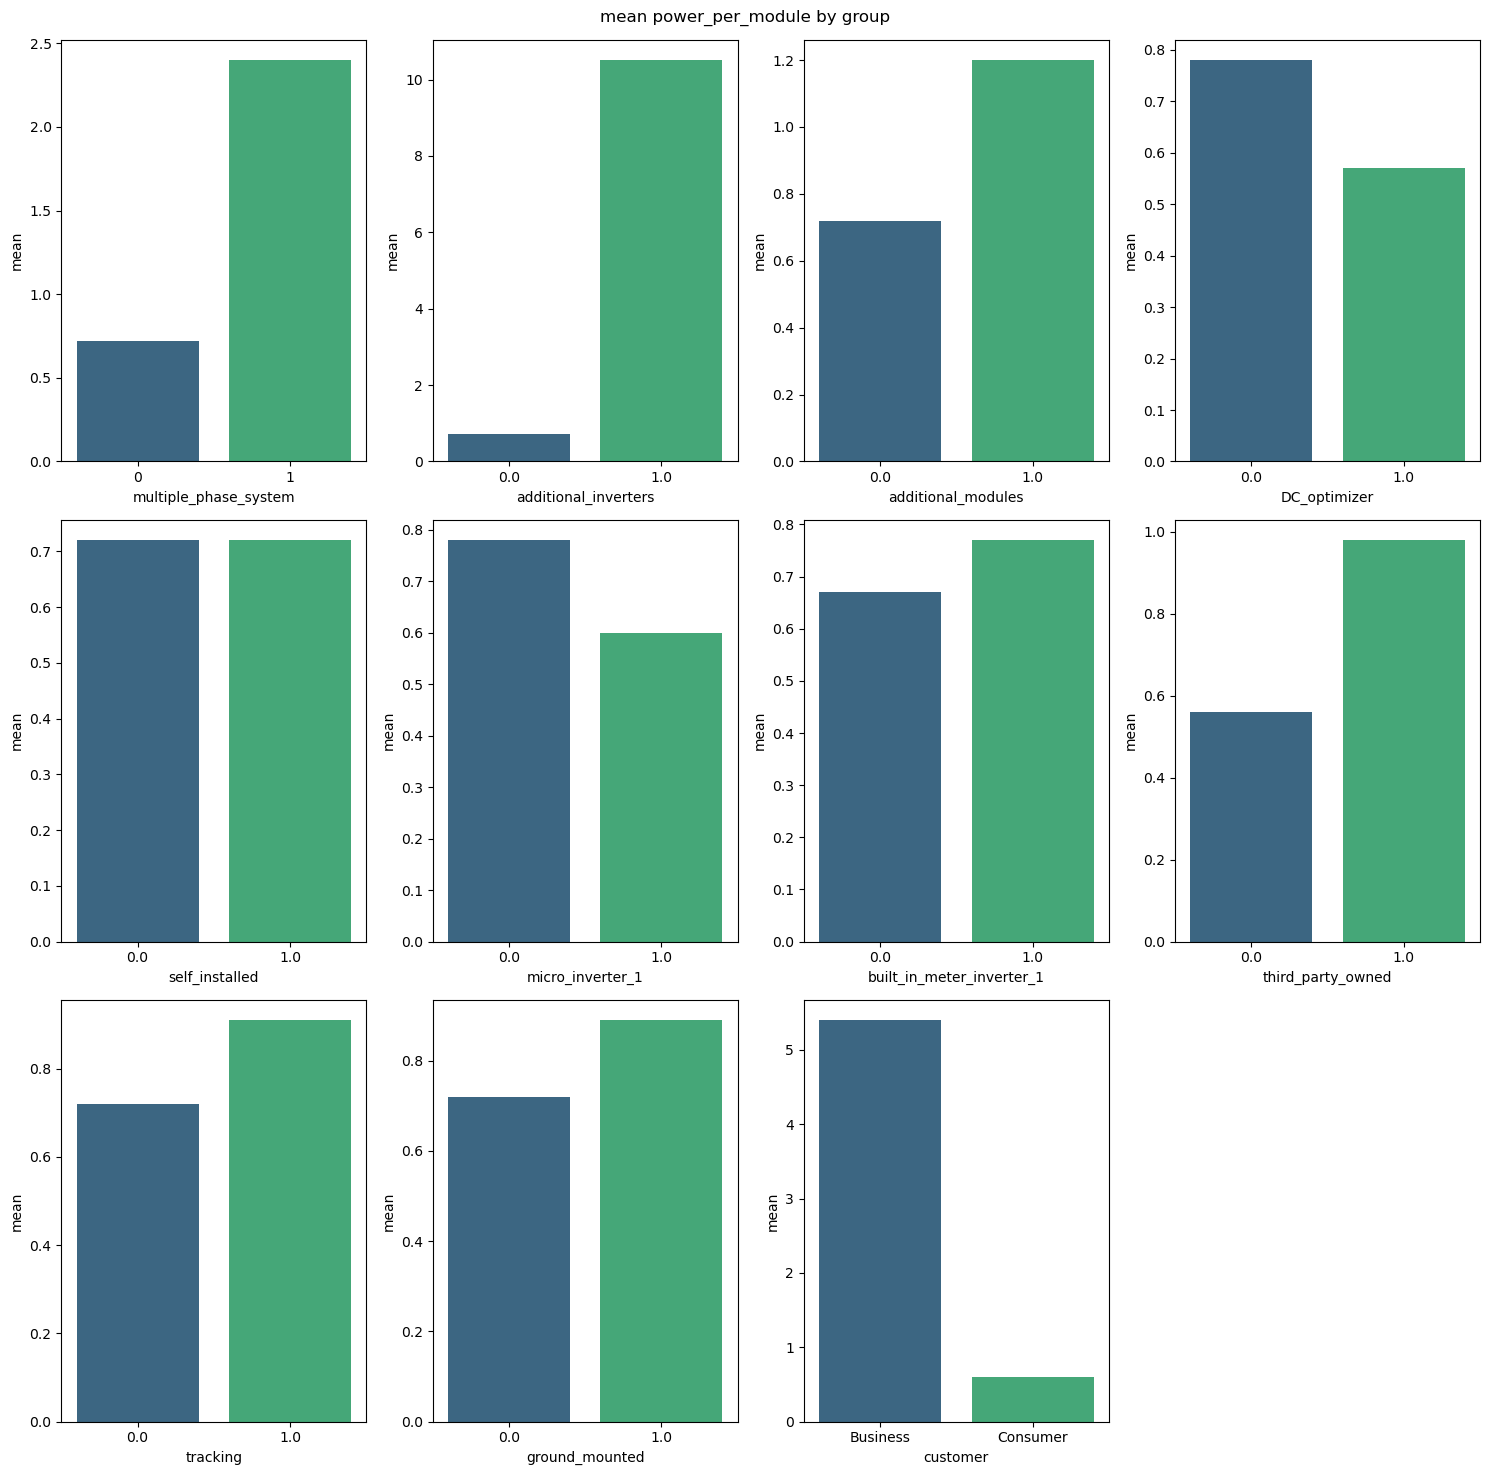

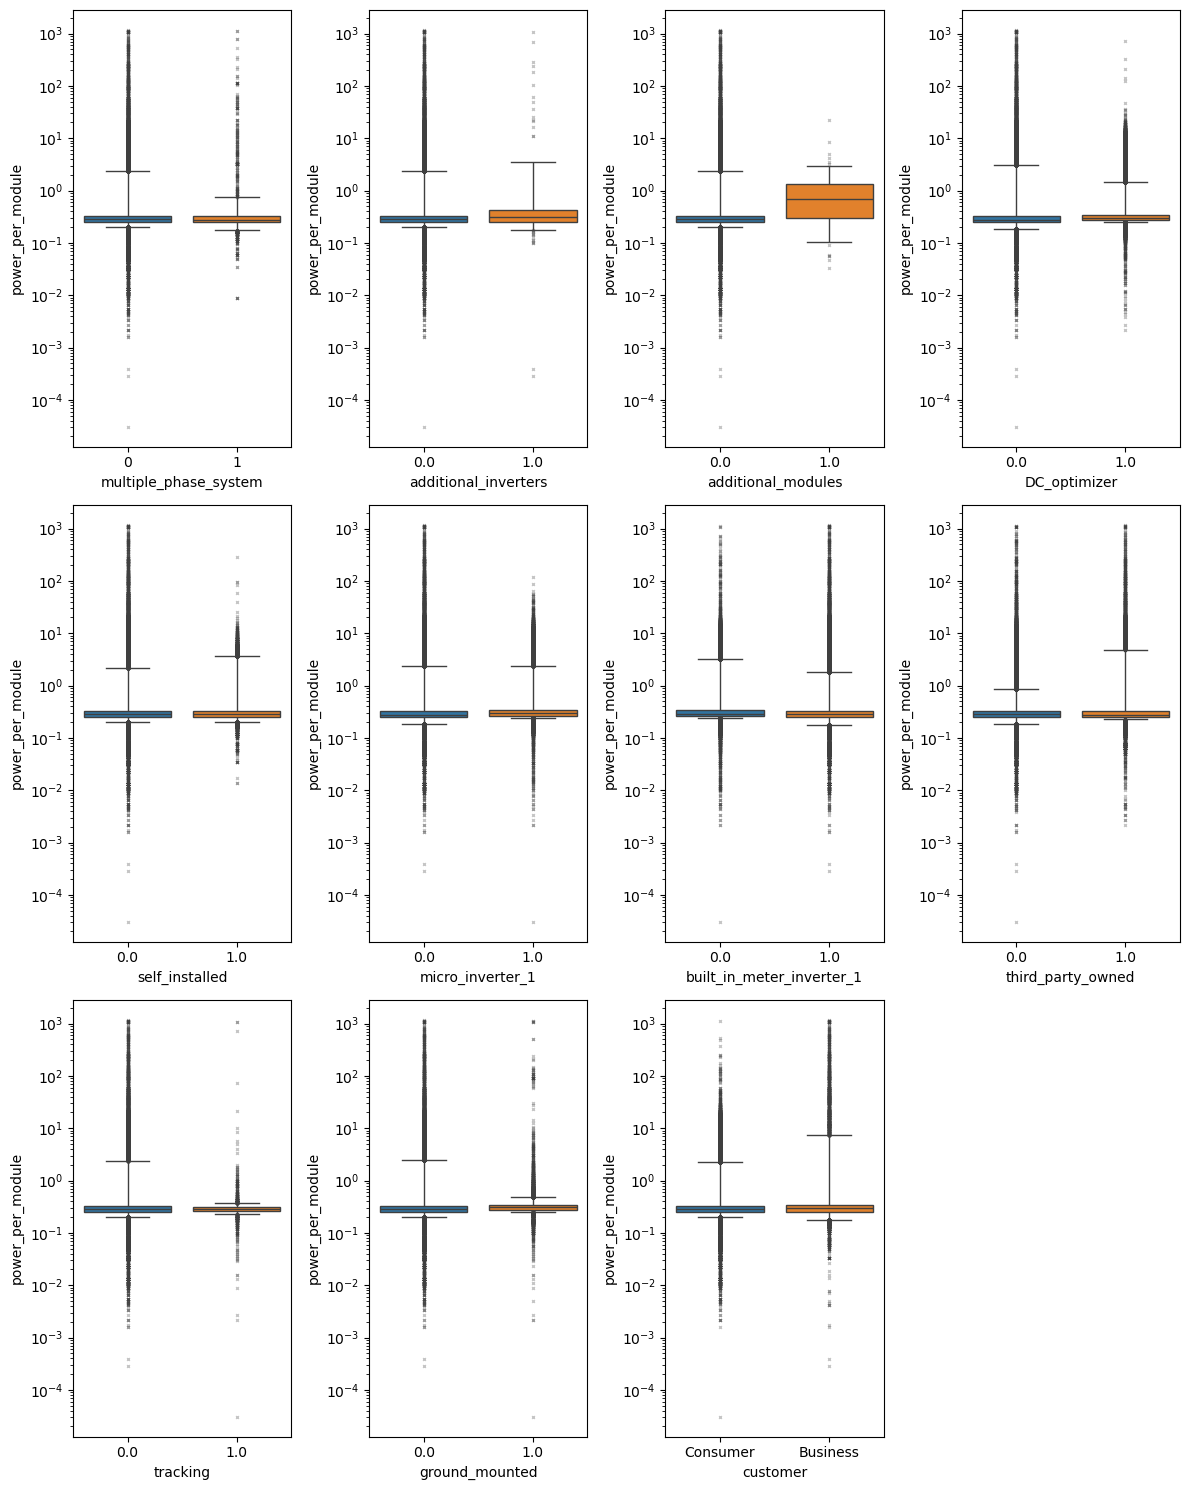

['Consumer' 'Business']


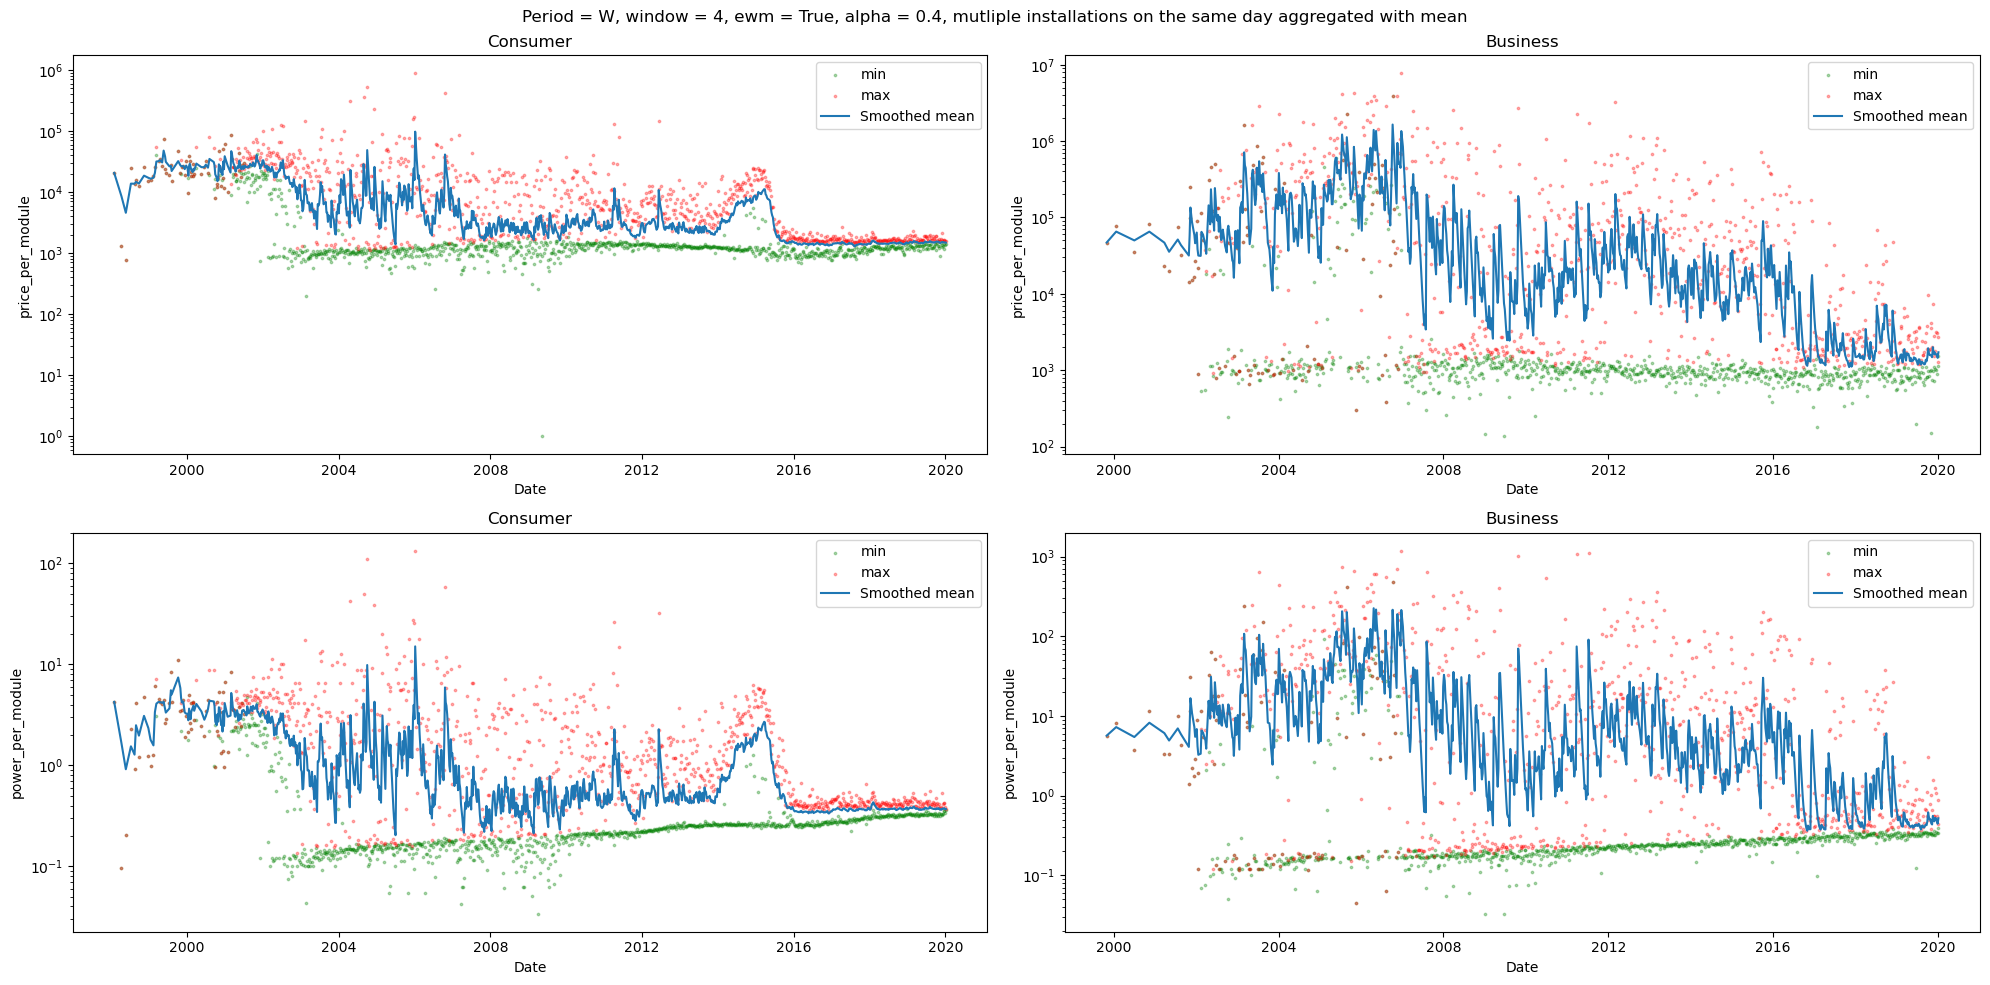

['Consumer' 'Business']


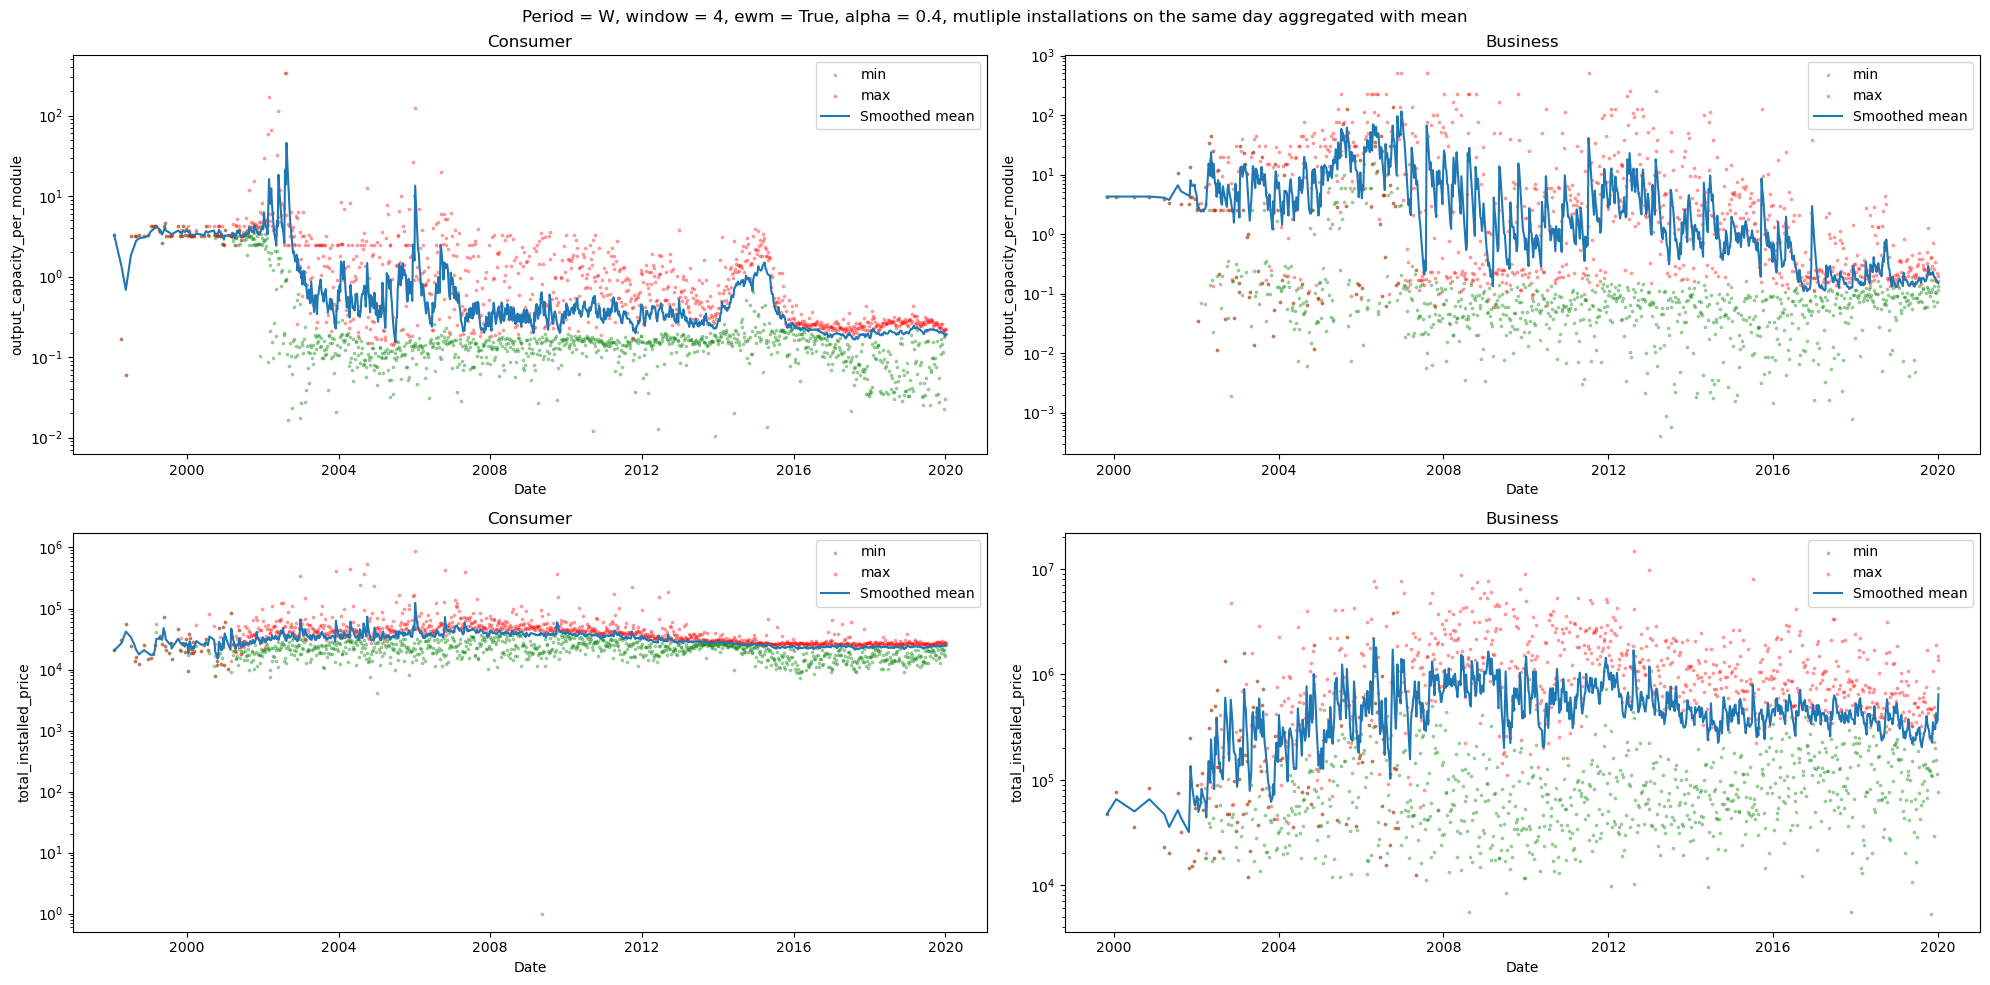

In [34]:
df["price_per_module"] = df["total_installed_price"] / df["module_quantity_1"]
df["power_per_module"] = df["system_size_DC"] / df["module_quantity_1"]
df["output_capacity_per_module"] = df["output_capacity_inverter_1"] / df["module_quantity_1"]
df["customer"] = df["customer_segment"].apply(lambda x: "Consumer" if x == "RES" else "Business")
valid_df = df
plt.figure(figsize=(10,10))
sns.heatmap(df[["installation_date", "price_per_module", "power_per_module", "output_capacity_per_module"]].corr(), annot=True, fmt=".2f")
plt.yticks(rotation = 0)
plt.show()
stats_by_group(additional_plots=["mean"], display_table=False, target_col="price_per_module")
stats_by_group(additional_plots=["mean"], display_table=False, target_col="power_per_module")
view_series_by_group(ewm=True, colums_of_interest=["price_per_module", "power_per_module"])
view_series_by_group(ewm=True, colums_of_interest=["output_capacity_per_module", "total_installed_price"])

####  &#8593; There is one point with price 1 which ruins log scale

In [35]:
df.drop(["output_capacity_inverter_1", "system_size_DC", "total_installed_price", "customer_segment", "module_quantity_1"], axis = 1, inplace = True)
display(df.head(2))
display(df.info())
df.to_csv("updated_features.csv", index = False)

system_ID_1 installation_date multiple_phase_system  \
0  PGE-INT-113274013        1998-01-30                     0   
1  PGE-INT-113274187        1998-04-10                     0   

  utility_service_territory additional_inverters additional_modules  \
0  Pacific Gas and Electric                  0.0                0.0   
1  Pacific Gas and Electric                  0.0                0.0   

  DC_optimizer self_installed micro_inverter_1        installer_name  ...  \
0          0.0            0.0              0.0  Sierra Solar Systems  ...   
1          0.0            1.0              0.0                  Self  ...   

  rebate_or_grant technology_module_1 module_model_1  third_party_owned  \
0          4626.0          Multi-c-Si      <unknown>                0.0   
1          5829.0                Mono       ND-200U1                0.0   

  tracking ground_mounted price_per_module power_per_module  \
0      0.0            0.0     20555.540000          4.25150   
1      0.0            0.0      1289.208333          0.09715   

  output_capacity_per_module  customer  
0                   3.297000  Consumer  
1                   0.166667  Consumer  

[2 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985028 entries, 0 to 985027
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   system_ID_1                 985028 non-null  object        
 1   installation_date           985028 non-null  datetime64[ns]
 2   multiple_phase_system       985028 non-null  category      
 3   utility_service_territory   985028 non-null  category      
 4   additional_inverters        985028 non-null  category      
 5   additional_modules          985028 non-null  category      
 6   DC_optimizer                985028 non-null  category      
 7   self_installed              985028 non-null  category      
 8   micro_inverter_1            985028 non-null  category      
 9   installer_name              985028 non-null  category      
 10  built_in_meter_inverter_1   985028 non-null  category      
 11  inverter_manufacturer_1     985028 non-

None